# **Loan Default Prediction**

## **Problem Definition**

A significant portion of bank profits comes from home loans issued to regular income and high-earning customers. However, when these loans turn into defaults, they cause substantial financial losses for banks. Traditional loan approval process, rely heavily on manual assesments, which are prone to human error, bias and inconsistencies. This not only makes the process inefficient, but also risks excluding potentially reliable applicants or approving risky ones.

With growing adoption of data science, there is an opportunity to automate and enhance loan risk assesment by using machine learning models. These models can improve decision-making by identifying key predictors of loan default, reducing bias and helping banks to avoid costly misclassifications.

### **The Context**
**1. Why is this problem important to solve?**

Predicting loan defaults is critical for banks. High-risk applicants can lead to significant financial losses, while on the other hand, strict loan policies may exclude applicants who have good credit standing and would repay the loan. Solving this problem can:
*   Reduce financial losses
*   Improve economic stability
*   Promote loan policies that would identify low-risk applicants
*   Enhance profitability and decision making
*   Minimize the impact of human error and subjective judgment in manual loan approval process
*   Streamline the loan evaluation process using data-driven methods, reducing time and operational costs
*   Mitigate biasies in loan approval decisions while ensuring that automated systems do not replicate historical biasis
*   Ensure better utilization of machine learning to create fair, consistent and scalable loan assessment approach

### **The Objective**
**2. What is the intended goal?**

Intended goal is to build data-driven loan default prediction model that will enable banks to:
*   Reduce loan risks
*   Make informed loan decisions
*   Ensure loan policies that promote equality among applicants
*   Identify clients who are likely to default before loan approval to minimize financial loses
*   Reduce the likelihood of misclassifying high-risk applicants as low-risk applicants, which can lead to significant financial losses



### **The Key Questions**
**3. What are the key questions that need to be answered?**

*   What are the main factors contributing to loan defaults?
*   How can we identify high-risk applicants based on historical data?
*   Can machine learning model improve prediction **Precision & Recall** compared to traditional credit score methodology?
*   How can we balance reducing loan defaults while we are at same time ensuring that all applicants have equal access to loan?

### **The Problem Formulation**
**4. What is it that we are trying to solve using data science?**

We are trying to solve **binary classification problem** using machine learning
*   **Target Variable: BAD (1 = Default, 0 = Repaid)**
*   **Input Variables: LOAN, MORTDUE, VALUE, REASON, JOB,** etc.
*   The goal is to predict the probability of default for each applicant using loan data and profile of an applicant, which would enable data-driven risk categorization and loan decision making
*   **Precision|Recall** is an important metric for evaluating model performance, especially in cases of class imbalance. For a given class, different combination of **Precision|Recall** can indicate how well the model handles the class:
    *   **High Precision + High Recall:** The model identifies most instances of a class correctly and makes very few false predictions. The model has **ideal performance**
    *   **High Precision + Low Recall:** The model rarely identifies the class, but when it does, it is usually correct. The model is reliable, but misses many instances
    *   **Low Precision + High Recall:** The model identifies most of the class instances, but also includes many incorrect predictions
    *   **Low Precision + Low Recall:** The model performs poorly overall, failing to detect the class making many incorrect predictions

## **Data Description**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Importing Required Libraries**

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd
import math

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Displaying graphs within Notebook
%matplotlib inline

# Importing KNNImputer for missing values treatment
from sklearn.impute import KNNImputer

# Importing Linear Regression algorithm for missing values treatment
from sklearn.linear_model import LinearRegression

# Importing library for data standardization using z-score
# StandardScaler uses z-score for data normalization, which will result in each feature having mean = 0 and std = 1; this will ensure that features contribute equally to the model
from sklearn.preprocessing import StandardScaler

# Importing function to randomly split the dataset into train and test subsets
from sklearn.model_selection import train_test_split

# Importing function to evaluate model's performance during tree prunning
from sklearn.model_selection import cross_val_score

# Importing Ensemble Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Non-Linear Algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importing Linear Algorithms
from sklearn.linear_model import LogisticRegression

# Importing function for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing functions for model evaluation (classification metrics)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, precision_recall_curve

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

## **Understanding Data Structure**

In [3]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data
# Reading hmeq.csv from Google drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq.csv')

# Viewing first 5 rows of the dataset
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Viewing last 5 rows of the dataset
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


**Observations:**

*   The dataset has 13 columns
*   Data in each column corresponds to an attribute of a loan applicant
*   Variable **BAD** is target variable, representing loan default **1 = Default, 0 = Repaid**
*   **Numerical Variables:** LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC
*   **Categorical Variables:** REASON, JOB
*   Missing valueas are visible in the data, which indicates the need for data cleaning or imputation before modeling

### **Data Shape**

In [6]:
# Attribute shape contains number of rows and columns
# data.shape
rows = data.shape[0]
columns = data.shape[1]

# f-string is used to print number of rows and columns to the console
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5960
Number of columns: 13


**Observations:**

*   Given dataset has **5960 rows** and **13 columns**

### **Info & NULL Values**

In [7]:
# info() is used to print a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
# data.isnull().sum() returns sum of null/NaN values for each variable
data.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


In [9]:
# Checking percentage of missing values
((data.isnull().sum() / data.shape[0]).mul(100)).sort_values(ascending = False)

,0
DEBTINC,21.258389
DEROG,11.879195
DELINQ,9.731544
MORTDUE,8.691275
YOJ,8.640940
NINQ,8.557047
CLAGE,5.167785
JOB,4.681208
REASON,4.228188
CLNO,3.724832


**Observations:**

*   There are **2** variables of dtype **int64**, **9** variables of dtype **float64** and **2** variables of dtype **object**
*   Variables **BAD** and **LOAN** have **5960 non-null values**
*   Number of missing values per variable is
   *   **DEBTINC = 1267**, which represents **21.26%**
   *   **DEROG = 708**, which represents **11.88%**
   *   **DELINQ = 580**, which represents **9.73%**
   *   **MORTDUE = 518**, which represents **8.69%**
   *   **YOJ = 515**, which represents **8.64%**
   *   **NINQ = 510**, which represents **8.56%**
   *   **CLAGE = 308**, which represents **5.17%**
   *   **JOB = 279**, which represents **4.68%**
   *   **REASON = 252**, which represents **4.23%**
   *   **CLNO = 222**, which represents **3.72%**
   *   **VALUE = 112**, which represents **1.88%**
*   Variables **DEBTINC, DEROG** and **DELINQ** show significant number of missing values
*   Due to high percentage of missing values in variable **DEBTINC**, if we identify that this independent variable does not affect the prediction of the target variable, we can drop this variable after EDA

### **Duplicates**

In [10]:
# Checking for duplicate values in the data
data.duplicated().sum()

np.int64(0)

**Observations:**

*   There are no duplicates in the data

### **Statistical Summary of Data**

In [11]:
# data.describe(include = 'all') method is used to generate descriptive statistics of the entire dataset
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


**Observations:**

*   The target variable **BAD** has a **mean = 0.199**, meaning that **20%** of the applicants defaulted on their loans and **80%** did not, which indicates class imbalance
*   Some variables have **outliers** that need to be addressed. Those variables are: **CLAGE, VALUE, MORTDUE, DEBTINC**
*   Target variable **BAD** has class imbalance, which will require balancing technique, like e.g. **SMOTE**
*   There are missing values in the data and imputation is required before modeling
*   **LOAN:** Loan amounts range from **1100** to **89900** with **mean = 18608**, which indicates that most of the loans are relatively small to mid-range
*   **MORTDUE:** Mortgage due has wide ramge from **2063** to **399550** with **mean = 73761** and large standard deviation, which indicates significant variability in mortgage debt
*   **VALUE:** Property value ranges from **8000** to **855909** with **mean = 101776** and **median = 89236**, which indicates **right-skewed distribution**
*   **YOJ:** Years at current job ranges from **0** to **41** with **mean = 8.92** and **median = 7** years, which indicates that most applicants are relatively stable in their job
*   **DEROG/DELINQ:** Both variables are mostly **0** with small means **0.25** and **0.45**, which indicates that few applicants have major derogatory marks and deliquencies
*   **CLAGE:** Age of oldest credit line has a **max = 1168 months ~ 97 years**, which indicates outliers or data entry errors
*   **NINQ:** Recent credit inquiries has a **mean = 1.18** and **max = 17** and while most applicants have few inquiries, some applicants are actively asking for a credit
*   **CLNO:** Number of credit lines ranges from **0** to **71** with a **median = 20**, which indicates varying level of credit exposure
*   **DEBTINC:** Debt to income ratio has a **max = 203.31**, which is extremely high, indicating that some applicants are overleveraged
*   **REASON:** Variable REASON has only **2 unique categories: DebtCon** and **HomeImp**
*   **JOB:** Variable JOB has **6 unique categories** of which the most frequent category is **Other**

### **Defining Lists**

In [12]:
# Defining list of numerical variables
num_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Defining list of categorical variables
cat_vars = ['REASON', 'JOB']

### **Unique Values**

In [13]:
# Checking unique values
data.nunique()

,0
BAD,2
LOAN,540
MORTDUE,5053
VALUE,5381
REASON,2
JOB,6
YOJ,99
DEROG,11
DELINQ,14
CLAGE,5314


**Observations:**

*   There are no columns to be dropped, based on number of unique values

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

## **Exploratory Data Analysis (EDA) - Univariate Analysis**


### **Target Variable BAD**

Target variable **BAD** is **binary categorical variable**. For target variable **status** we will use

*   sns.countplot()

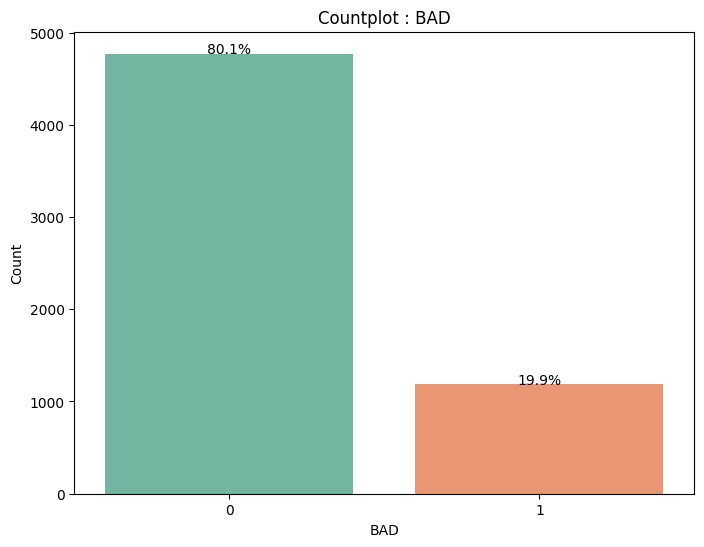

In [14]:
# Setting size of a plot
plt.figure(figsize = (8, 6))

# Setting title
plt.title('Countplot : BAD')

# Setting x-axis label
plt.xlabel('BAD')

# Setting y-axis label
plt.ylabel(f'Count')

# Plotting the countplot
plot = sns.countplot(data = data, x = data['BAD'], legend = False, palette = 'Set2')

# Adding percentage on top of each bar within countplot
for p in plot.patches:
  height = p.get_height()
  width = p.get_width()
  l = len(data['BAD'])
  percentage = f'{100 * height / l:.1f}%'
  x = p.get_x() + width / 2
  y = height
  plot.annotate(percentage, (x, y), ha = 'center')

plt.show()

In [15]:
# Checking % of unique values for variable BAD
print(f'Unique values for BAD')
print('-' * 40)
print(data['BAD'].value_counts(normalize = True).mul(100))
print('*' * 40)
print ('\n')

Unique values for BAD
----------------------------------------
BAD
0    80.050336
1    19.949664
Name: proportion, dtype: float64
****************************************




**Observations:**

*   **80.1%** of applicants repayed their loan successfully
*   **19.9%** of applicants defaulted
*   Class distribution is imbalanced, which may skew model performance, where model may favor predicting **class 0**
*   **Precision, Recall** and **F-1** will be more important metrics than **Accuracy**
*   Techniques for handling data imbalance:
   *   **Resampling:** Oversampling the minority class (e.g. SMOTE) or undersampling the majority class
   *   **Class weights:** Using weighted loss function to penalize misclassifying defaulters
   *   **Ensemble Algorithms:** Random Forest or/and XGBoost with imbalance handling

### **Numerical Variables**

For numerical variables we will use

*   sns.histplot()
*   sns.boxplot()

In [16]:
# histplot_custom is user-defined function used for visualization with sns.histplot()
def histplot_custom(data, column, color, kde, title_label, x_label, y_label):
  # Setting size of a plot
  plt.figure(figsize = (20, 7))

  # Setting title
  plt.title(f'Histplot : {title_label}')

  # Setting x-axis label
  plt.xlabel(f'{x_label}')

  # Setting y-axis label
  plt.ylabel(f'{y_label}')

  # Plotting the histplot
  sns.histplot(data = data, x = column, color = color, kde = kde)

  # Calculating mean and median
  mean = data[column].mean()
  median = data[column].median()

  # Adding mean and median to histogram
  plt.axvline(mean, color = 'blue', linestyle = '--', linewidth = 2, label = f'Mean: {mean:.2f}')
  plt.axvline(median, color = 'red', linestyle = '-', linewidth = 2, label = f'Median: {median:.2f}')

  # Showing legend
  plt.legend()

  plt.show()

In [17]:
# boxplot_custom is user-defined function used for visualization with sns.boxplot()
def boxplot_custom(data, column, title_label, x_label):
  # Setting size of a plot
  plt.figure(figsize = (20, 7))

  # Setting title
  plt.title(f'Boxplot : {title_label}')

  # Setting x-axis label
  plt.xlabel(f'{x_label}')

  # Plotting the boxplot
  sns.boxplot(data = data, x = column)

  plt.show()

#### **LOAN**

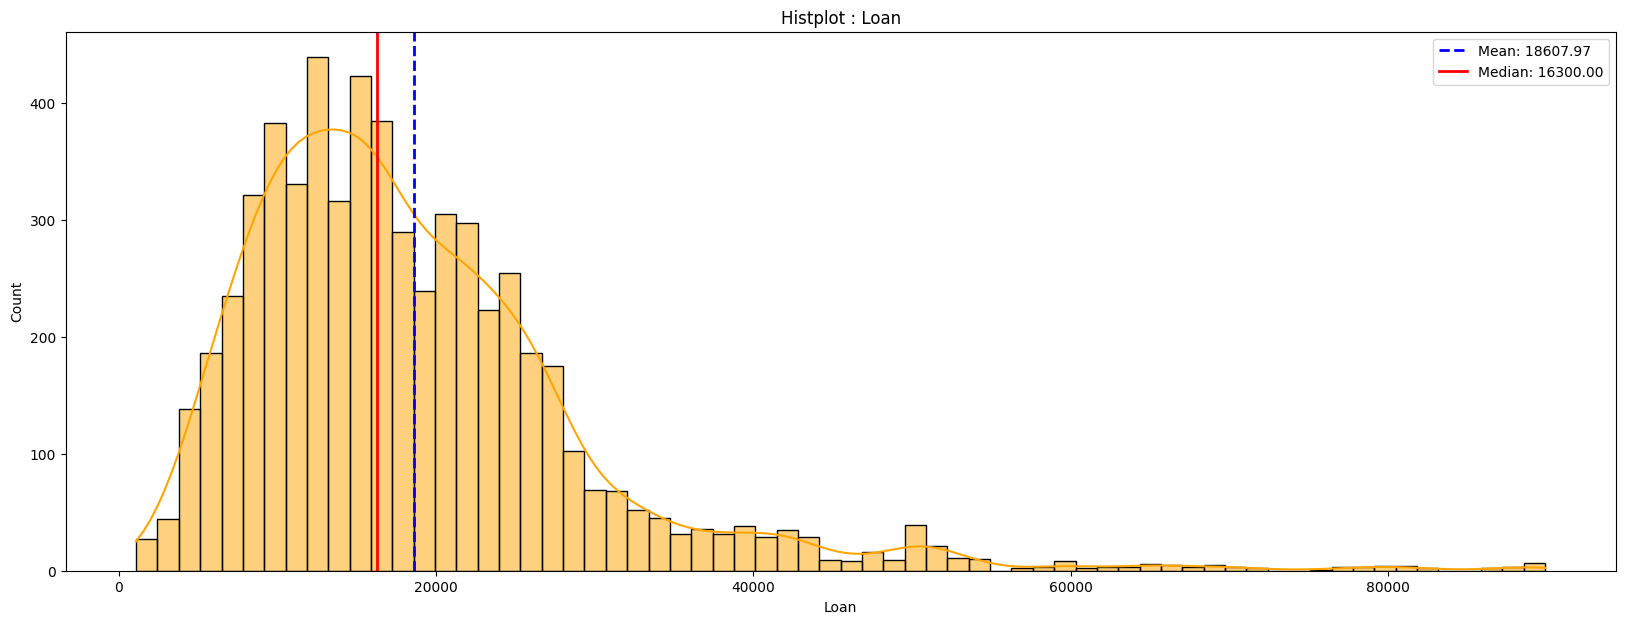

In [18]:
histplot_custom(data, 'LOAN', 'orange', True, 'Loan', 'Loan', 'Count')

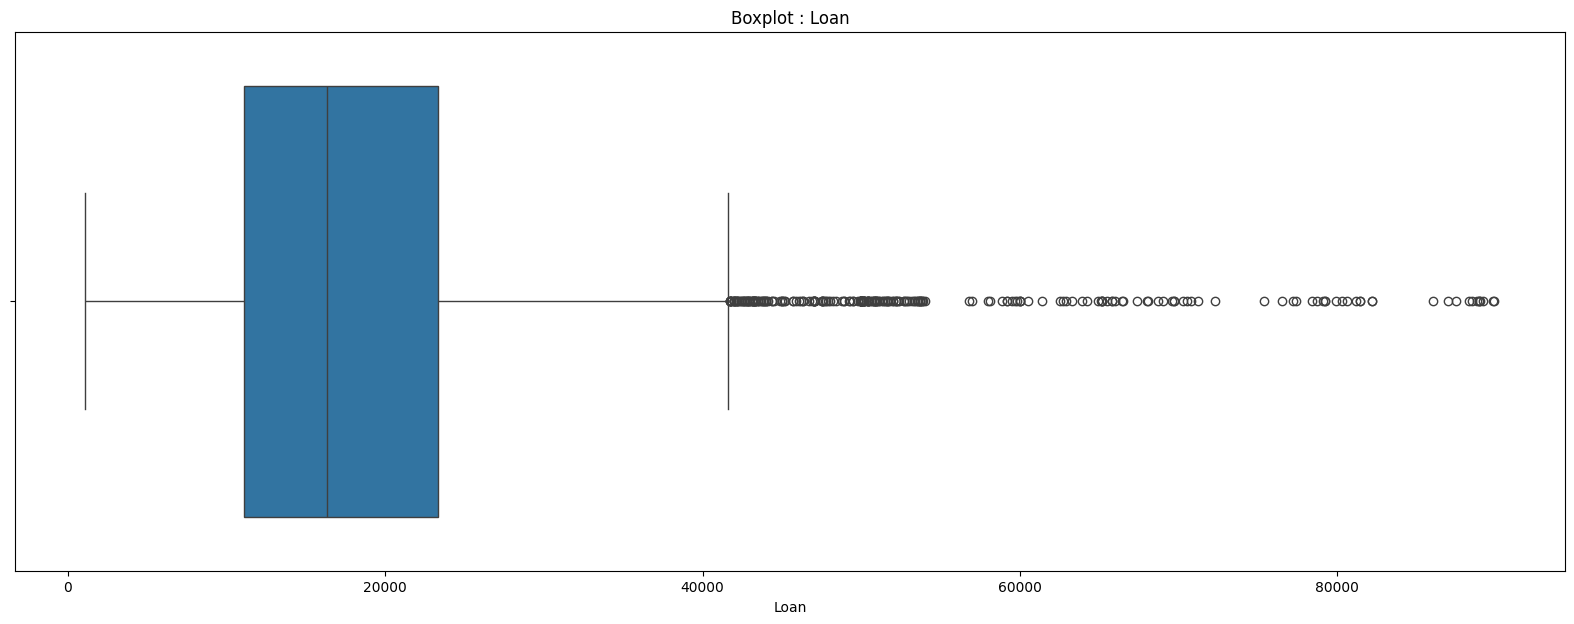

In [19]:
boxplot_custom(data, 'LOAN', 'Loan', 'Loan')

**Observations:**

*   **LOAN = Loan Amount**
*   Distribution is **right-skewed (positive skew)**, which indicates that most loan amounts are on the lower end, with few high-value loans on the right side, that streches the distribution
*   **KDE curve** has a peak at **15000-20000 value range**; this is the most common range among applicants
*   **mean = 18607** and **median = 16300**, which means that **mean > median**; this is typical for skewed distributions and indicates presence of outliers
*   Most of the loans are between **11000** and **23000**, which indicates that majority of applicants apply for small to medium-value loans
*   **min = 1100** and **max = 89900**; this shows a wide range of loan requests and possibly indicates different profile of applicants (business vs personal loan)
*   **IQR** spans from **11100 (Q1)** to **23300 (Q3)**, which indicates that **50%** of loans are between **11100** and **23300**
*   Outliers beyond the upper whisker are frequent and substantial, which indicates the presence of unusually high loan amounts

#### **MORTDUE**

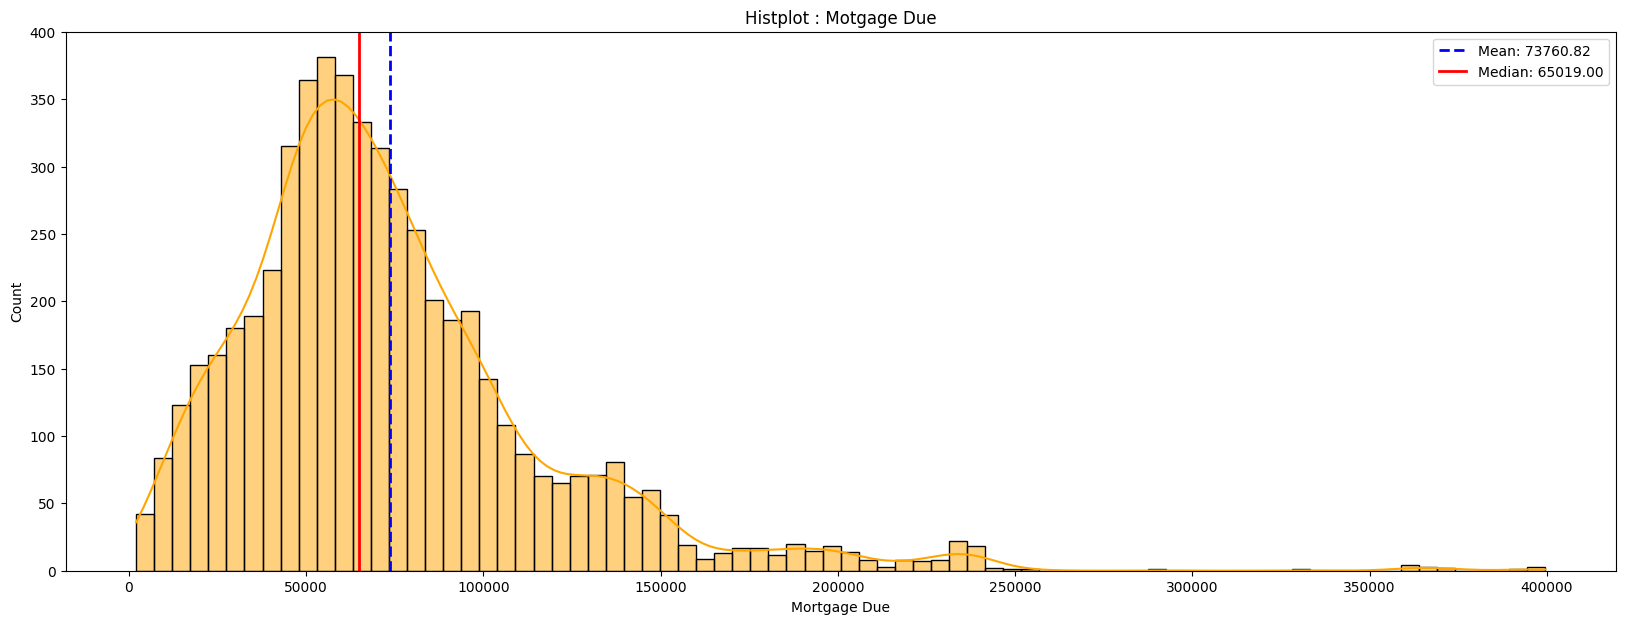

In [20]:
histplot_custom(data, 'MORTDUE', 'orange', True, 'Motgage Due', 'Mortgage Due', 'Count')

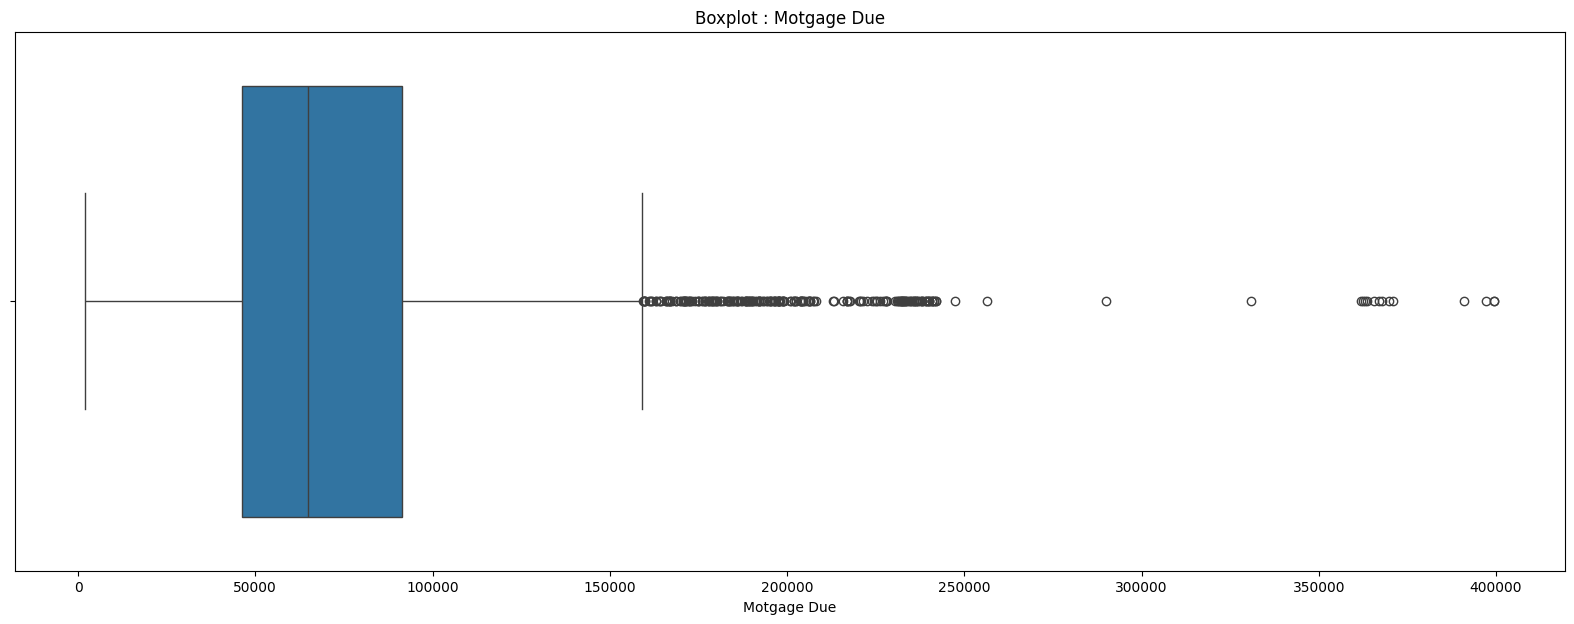

In [21]:
boxplot_custom(data, 'MORTDUE', 'Motgage Due', 'Motgage Due')

**Observations:**

*   **MORTDUE = Mortgage Due Amount**
*   Distribution is **right-skewed (positive skew)**, which indicates that while most mortgage amounts are moderate, there are few significantly higher amounts that pull distribution to the right
*   **KDE curve** has a peak at **60000-70000**, which indicates that most applicants have mortgage amount concentrated within this range
*   **mean = 73760** and **median = 65019**, which means that **mean > median**; this is typical for skewed distributions and indicates a tail of higher mortgage amounts
*   Most mortgage amounts are between **46000** and **91000**, which indicates the mid-range mortgage burden among applicants
*   **min = 2063** and **max = 399550**, which indicates wide variability in applicants mortgage profile
*   **IQR** spans from **46276 (Q1)** to **91488 (Q3)**, which indicates that **50%** of the mortgage amounts lie within mid-range amounts
*   Numerous outliers are visible, with some exceeding **300000** and even **400000**, which indicates that some applicants carry very high mortgage liabilities

#### **VALUE**

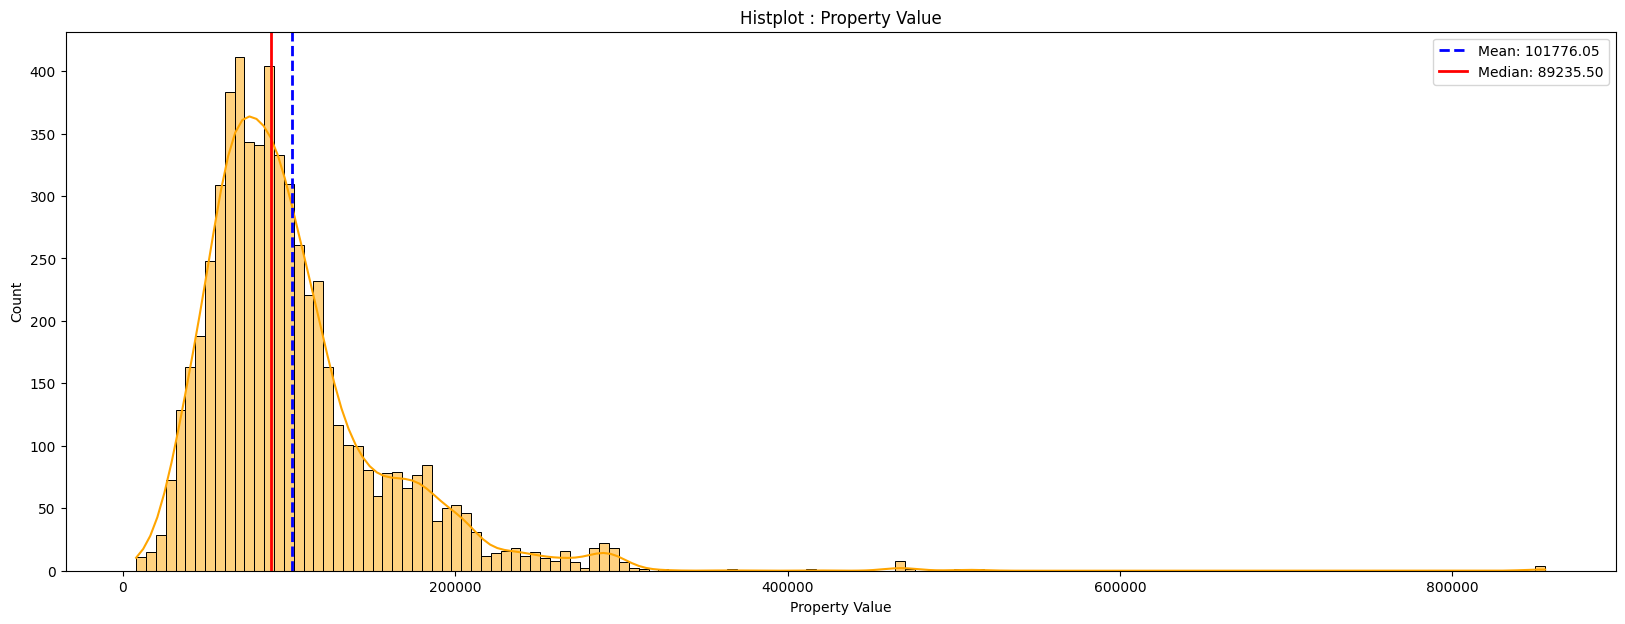

In [22]:
histplot_custom(data, 'VALUE', 'orange', True, 'Property Value', 'Property Value', 'Count')

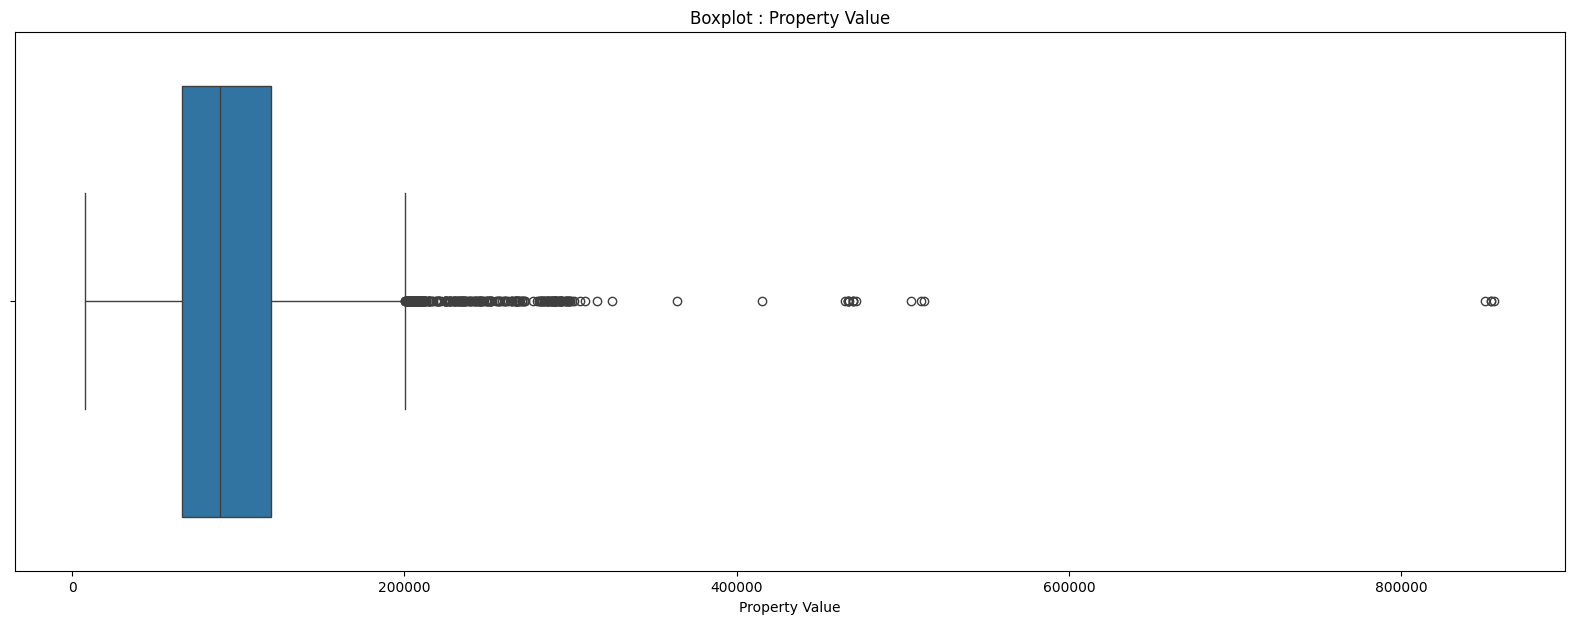

In [23]:
boxplot_custom(data, 'VALUE', 'Property Value', 'Property Value')

**Observations:**

*   **VALUE = Property Value**
*   Distribution is **right-skewed (positive skew)**, which indicates that most property values are on the lower end, with a long tail of properties with higher value
*   **KDE curve** has a peak at **85000-95000**, witch indicates that this is the most common range for property values in the dataset
*   **mean = 101776** and **median = 89235**, which means that **mean > median**; this confirms presence of skew and higher-value outliers
*   Majority of properties are valued beween **66000** and **120000**, which indicates mid-market residential segment
*   **min = 8000** and **max = 855909**, which indicates wide spread in property values. This may be due to mixed property types or/and geo location
*   **IQR** spans from **66075 (Q1)** to **119824 (Q3)**, which indicates that **50%** of the property values are concentrated within mid-range values
*   There are numerous outliers in the data with values extending beyond **400000** and even **850000**, which indicates that high-value or/and luxury properties are included in the dataset

#### **YOJ**

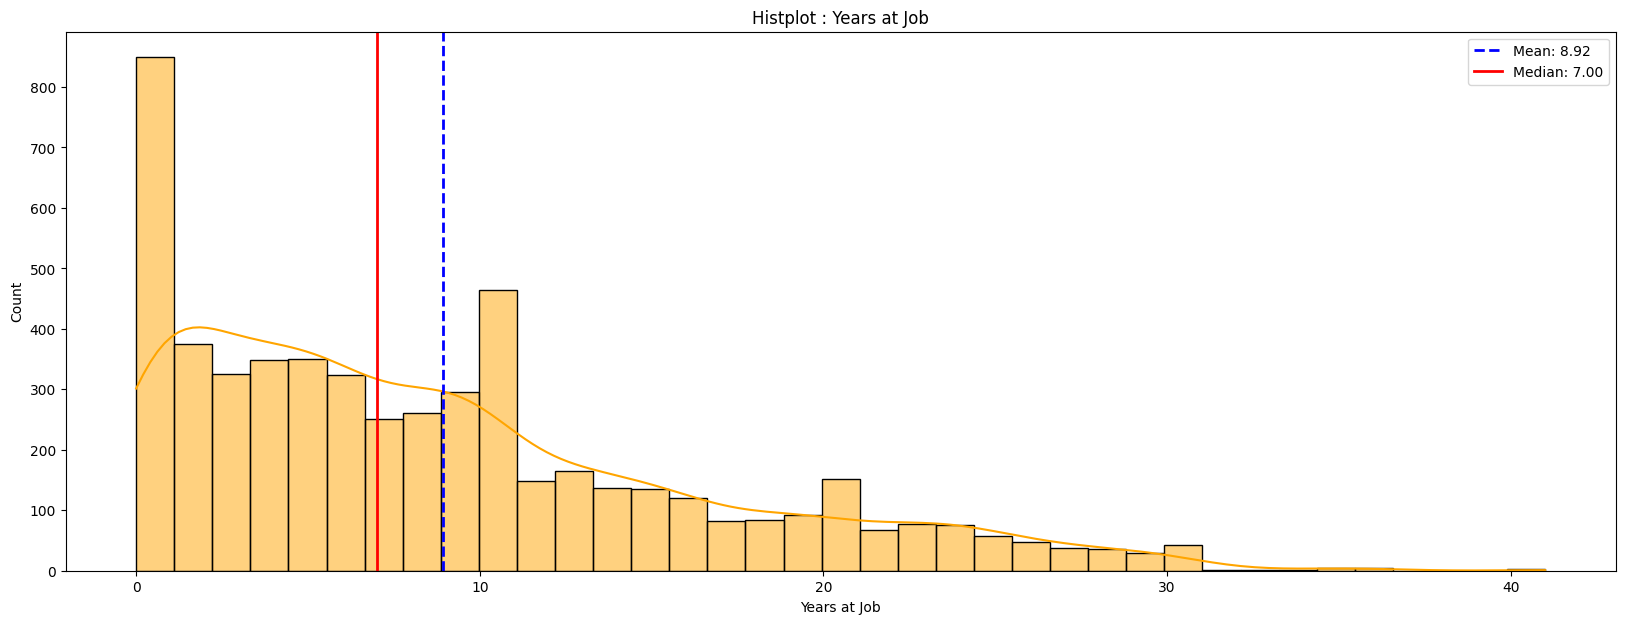

In [24]:
histplot_custom(data, 'YOJ', 'orange', True, 'Years at Job', 'Years at Job', 'Count')

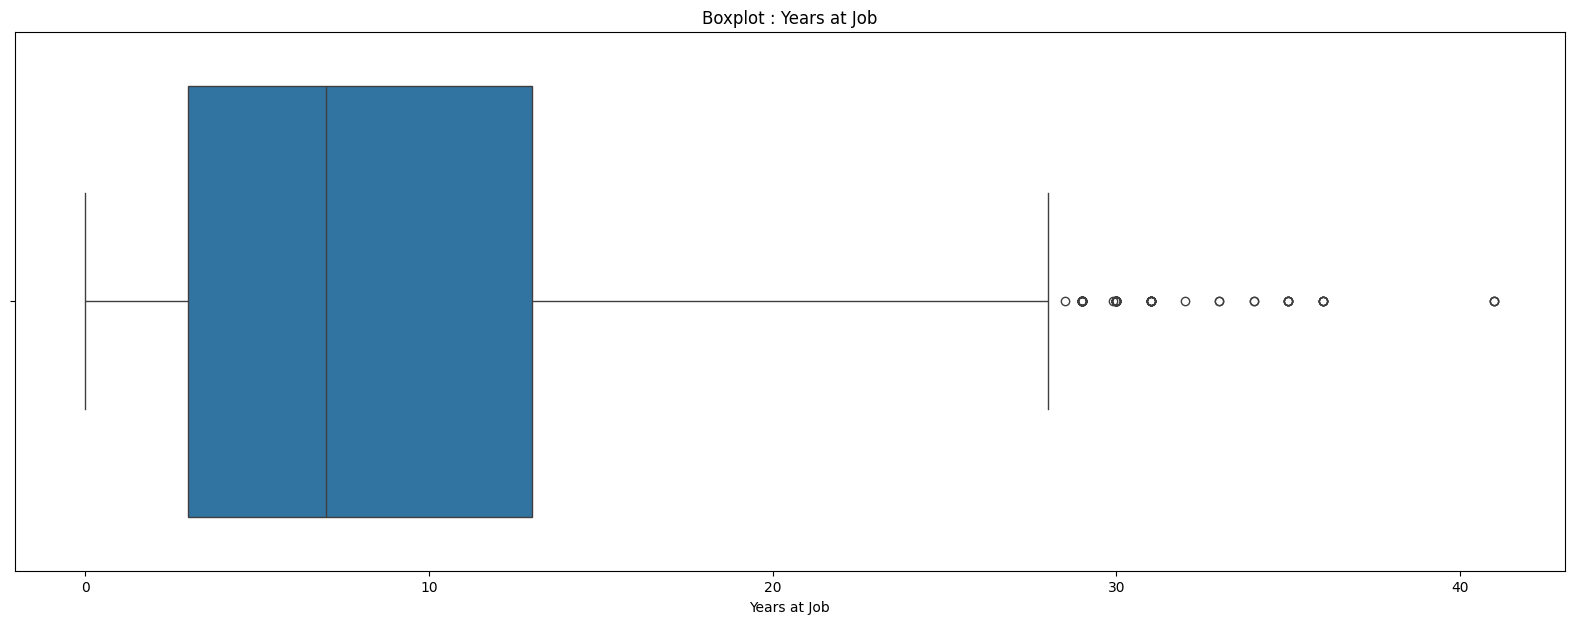

In [25]:
boxplot_custom(data, 'YOJ', 'Years at Job', 'Years at Job')

**Observations:**

*   **YOJ = Years at Current Job**
*   Distribution is **right-skewed (positive skew)**, which indicates that most applicants have spent fewer years at their current job
*   **KDE curve** has a peak at **0-2 years**, suggesting that large portion of applicants are new in their current job
*   **mean = 8.92** and **median = 7**, which means that **mean > median**, which indicates that small number of applicants who are long at their job are pulling the **mean** higher
*   Most values are betweeen **0** and **13** years, which implies that majority of applicants have been in their current job short to medium duration
*   The distribution includes several outliers **> 25 years**, with some applicants being at their current job for **41 years**
*   Outliers on the upper end are present, but they are less extreme compared to monetary variables **MORTDUE** and **VALUE**
*   **IQR** spans from **3 (Q1)** to **13 (Q3)**, which means that **50%** of applicants have between 3 and 13 years of job tenure

#### **DEROG**

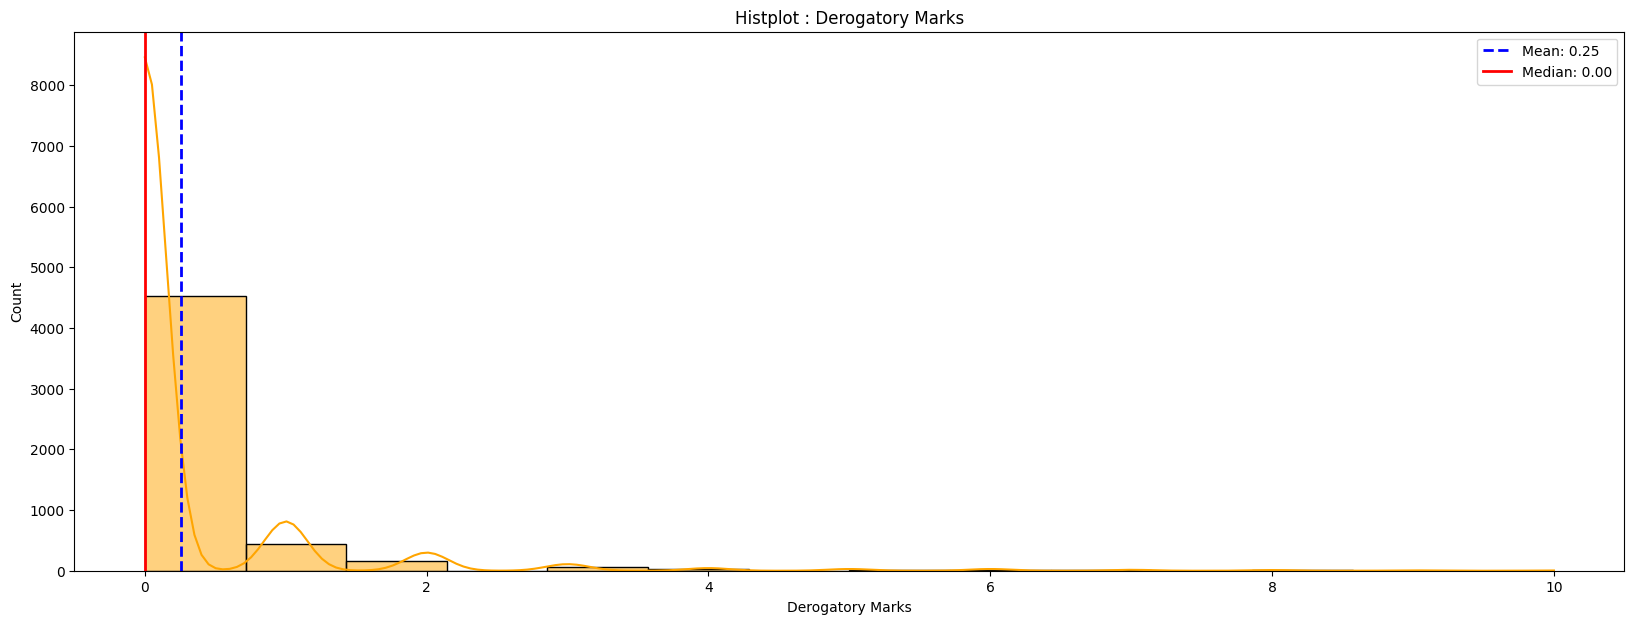

In [26]:
histplot_custom(data, 'DEROG', 'orange', True, 'Derogatory Marks', 'Derogatory Marks', 'Count')

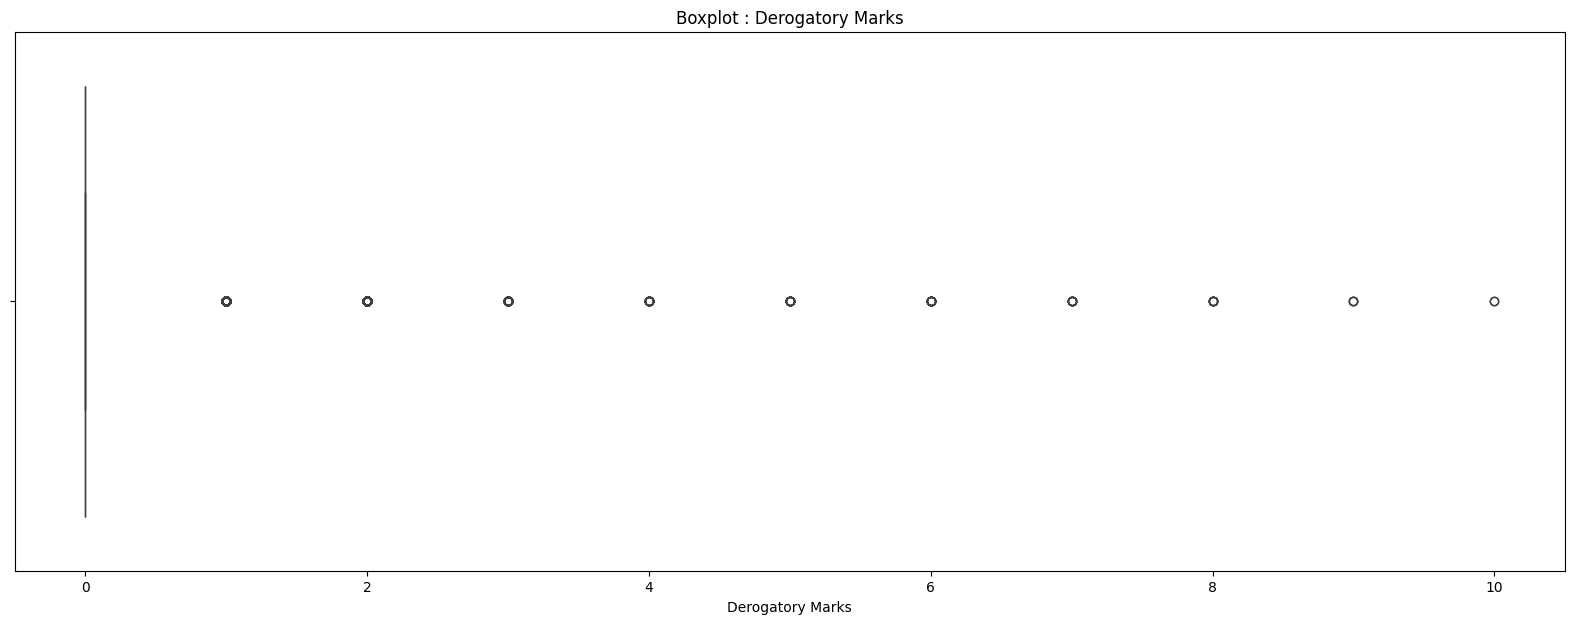

In [27]:
boxplot_custom(data, 'DEROG', 'Derogatory Marks', 'Derogatory Marks')

In [28]:
# Checking frequency distribution of values
data['DEROG'].value_counts()

,count
DEROG,
0.0,4527
1.0,435
2.0,160
3.0,58
4.0,23
5.0,15
6.0,15
7.0,8
8.0,6


**Observations:**

*   **DEROG = Derogatory Marks**
*   Distribution is extremely **right-skewed (positive skew)**, with majority of values being concentrated at **0 derogatory marks**, which indicates that most applicants have clean credit history
*   **KDE curve** peaks at **0**, indicating that derogatory marks are rare in dataset
*   **mean = 0.25** and **median = 0**, which strongly confirms that derogatory marks are rare and most applicants have none
*   Most values are exactly **0**, indicating low-risk applicant pool
*   Distribution includes a small number of outliers with values ranging from **1** to **10 derogatory marks**, which can indicate high-risk applicants
*   **75%** of applicants have **0 derogatory marks**
*   Variable **DEROG** is highly imbalanced and may benefit from **binary transformation**
*   **NOTE:** It makes sense to treat variable **DEROG** as **categorical variable**. We need to be carefull, as **~12%** of data is missing

#### **DELINQ**

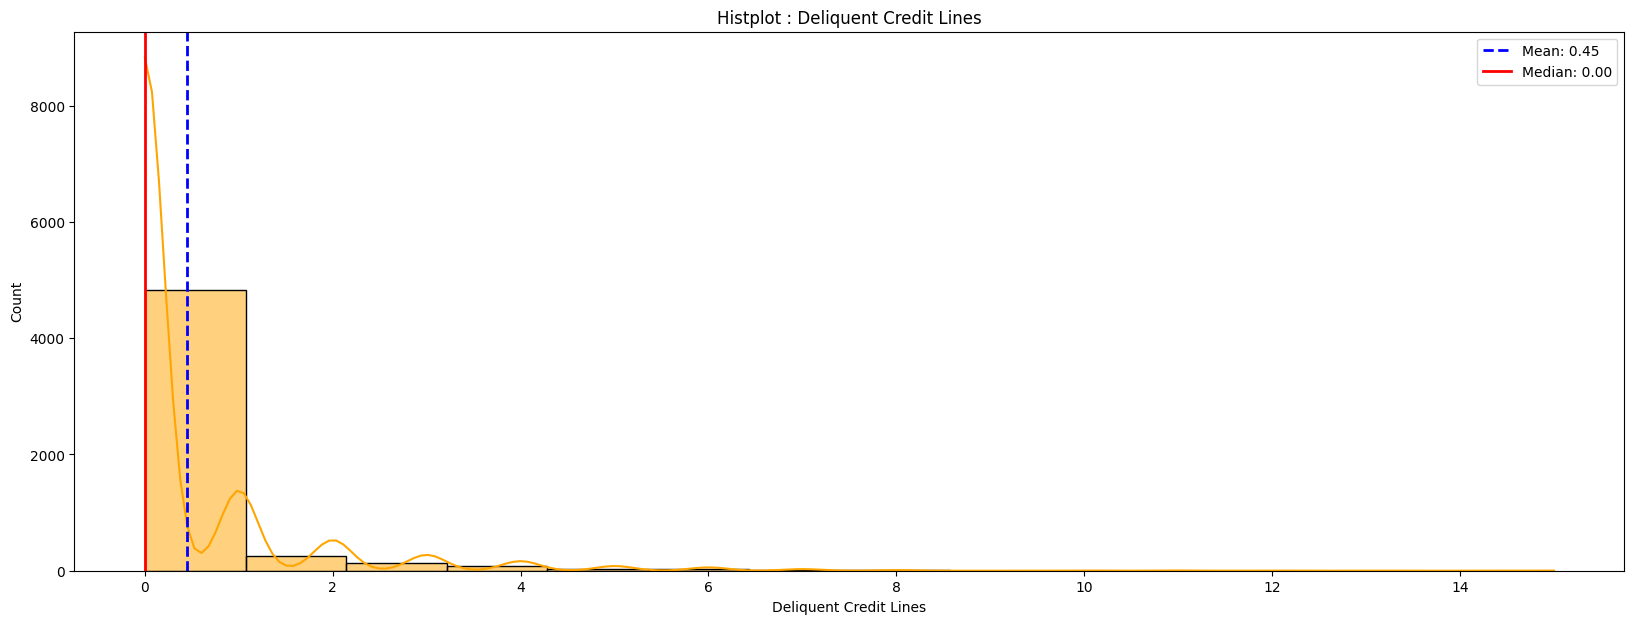

In [29]:
histplot_custom(data, 'DELINQ', 'orange', True, 'Deliquent Credit Lines', 'Deliquent Credit Lines', 'Count')

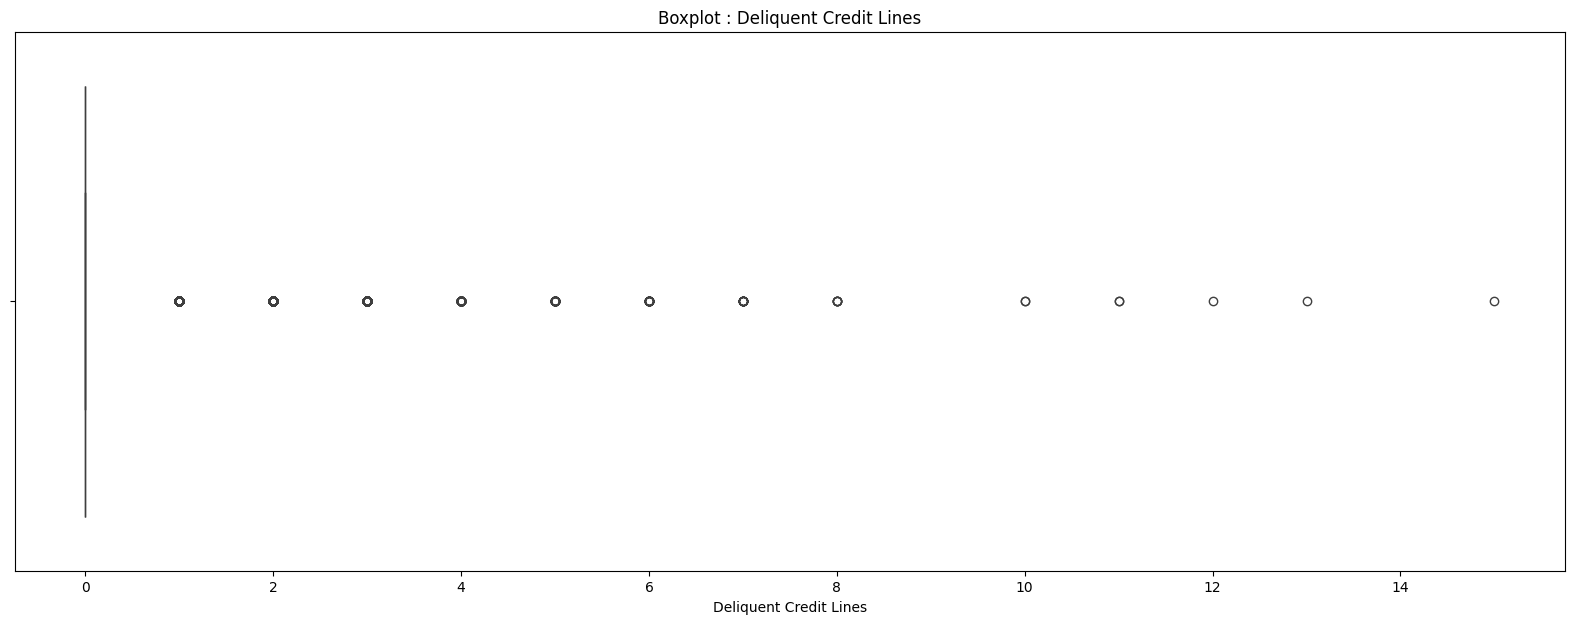

In [30]:
boxplot_custom(data, 'DELINQ', 'Deliquent Credit Lines', 'Deliquent Credit Lines')

In [31]:
# Checking frequency distribution of values
data['DELINQ'].value_counts()

,count
DELINQ,
0.0,4179
1.0,654
2.0,250
3.0,129
4.0,78
5.0,38
6.0,27
7.0,13
8.0,5


**Observations:**

*   **DELINQ = Deliquent Credit Lines**
*   Distribution is extremely **right-skewed (positive skew)**, with majority of values clustered at **0**, which indicates that most of applicants do not have deliquent credit lines
*   **KDE curve** peaks at **0**, confirming that the most common situation is **no deliquency**
*   **mean = 0.45** and **median = 0**, which shows that more than 50% of applicants have no deliquencies at all
*   Applicants with values **>= 1** are a minority, indicating that deliquency is relatively rare
*   All non-zero values are highlighted as outliers, making a strong case for **binary transformation**
*   Values range up to 15 deliquencies, with a note that this cases are statistically unusual and could indicate extreme financial risk
*   Due to extreme imbalance, this variable might benefit from binarization e.g. **0 = No deliquency, 1 = Has deliquency**
*   **NOTE:** It makes sense to treat variable **DELINQ** as **categorical variable**. We need to be carefull, as **~10%** of data is missing

#### **CLAGE**

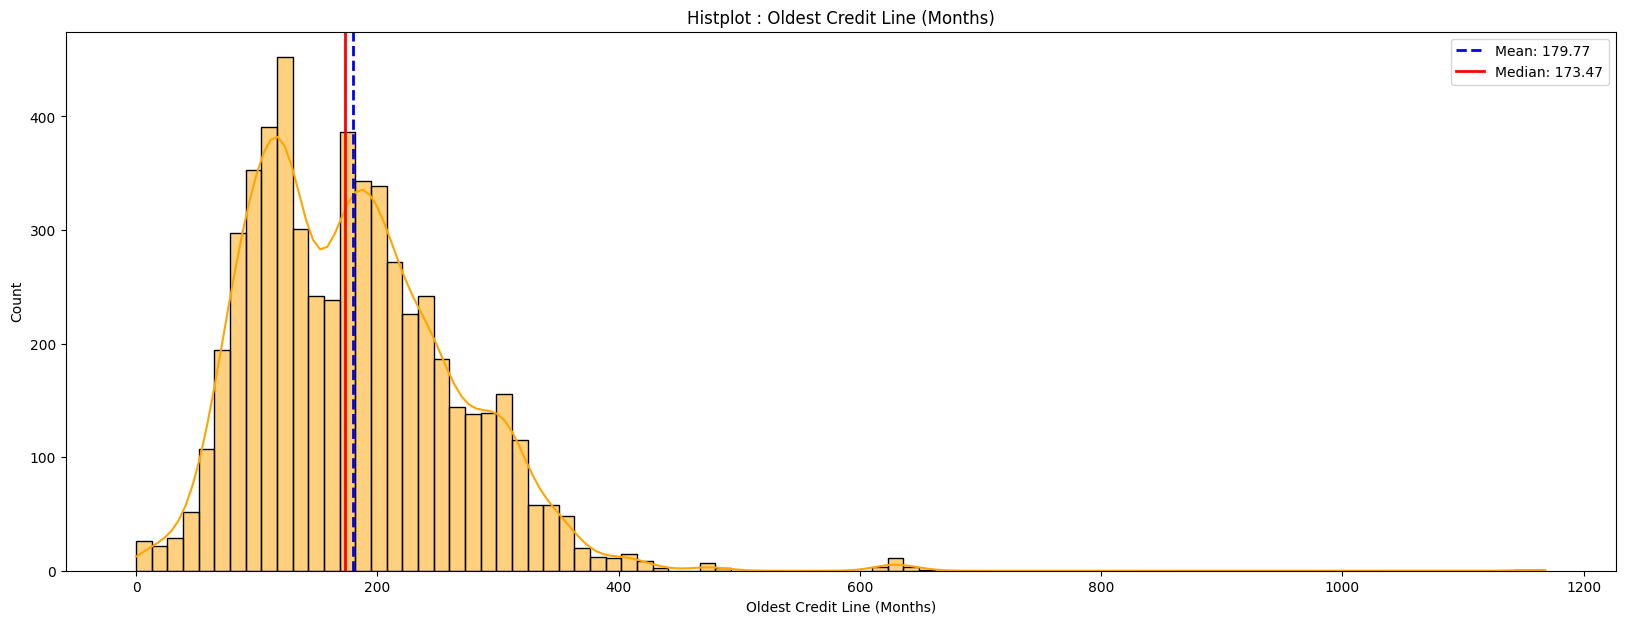

In [32]:
histplot_custom(data, 'CLAGE', 'orange', True, 'Oldest Credit Line (Months)', 'Oldest Credit Line (Months)', 'Count')

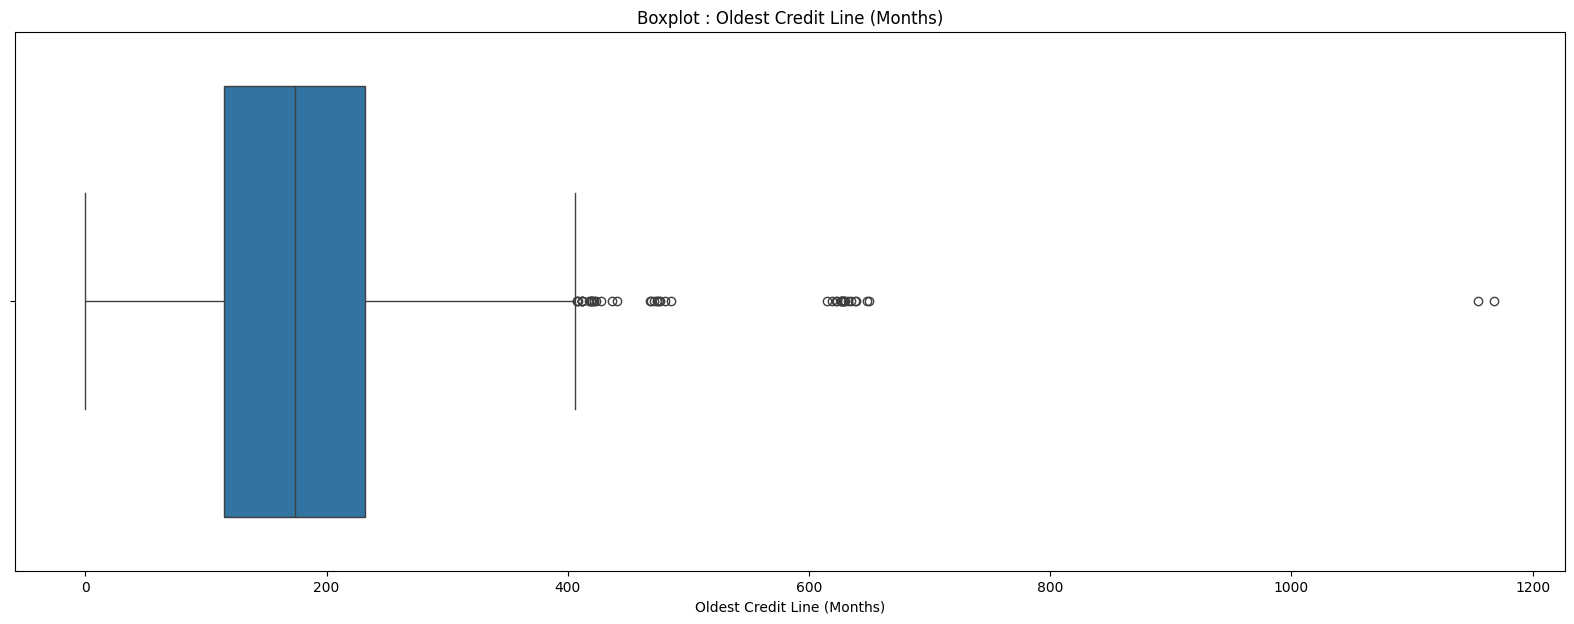

In [33]:
boxplot_custom(data, 'CLAGE', 'Oldest Credit Line (Months)', 'Oldest Credit Line (Months)')

In [34]:
# Filtering records where the age of the oldest credit line is > 600 months (50 years)
data[data['CLAGE'] > 600]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN
3679,1,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138
3787,0,20000,56135.0,93234.0,HomeImp,ProfExe,18.0,0.0,0.0,630.033333,1.0,24.0,NaN
3856,0,20200,61303.0,97780.0,HomeImp,ProfExe,17.0,0.0,1.0,632.103186,1.0,24.0,20.737039
3868,0,20200,59347.0,97816.0,HomeImp,ProfExe,18.0,0.0,0.0,618.735890,1.0,24.0,21.668642
3928,0,20500,64113.0,98322.0,HomeImp,ProfExe,16.0,0.0,0.0,634.461893,1.0,23.0,19.574316
4040,0,21100,63955.0,95621.0,HomeImp,ProfExe,19.0,0.0,0.0,626.297094,0.0,24.0,20.010324
4059,0,21200,63093.0,101789.0,HomeImp,ProfExe,18.0,0.0,0.0,623.456209,1.0,24.0,19.414588
4098,0,21400,64378.0,99343.0,HomeImp,ProfExe,18.0,0.0,0.0,627.702390,1.0,23.0,20.688715
4143,0,21600,59219.0,98111.0,HomeImp,ProfExe,18.0,0.0,0.0,626.771393,1.0,23.0,21.241684


**Observations:**

*   **CLAGE = Age of the Oldest Credit Line (in Months)**
*   Distribution is **right-skewed (positive skew)**, indicating that majority of applicants have had credit lines open fewer months, while couple of applicants have long credit history
*   **KDE curve** has a peak at **100-200 months**, where the majority of data is
*   **mean = 179.77** and **median = 173.47**, which means **mean > median**; small gap between mean and median indicates that distribution is centered around consistent age range
*   **min = 0 months** and **max = 1168 months**, which indicates that some applicants are fairly new to a loan, while the maximum of **1168 months = 97 years and 4 months** indicates an error or legacy account
*   Outliers on the upper end are present, with some applicants having very old credit lines that exceed **600 months**, which might indicate data irregularities
*   Applicants with **CLAG > 600 months (50 years)** are rare and represent either old credit histories or potential data anomalies
*   **IQR** spans from **115 (Q1)** to **231 (Q3) months**, which means that **50%** of applicants have their oldest loan between **9.5** and **19.25 years**, suggesting stable and established loan history

#### **NINQ**

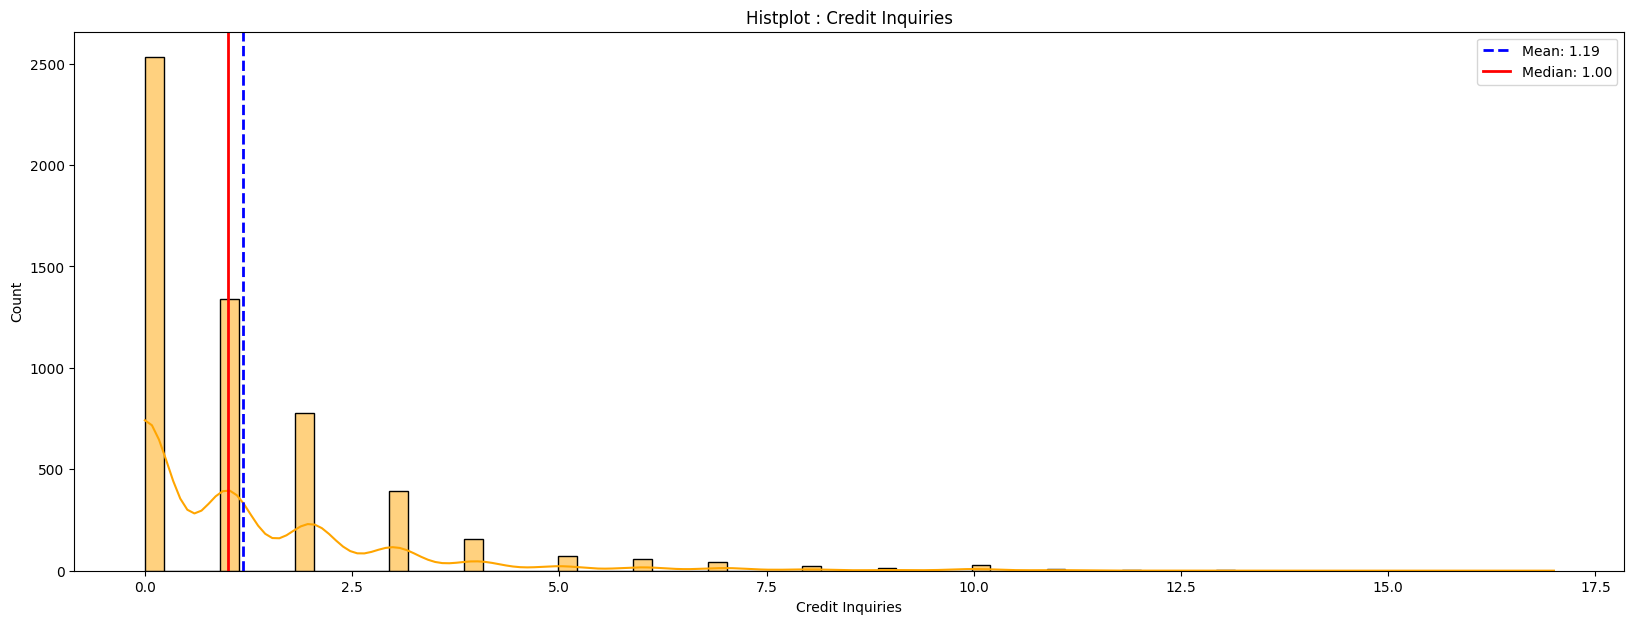

In [35]:
histplot_custom(data, 'NINQ', 'orange', True, 'Credit Inquiries', 'Credit Inquiries', 'Count')

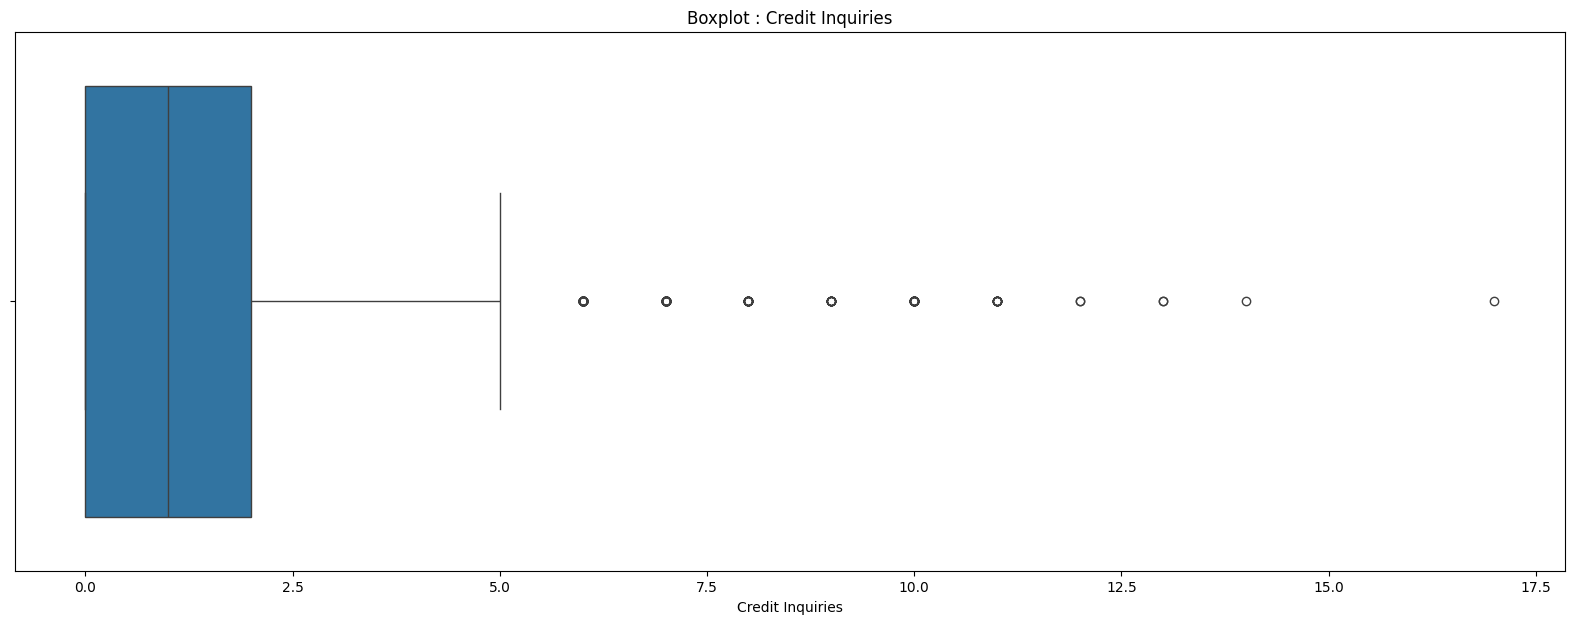

In [36]:
boxplot_custom(data, 'NINQ', 'Credit Inquiries', 'Credit Inquiries')

In [37]:
# Checking frequency distribution of values
data['NINQ'].value_counts()

,count
NINQ,
0.0,2531
1.0,1339
2.0,780
3.0,392
4.0,156
5.0,75
6.0,56
7.0,44
10.0,28


**Observations:**

*   **NINQ = Number of Recent Credit Inquiries**
*   Distribution is **right-skewed (positive skew)**, with majority of values concentrated at the lower end
*   **KDE curve** peaks sharply at **0 inquiries**, which indicates that the highest density of applicants had no recent credit inquiries
*   **mean = 1.19** and **median = 1.0**, which indicates that at least **50%** of applicants made 1 or fewer inquiries in the recent period
*   **min = 0** and **max = 17**
*   Most applicants had **0** to **1** credit inquiries, which suggests low credit seeking activity
*   There are few outliers, with some of the applicants having up to **17** inquiries, which could indicate financial stress
*   **IQR** spans from **0.0 (Q1)** to **2.0 (Q3)**, which means that **50%** of applicants had between **0** and **2 inquiries**

#### **CLNO**

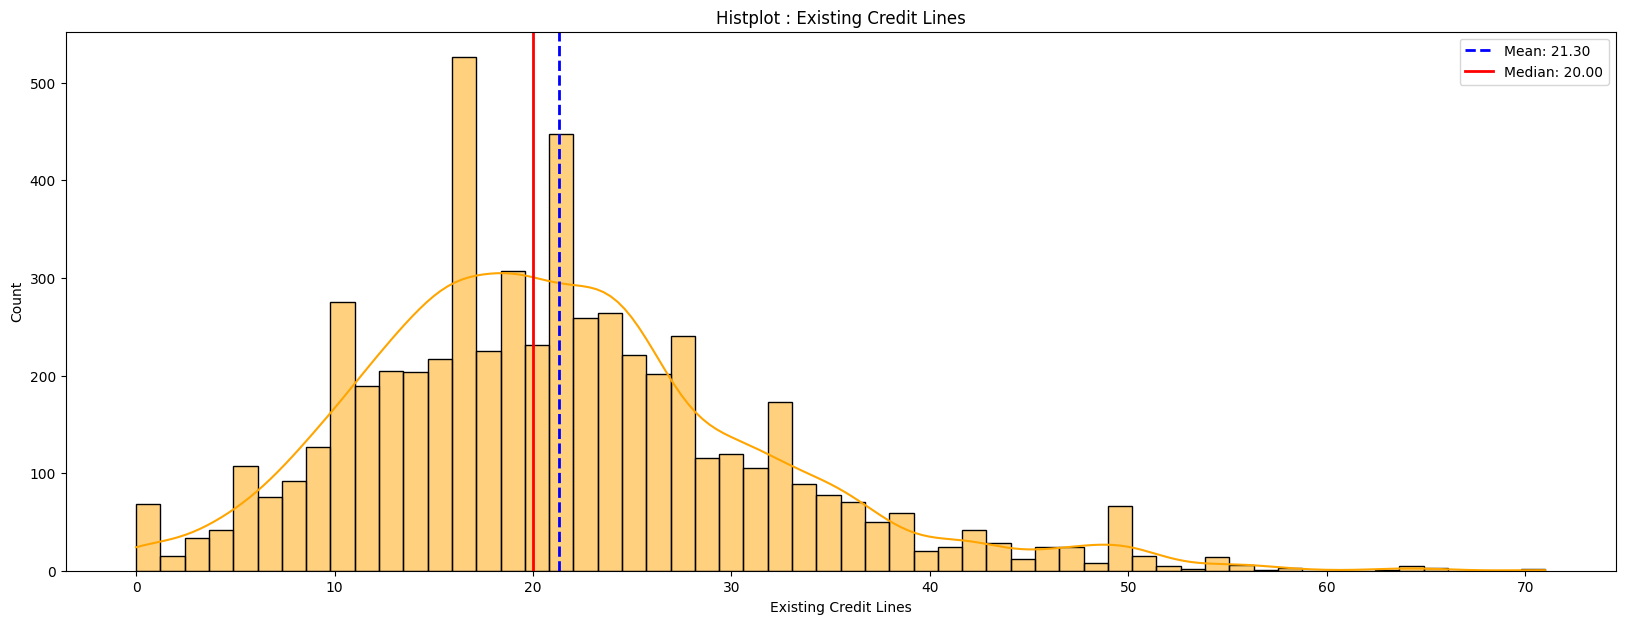

In [38]:
histplot_custom(data, 'CLNO', 'orange', True, 'Existing Credit Lines', 'Existing Credit Lines', 'Count')

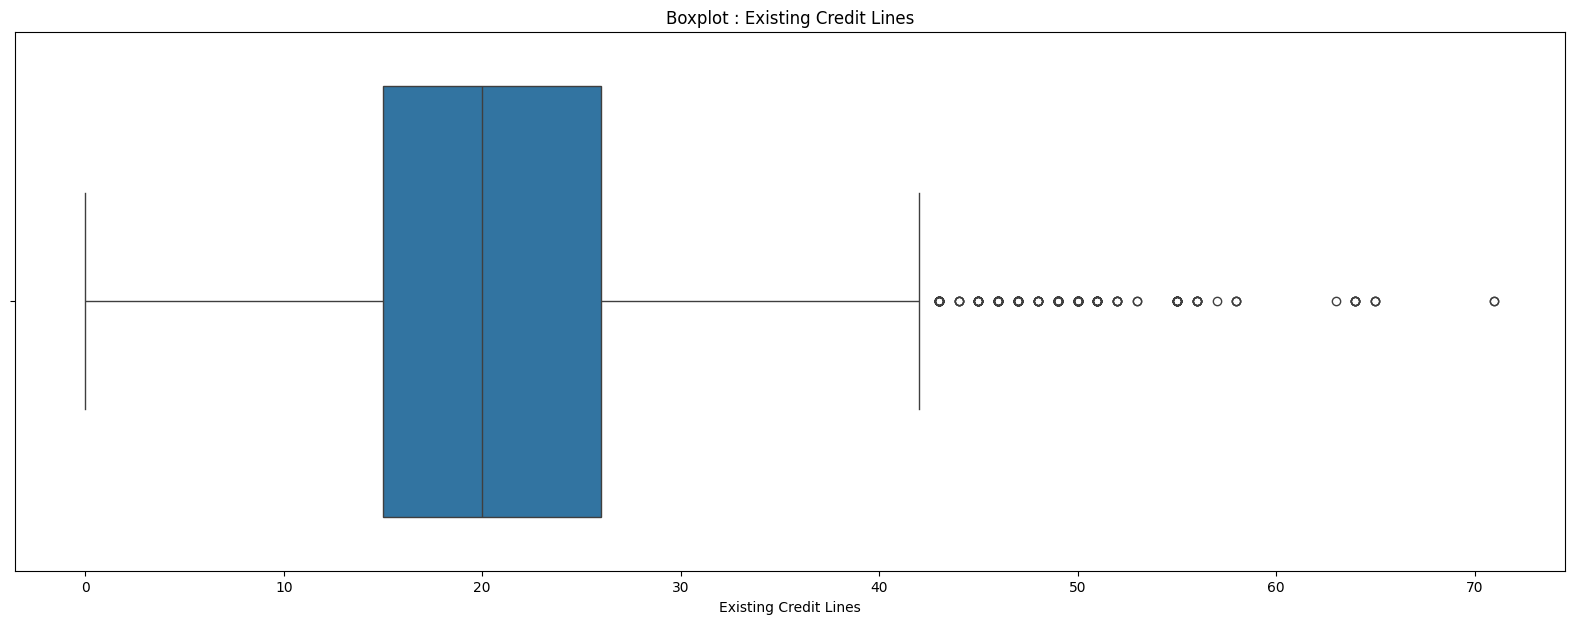

In [39]:
boxplot_custom(data, 'CLNO', 'Existing Credit Lines', 'Existing Credit Lines')

**Observations:**

*   **CLNO = Number of Existing Credit Lines**
*   Distribution is slightly **right-skewed (positive skew)** with a long tail extending toward higher values, which indicates that few applicants have many existing credit lines
*   **KDE curve** indicates that while most of the applicants fall into moderate number of lines, there is a significant density around **20**
*   **mean = 21.30** and **median = 20.00**, which indicates fairly balanced central tendency
*   **min = 0** and **max = 71** credit lines
*   Outliers are present in dataa, which indicates small subset of applicants with unusually high number of open credit lines; this could be a sign of hight credit usage, potential anomalies or/and data entry errors
*   Less than **5%** of data falls into the outlier zone, which makes it a candidate for targeted analysis e.g. fraud detection, VIP customers, credit overextension cases
*   **IQR** spans from **15 (Q1)** to **26 (Q3)**, which means that **50%** of applicants have between **15** and **26** existing credit lines

#### **DEBTINC**

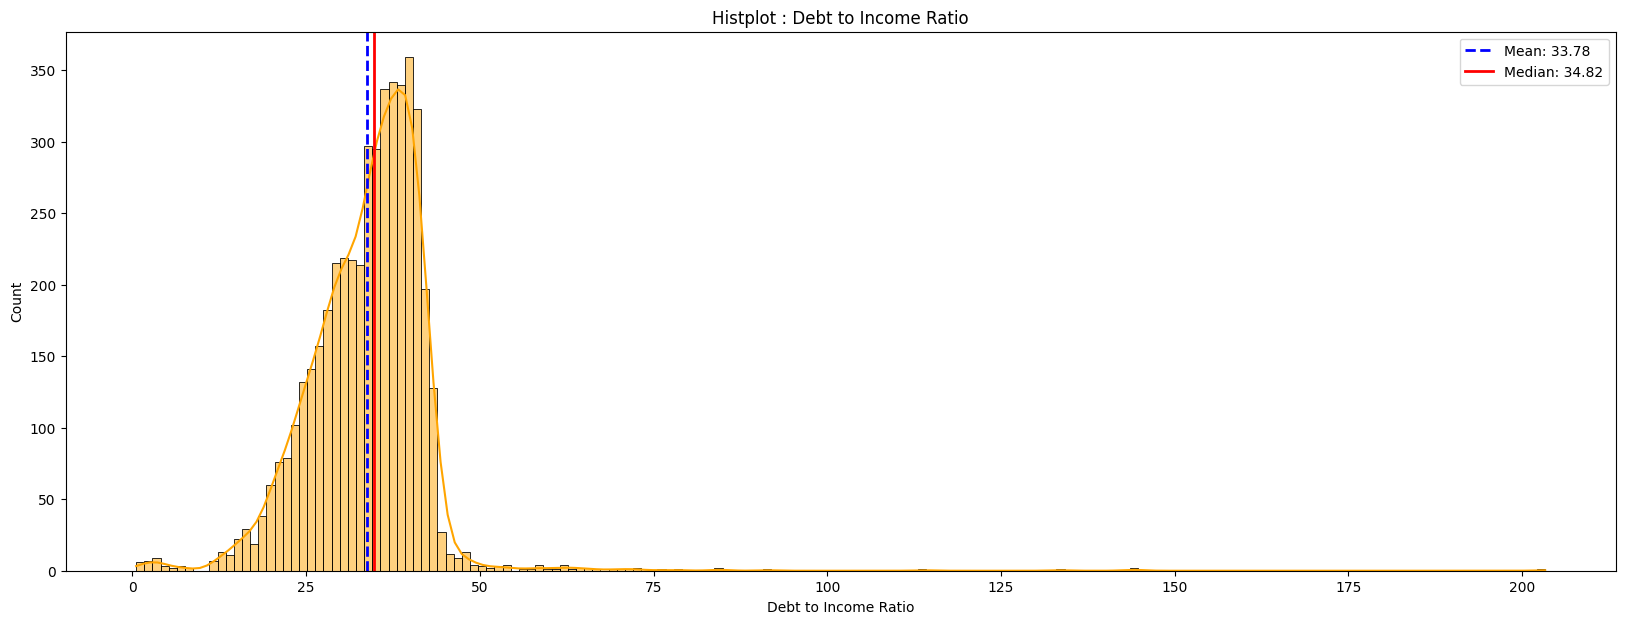

In [40]:
histplot_custom(data, 'DEBTINC', 'orange', True, 'Debt to Income Ratio', 'Debt to Income Ratio', 'Count')

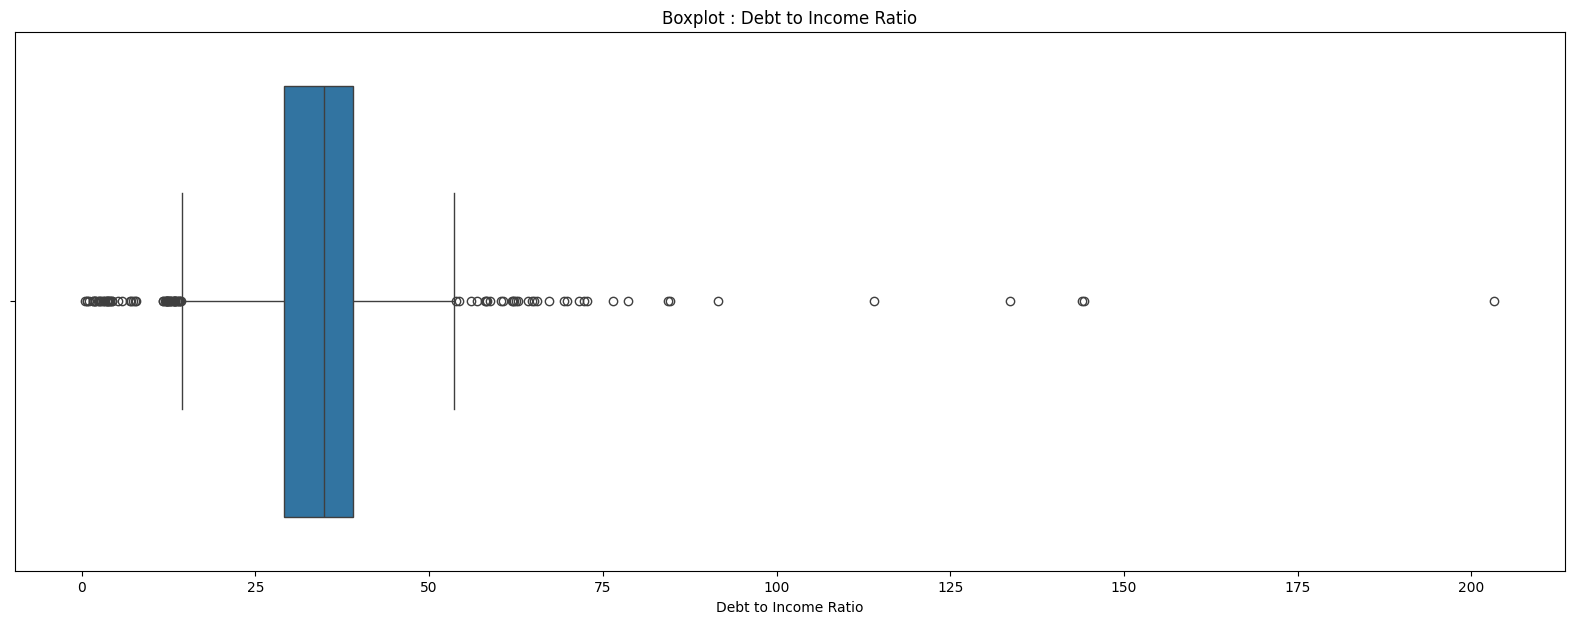

In [41]:
boxplot_custom(data, 'DEBTINC', 'Debt to Income Ratio', 'Debt to Income Ratio')

**Observations:**

*   **DEBTINC = Debt to Income Ratio**
*   Distribution is moderately **right-skewed (positive skew)**, which indicates that most of individuals have moderate debt-to-income ration
*   **KDE curve** shows a strong peak around **30-40 range**, which indicates that most applicants are within this range
*   **mean = 33.78** and **median = 34.82**, which suggests relatively symmetric central tendency
*   **min = 0.52** and **max = 203.31**, which indicates presence of significant outliers at the high end
*   A significant number of outliers is present on both ends, especially on the higher end above **50**
*   Extreme outliers above **100** may reflect financially over-burden individuals and should be investigated further
*   A large number of values is between **29** and **39**, which indicates that **50%** of applicants have manageable debt level
*   **IQR** spans from **29.14 (Q1)** to **39.00 (Q3)**, which means that **50%** of applicants have manageable debt levels

### **Categorical Variables**

For categorical variables we will use

*   sns.countplot()

In [42]:
# countplot_custom is user-defined function used for visualization with sns.countplot()
def countplot_custom(data, cat_cols, n_cols = 3, rotate = 'N'):
  # Defining grid dimension
  n = len(cat_cols)
  rows = math.ceil(n/n_cols)

  # Creating the subplots' grid
  fig, axes = plt.subplots(rows, n_cols, figsize = (5 * n_cols, 5 * rows))
  axes = axes.flatten()

  # Creating countplot for each categorical variable
  for i, col in enumerate(cat_cols):
    ax = axes[i]
    order = data[col].value_counts().index
    l = len(data[col])
    plot = sns.countplot(data = data, x = col, ax = ax, order = order, palette = 'Set2')

    # Adding percentage on top of each bar within countplot
    for p in plot.patches:
      height = p.get_height()
      width = p.get_width()
      percentage = f'{100 * height / l:.1f}%'
      x = p.get_x() + width / 2
      y = height
      plot.annotate(percentage, (x, y), ha = 'center')

    # Setting title
    ax.set_title(f'Countplot : {col}')

    # Setting x-label
    ax.set_xlabel(f'{col}')

    # Setting y-label
    ax.set_ylabel('Count')

    # Rotating x-axis tick labels
    if rotate == 'Y':
      ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

  plt.show()

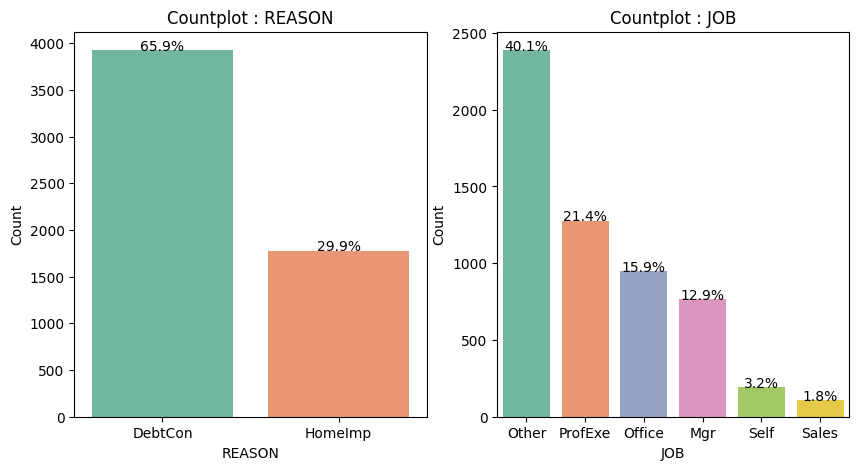

In [43]:
countplot_custom(data, cat_vars, 2, 'N')

In [44]:
# Checking class imbalance and understanding dominat categories
# Checking % of unique values for categorical variables
for i in cat_vars:
  print(f'Unique values for {i}')
  print('-' * 40)
  print(data[i].value_counts(normalize = True).mul(100))
  print('*' * 40)
  print ('\n')

Unique values for REASON
----------------------------------------
REASON
DebtCon    68.815697
HomeImp    31.184303
Name: proportion, dtype: float64
****************************************


Unique values for JOB
----------------------------------------
JOB
Other      42.034853
ProfExe    22.460834
Office     16.687203
Mgr        13.501144
Self        3.397289
Sales       1.918676
Name: proportion, dtype: float64
****************************************




**Observations:**

**NOTE:** **value_count(normalize = True)** by default excludes **NaN values** when calculating **%**, while **sns.countplot()** includes **all data (NULL + non-NULL)**. We will be using **% values** calculated by **value_count(normalize = True)**

*   **REASON = Reason for Loan**
*   The dataset shows class imbalance in variable **REASON**
*   **DebtCon = Debt Consolidation** is dominant category with **68.82%**, while **HomeImp = Home Improvement** accounts only for **31.18%** of cases
*   Most loan applicants are consolidating existing debts, rather than investing in home improvements

*   **JOB = Current Job Role of an Applicant**
*   Distribution of **JOB** variable is highly imbalanced accross **6** job types
*   The most common job category is **Other** with **42.03**, which indicates wide variety of unspecified or less structured employment types
*   Formal job roles are present but outnumbered by non-specified roles
*   Low number of **self-employed** and **sales** individuals indicates that those job roles are either underreported or they have limited access to loan

## **Exploratory Data Analysis (EDA) - Bivariate/Multivariate Analysis**

### **Bivariate Analysis**

### **Relationship between Target Variable BAD and Numerical Variables**

In [45]:
# Grouping mean of numerical variables by BAD
data.groupby(['BAD'])[num_vars].mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,33.253129
1,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645


**Observations:**

*   Applicants who defaulted (**BAD = 0**) tend to have weaker financial indicators than applicants who repaid their loan (**BAD = 0**)
*   Defaulters borrow slightly smaller amounts on average, which indicates that default risk is not limited to high loan values
*   Defaulters tend to have slightly lower remaining mortgages, which might mean smaller or less secure properties
*   Homes owned by defaulters are slightly less valuable, which might indicate lower asset backing
*   Longer employment history is associated with better creditworthiness
*   Longer credit history correlates with lower default rates
*   Defaulters have **5x** more derogatory records, indicating poor credit behavior
*   Deliquencies are **5x** higher among defaulters, which indicates **strong predictive power** for **default**
*   More inquiries suggest financial distress or aggressive behavior in defaulters
*   Total credit lines alone are not good **predictive power** for **default**; quality and recency of activity matter more
*   Defaulters have higher debt-to-income ration, which reflects reduced repayment capacity


### **Relationship between Target Variable BAD and Numerical Variables LOAN, VALUE and MORTDUE**

In [46]:
# boxplot_custom_BAD is user-defined function used for visualization with sns.boxplot()
def boxplot_custom_BAD(data, target_col, num_cols, n_cols = 3):
  # Calculating number of rows for subplot grid
  n_rows = (len(num_cols) + n_cols - 1) // n_cols

  # Setting size of a plot
  plt.figure(figsize = (5 * n_cols, 5 * n_rows))

  # Looping through each numerical column to create individual boxplots
  for i, col in enumerate(num_cols, 1):
    # Creating sublot
    plt.subplot(n_rows, n_cols, i)

    # Creating boxplot
    sns.boxplot(data = data, x = target_col, y = col)

    # Setting title
    plt.title(f'{target_col} vs {col}')

    # Setting x-axis
    plt.xlabel(target_col)

    # Setting y-axis
    plt.ylabel(col)

  plt.show()

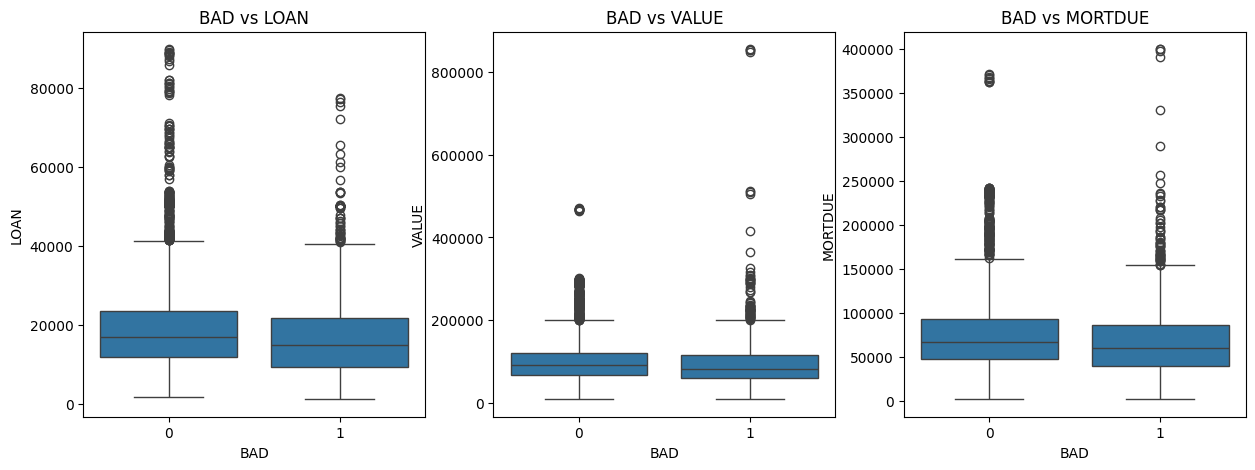

In [47]:
num_columns = ['LOAN', 'VALUE', 'MORTDUE']

boxplot_custom_BAD(data, 'BAD', num_columns)

**Observations:**

*   **BAD vs LOAN**
    *   Distribution of loan amounts for defaulters (**BAD = 1**) and non-defaulters (**BAD = 0**) appear very similar, menaing that both groups have similar central tendencies and spread
    *   Loan amount alone is not strong predictor of default
*   **BAD vs VALUE**
    *   Distribution of property value is very similar for both groups, defaulters (**BAD = 1**) and non-defaulters (**BAD = 0**)
    *   There are more extreme outliers for the group of defaulters, but the core distribution overlaps significantly
    *   There is no strong correlation between property value and default rate
    *   Property value alone is not strong predictor of default
*   **BAD vs MORTDUE**
    *   Overall distribution beween defaulters (**BAD = 1**) and non-defaulters (**BAD = 0**) is not significantly different
    *   Mortgage due alone is not strong predictor of default
*   **Conclusion:** None of the 3 variables, **LOAN, VALUE, MORTDUE** show strong visual differences between defaulters (**BAD = 1**) and non-defaulters (**BAD = 0**)

### **Relationship between Target Variable BAD and Numerical Variables DEROG, DELINQ, DEBTINC, CLAGE and CLNO**

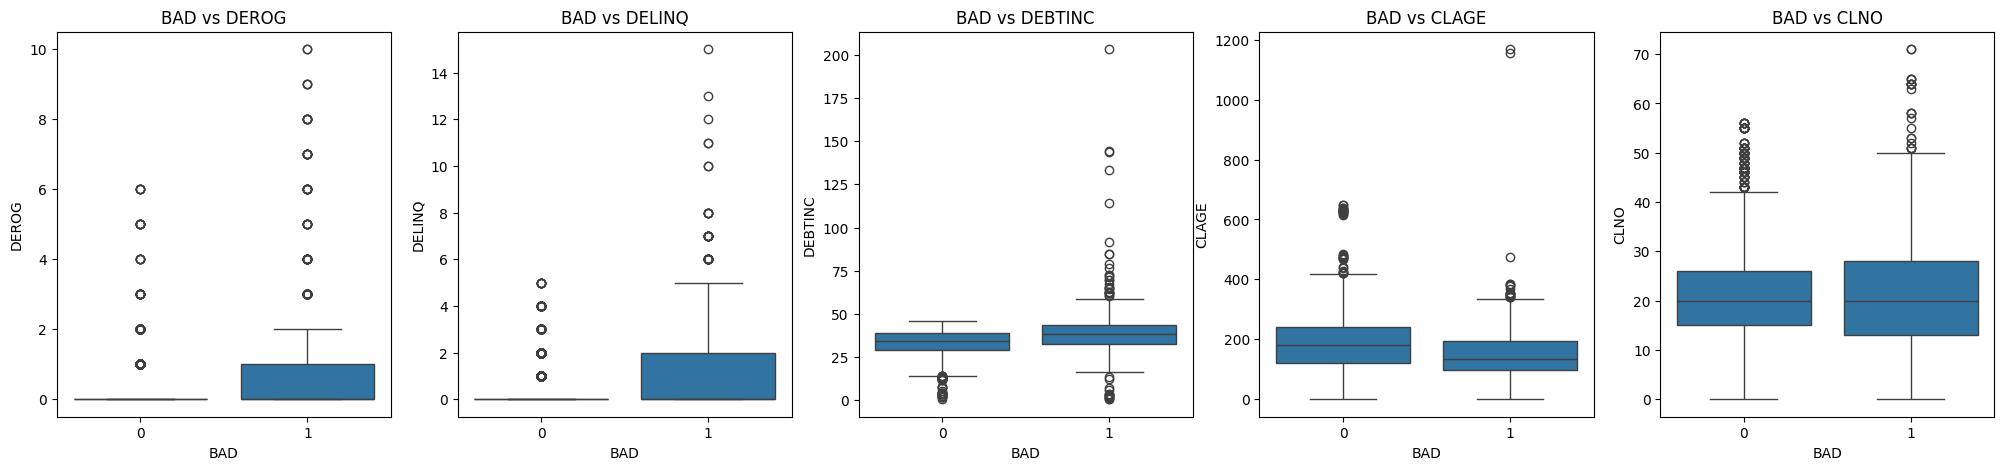

In [48]:
num_columns1 = ['DEROG', 'DELINQ', 'DEBTINC', 'CLAGE', 'CLNO']

boxplot_custom_BAD(data, 'BAD', num_columns1, n_cols = 5)

**Observations:**

*   **BAD vs DEROG**
    *   Most non-defaulters (**BAD = 0**) have **0 derogatory marks**, while defaulters (**BAD = 1**) show wide range of derogatory marks
    *   Higher number of derogatory marks is linked to loan default
*   **BAD vs DELINQ**
    *   Non-defaulters (**BAD = 0**) have **0 deliquent credit lines**, while defaulters (**BAD = 1**) show more variaty and higher number of deliquent credit lines
    *   Higher number of deliquent credit lines is linked to loan default
*   **BAD vs CLNO**
    *   Distribution of existing credit lines is similar for both groups, defaulters (**BAD = 1**) and non-defaulters (**BAD = 0**), in terms of median and spread
    *   Applicants who have existing credit lines **> 60** defaulted
    *   Number of existing credit lines alone is not strong predictor of default
*   **BAD vs DEBTINC**
    *   Defaulters (**BAD = 1**) tend to have higher median and greater spread in debt-to-income ratio
    *   There are more extreme outliers among defaulters (**BAD = 1**)
    *   Higher debt-to-income ratio is linked to loan default
*   **Conclusion:**
    *   **DEROG, DELINQ**and **DEBTINC** are strong predictors of loan default
    *   **CLNO** alone is not strong predictor

### **Relationship between Numerical Variables VALUE & LOAN and VALUE & MORTDUE**

In [49]:
# scatterplot_custom is user-defined function used for vizualisation with sns.scatterplot()
# Parameter alpha is transparemcy level of points
def scatterplot_custom(data, num_cols, target_col, n_cols = 2, alpha = 0.5):
  # Calculating number of rows for subplot grid
  n_rows = (len(num_cols) + n_cols - 1) // n_cols

  # Setting size of a plot
  plt.figure(figsize = (5 * n_cols, 5 * n_rows))

  # Looping through each numerical column to create individual scatterplots
  for i, col in enumerate(num_cols, 1):
    # Creating sublot
    plt.subplot(n_rows, n_cols, i)

    # Creating scatterplot
    sns.scatterplot(data = data, x = col, y = target_col, alpha = alpha)

    # Setting title
    plt.title(f'{col} vs {target_col}')

    # Setting x-axis
    plt.xlabel(col)

    # Setting y-axis
    plt.ylabel(target_col)

  plt.show()

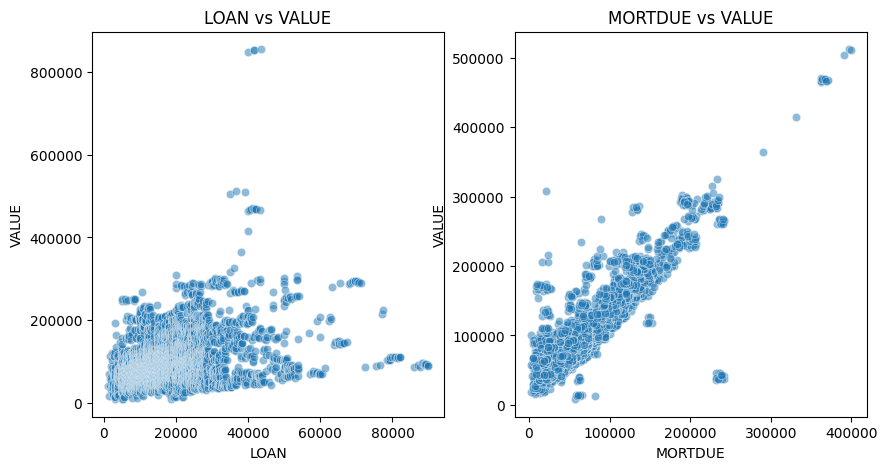

In [50]:
num_columns2 = ['LOAN', 'MORTDUE']

scatterplot_custom(data, num_columns2, 'VALUE')

**Observations:**

*   **LOAN vs VALUE**
    *   There is **positive but weak correlation**
    *   The loan amount tends to increase with property value, but the spread of data points indicates **wide variaty**, which suggests **weak linear correlation**
    *   **Clusters:** There is a cluster of loans below $200000, which indicates many small loans for lower-valued homes
    *   **High Variance:** For a given loan value, property values vary significantly

*   **MORTDUE vs VALUE**
    *   There is **strong positive correlation**, which indicates **clear linear relationship** between the mortgage due amount and property value
    *   **Linearity and spread:** Data follows more **narrow band**, which indicates that **MORTDUE** is better linear predictor of **VALUE** than **LOAN**

### **Relationship between Target Variable BAD and Categorical Variables**

In [51]:
# stackedbar_custom is user-defined function used for visualization with pandas plot() method
def stackedbar_custom(data, cat_columns, target_column):
  for i in cat_columns:
    # Creating normalized crosstab and converting it to percentage
    data_crosstab = pd.crosstab(data[i], data[target_column], normalize = 'index').mul(100)

    # Setting size of a plot
    fig, ax = plt.subplots(figsize=(8, 4))

    # Setting title
    ax.set_title(f'Stacked Bar : {i}')

    # Setting legend
    ax.legend(title = target_column)

    # Setting y-axis
    ax.set_ylabel('Percentage')

    # Plotting stacked bar
    data_crosstab.plot(kind = 'bar', stacked = 'True', ax = ax, color = sns.color_palette('Set2'))

    plt.show()

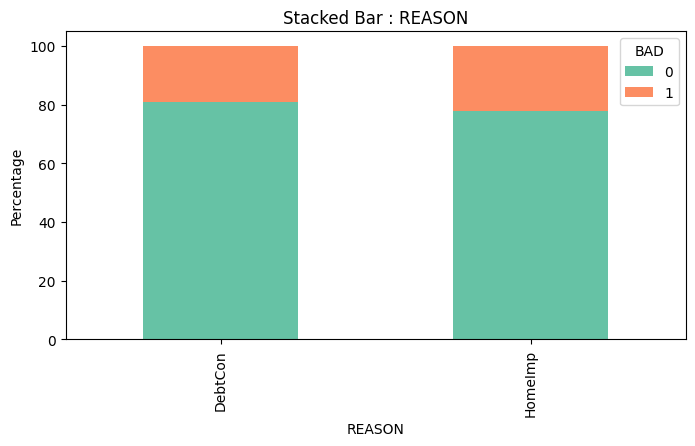

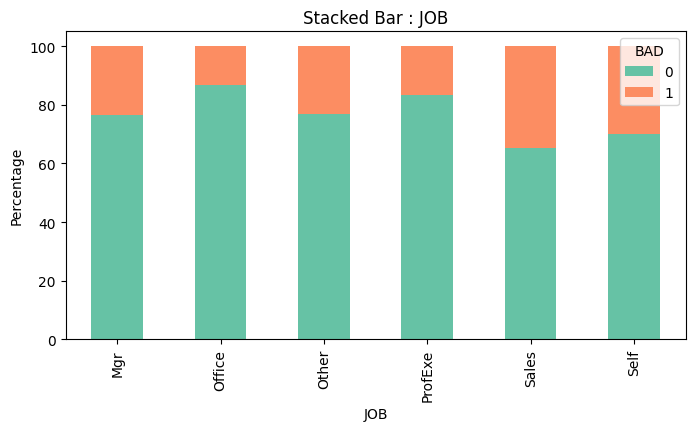

In [52]:
stackedbar_custom(data = data, cat_columns = cat_vars, target_column = 'BAD')

**Observations:**

*   **DebtCon = Debt Consolidation** has slightly lower default rate (**BAD = 1**) compared to **HomeImp = Home Improvement**
*   Debt consolidation applicants are slightly more creditworthy on average than home improvements applicants
*   **Office** and **ProfExe = Professional/Executive** applicants have the lowest default rates (**BAD = 1**), which indicates stronger credit profiles
*   **Sales** and **Self = Self-employed** applicants have the highest default proportion, suggesting higher risk
*   **Mgr = Manager** and **Other** are in-between, but lean toward lower default
*   Job category is relevant predictor for creditworthiness

### **Multivariate Analysis**

### **Correlation between Numerical Variables**

For correlation between numerical variables we will use

*   sns.heatmap()

**Note:** Variable **BAD** is binary categorical variable and as such it is not be added to a heatmap, even it is of type **int64**

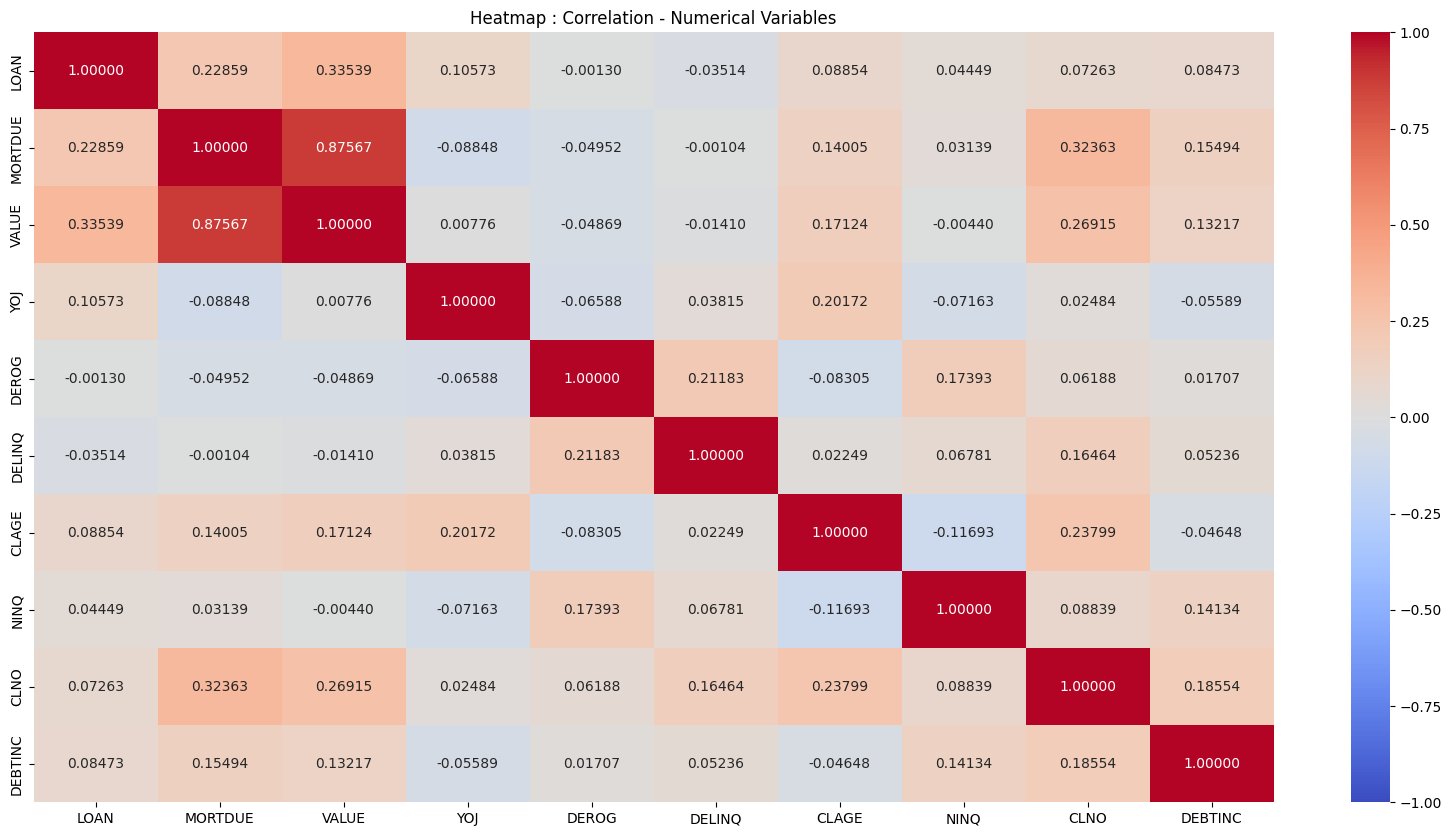

In [53]:
# Setting correlation
corr = data[num_vars].corr()

# Setting size of a plot
plt.figure(figsize = (20, 10))

# Setting title
plt.title(f'Heatmap : Correlation - Numerical Variables')

# Plotting the heatmap
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = ".5f", xticklabels = corr.columns, yticklabels = corr.columns)

plt.show()

**Observations:**

*   There is **strong positive correlation (0.88)** between **MORTDUE** and **VALUE**, which indicates that higher mortgage balances are closely tied to higher property values
*   **LOAN** and **VALUE** have **moderate positive correlation (0.34)**
*   **LOAN** and **MORTDUE** have **weak-to-moderate positive correlation (0.23)**
*   Most other variables, including **DEROG, DELINQ, YOJ, NINQ** and **CLAGE** have **weak corellation (close to 0)** with **LOAN, VALUE** and **MORTDUE**, which indicates little to no linear relationship
*   **DEBTINC** has **low correlation** with other variables, highest is **0.19** with **CLNO**, which might suggest minor influence
*   **DEROG** and **DELINQ** have **weak-to-moderate positive correlation (0.21)**, probably because individuals with derogatory marks tend to have more delinquencies
*   **CLAGE** and **CLNO** have **weak-to-moderate positive correlation (0.24)**, which indicates that longer credit histories might be associated with more credit lines
*   **VALUE** and **CLNO** have **weak-to-moderate positive corellation (0.27)**, which indicates that individuals with higher-valued property tend to have more credit accounts
*   **MORTDUE** and ""CLNO** have **moderate positive corellation (0.32)**, which indicates that individuals with higher mortgage balances tend to have greater number of active credit lines
*   **YOJ** and **CLAGE** have **weak-to-moderate positive corellation (0.20)**, which indicates that individuals with longer employment duration tend to have older credit histories, but the relationship in **not strong**
*   Other than **VALUE** and **MORTDUE** no other variables exceed **0.3 correlation** which means that **multicollinearity** is **low** and relatively **independent** in terms of linear relationship

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

### **Data Description**

*   Given dataset has **5960 rows** and **13 columns**
*   There are **2** variables of dtype **int64**, **9** variables of dtype **float64** and **2** variables of dtype **object**
*   Variables **BAD** and **LOAN** have **5960 non-null values**
*   Number of missing values per variable is
   *   **DEBTINC = 1267**, which represents **21.26%**
   *   **DEROG = 708**
   *   **DELINQ = 580**
   *   **MORTDUE = 518**
   *   **YOJ = 515**
   *   **NINQ = 510**
   *   **CLAGE = 308**
   *   **JOB = 279**
   *   **REASON = 252**
   *   **CLNO = 222**
   *   **VALUE = 112**
*   Variables **DEBTINC, DEROG** and **DELINQ** show significant number of missing values, but are identofied as **strong predictors**, meaning that we need to treat missing values and cannot drop those columns from a dataset
*   There are no duplicates in the data

### **Most Important EDA Observations**

*   Target variable **BAD** has only **~20%** of defaulters, which indicates class imbalance problem
    *   **Recommendation:** Handle class imbalance in modeling
*   **Strong Predictors**
    *   **DEROG, DELINQ** and **DEBTINC** are strong predictors of loan default
*   **Moderate Predictors**
    *   **REASON, JOB, CLAGE, NINQ** and **CLNO** show some variation in default rates accross different categories
*   **Weak Predictors**
    *   **LOAN, VALUE** and **MORTDUE** are weak predictors of loan default, but may be useful when combined with other features
    *   **Recommendation:** Use cautiously or engineer better features
*   Applicants with job **Self-employed** and **Sales** have higher risk to default
    *   **Recommendation:** Include **JOB** in modeling
*   Applicants with **HomeImp = Home Improvement** have slightly higher default rate, which indicates that applicans who have apply for home improvement loan are riskier
    *   **Recommendation:** Categorical encoding might help
*   **Correlation Insights**
    *   **MORTDUE** and **VALUE** are highly correlated and may cause **multicollinearity**
    *   **DEBTINC** has weak correlation with other variables, but high predictive power
    *   **DEROG** and **DELINQ** have moderate positive correlation

## **Treating Missing Values & Outliers**

### **Recommended Approach:**

1.   Identifying and treating missing values
2.   Detecting and treating outliers



## **Treating Missing Values**

### **Data Preparation**

In [54]:
# Creating copy of DataFrame data
data_raw = data.copy()

In [55]:
# Checking percentage of missing values per variable
((data.isnull().sum() / data.shape[0]).mul(100)).sort_values(ascending = False)

,0
DEBTINC,21.258389
DEROG,11.879195
DELINQ,9.731544
MORTDUE,8.691275
YOJ,8.640940
NINQ,8.557047
CLAGE,5.167785
JOB,4.681208
REASON,4.228188
CLNO,3.724832


In [56]:
# add_missing_value_flag is user-definied function that is used to create a binary indicator for missing values
def add_missing_values_flag(data, column):
  # Defining name for new column
  flag_col = f'{column}_missing_values_flag'

  # Creating column that will be used as binary indicator for missing values
  # 1 = missing value, 0 = no missing value
  data[flag_col] = data[column].isnull().astype(bool)

  return data

In [57]:
# Identifying columns that have missing values
missing_values_col = [col for col in data.columns if data[col].isnull().any()]

# Applying add_missing_value_flag function to each column with missing values
for col in missing_values_col:
  data = add_missing_values_flag(data, col)

### **Numerical Variables**

Approach that will be used for treating missing values within numerical variables is based on percentage of missing values within respective variable:
*   **< 5%: Median Imputation**
*   **5 - 20%: Regression-Based Imputation**
*   **> 20%: KNN Imputation**

**Note:** **0%** will be excluded, since those are the variables that do not have missing values.

#### **Numerical Variables - Median Imputation**

In [58]:
# Applying Median Imputation on columns where missing values % is > 0 and < 5
# Calculating total number of rows
total_rows = data.shape[0]

for col in num_vars:
  # Calculating missing values %
  missing_values_perc = (data[col].isnull().sum() / total_rows) * 100

  # Applying median imputation
  if 0 < missing_values_perc < 5:
    print(f'Imputing {col} using Median Imputation')

    # Calculating median
    median_value = data[col].median()

    # Replacing NaNs with median
    data[col].fillna(median_value, inplace = True)

Imputing VALUE using Median Imputation
Imputing CLNO using Median Imputation


#### **Numerical Variables - Regression-Based Imputation**

In [59]:
# Applying Regression-Based Imputation on columns where missing values % is >= 5 and <=20
# Calculating total number of rows
total_rows = data.shape[0]

for col in num_vars:
  # Calculating missing values %
  missing_values_perc = (data[col].isnull().sum() / total_rows) * 100

  # Applying Regression-Based Imputation
  if 5 <= missing_values_perc <= 20:
    print(f'Imputing {col} using Regression-Based Imputation')

    # Defining dataset with known and unknown values
    known = data[data[col].notnull()]
    unknown = data[data[col].isnull()]

    # Selecting predictors (excluding target variable)
    regression_predictors = [c for c in num_vars if c != col and data[c].isnull().sum() == 0]

    # Proceeding only if predictors have no missing values
    if regression_predictors:
      # Initializing Linear Regression model
      prediction_model = LinearRegression()

      # Training the model
      prediction_model.fit(known[regression_predictors], known[col])

      # Predicting missing values
      predicted_value = prediction_model.predict(unknown[regression_predictors])

      # Assigning predicted values
      data.loc[data[col].isnull(), col] = predicted_value

    else:
      print(f'Skipped {col}: Regression-Based Imputation was not applied')

Imputing MORTDUE using Regression-Based Imputation
Imputing YOJ using Regression-Based Imputation
Imputing DEROG using Regression-Based Imputation
Imputing DELINQ using Regression-Based Imputation
Imputing CLAGE using Regression-Based Imputation
Imputing NINQ using Regression-Based Imputation


#### **Numerical Variables - KNN Imputation**

In [60]:
# Applying KNN Imputation on columns where missing values % is > 20
# Calculating total number of rows
total_rows = data.shape[0]

for col in num_vars:
  # Calculating missing values %
  missing_values_perc = (data[col].isnull().sum() / total_rows) * 100

  # Applying knn imputation
  if missing_values_perc > 20:
    print(f'Imputing {col} using KNN Imputation')

    # Selecting columns for KNN
    # Pre-requisites 1) must be numerical 2) must have minimal number of missing values (<= 20%)
    knn_columns = [c for c in num_vars if c != col and data[c].isnull().sum() / total_rows <= 0.2]

    # Adding current column
    knn_columns.append(col)

    # Creating data subset
    knn_data = data[knn_columns]

    # Initializing KNN Imputer
    knn_imputer = KNNImputer(n_neighbors = 5)

    # Applying imputation
    knn_imputed = knn_imputer.fit_transform(knn_data)

    # Updating original data with imputed values
    data[knn_columns] = pd.DataFrame(knn_imputed, columns = knn_columns)

Imputing DEBTINC using KNN Imputation


### **Categorical Variables**

Approach that will be used for treating missing values within categorical variables is **Mode Imputation**.

In [61]:
# Applying mode imputation
for col in cat_vars:
  print(f'Imputing {col} using Mode Imputation')

  # Identifying most frequent value
  mode_value = data[col].mode()[0]

  # Replacing NaNs with mode
  data[col].fillna(mode_value, inplace = True)

Imputing REASON using Mode Imputation
Imputing JOB using Mode Imputation


### **Data Cleaning**

Data cleaning will include:

1.   Verification of missing values in the dataset
2.   Dropping missing values flag columns



In [62]:
# Verifying if any missing values are present in data after data imputation
data.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,0
VALUE,0
REASON,0
JOB,0
YOJ,0
DEROG,0
DELINQ,0
CLAGE,0


In [63]:
# info() is used to print a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAD                          5960 non-null   int64  
 1   LOAN                         5960 non-null   float64
 2   MORTDUE                      5960 non-null   float64
 3   VALUE                        5960 non-null   float64
 4   REASON                       5960 non-null   object 
 5   JOB                          5960 non-null   object 
 6   YOJ                          5960 non-null   float64
 7   DEROG                        5960 non-null   float64
 8   DELINQ                       5960 non-null   float64
 9   CLAGE                        5960 non-null   float64
 10  NINQ                         5960 non-null   float64
 11  CLNO                         5960 non-null   float64
 12  DEBTINC                      5960 non-null   float64
 13  MORTDUE_missing_va

In [64]:
# Creating list of boolean variables
bool_vars = data.select_dtypes(['bool']).columns.tolist()

# Dropping missing values flag columns
data = data.drop(bool_vars, axis = 1)

In [65]:
# info() is used to print a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   float64
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 605.4+ KB


In [66]:
# Exporting data from data DataFrame to a CSV file
data.to_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values.csv', index = False)

## **Treating Outliers**

1.   **Recommended Approach**
    *   We will use **IQR-Based Capping** for outliers treatment
    *   Since dataset deals with financial and loan information, outliers may reflect extreme behaviors
    *   Removing outliers could result in looisng valuable insights and this is why we will use **IQR_Based Capping** instead of removal   
2.   **Variables to Treat**
    *   Only numerical variables will be treated, while categorical will be skipped. Variables that are skewed by nature, like **NINQ** will also be skipped
    *   Variables that will be treated: **LOAN, MORTDUE, VALUE, DEBTINC, DEROG, DELINQ, CLNO**



In [67]:
# treat_outliers is user-defined function used to treat outliers in data
def treat_outliers(data, columns, method = 'cap'):
  # Looping through each column for which outliers need to be treated
  for col in columns:
    # Calculating 1st quartile Q1
    Q1 = data[col].quantile(0.25)

    # Calculating 3rd quartile Q3
    Q3 = data[col].quantile(0.75)

    # Calculating interquartile range (IQR)
    IQR = Q3 - Q1

    # Defining lower bound for outlier detection
    lower_bound = Q1 - 1.5 * IQR

    # Defining upper bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR

    if method == 'cap':
      # Capping values outside bounds
      # value < lower_bound: each value will be assigned to lower_bound value
      # value > uper_bound: each value will be assigned to upper_bound value
      data[col] = data[col].clip(lower = lower_bound, upper = upper_bound)

    elif method == 'remove':
      # Keeping rows within bounds and dropping outliers
      data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    else:
      # Raising error in case method is not valid
      raise ValueError('Method must be "cap" or "remove"')

  return data

In [68]:
# Defining list of variables for which outliers will be treated
num_vars_outliers = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC', 'DEROG', 'DELINQ', 'CLNO']

# Treating outliers
data = treat_outliers(data, num_vars_outliers, method = 'cap')

In [69]:
# boxplot_custom_outliers is user-defined function used for visualization with sns.boxplot()
def boxplot_custom_outliers(data, num_cols, n_cols = 3):
  # Calculating number of rows for subplot grid
  n_rows = (len(num_cols) + n_cols - 1) // n_cols

  # Setting size of a plot
  plt.figure(figsize = (5 * n_cols, 5 * n_rows))

  # Looping through each numerical column to create individual boxplots
  for i, col in enumerate(num_cols, 1):
    # Creating sublot
    plt.subplot(n_rows, n_cols, i)

    # Creating boxplot
    sns.boxplot(data = data, x = col)

    # Setting title
    plt.title(f'Outliers Treatment for {col}')

    # Setting x-axis
    plt.xlabel(col)

  plt.show()

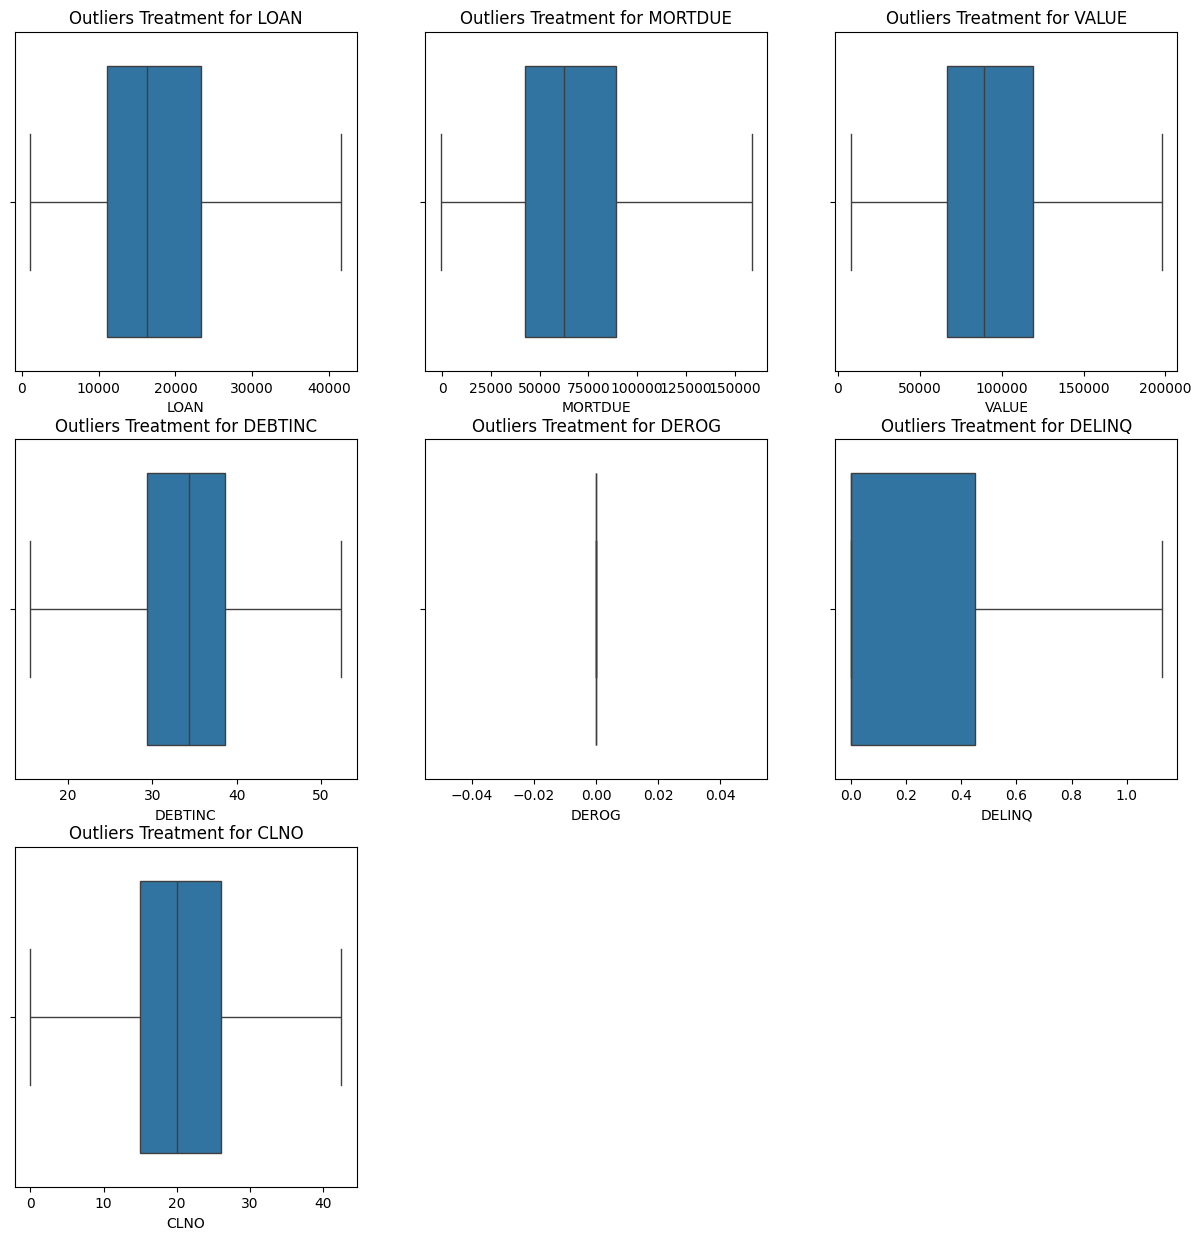

In [70]:
boxplot_custom_outliers(data, num_vars_outliers, 3)

**Conclusion:**

*   Missing values as well outliers in the dataset have been successfully treated using appropriate imputation and outlier-handling techniques
*   Dataset is now clean and ready for modeling

In [71]:
# Exporting data from data DataFrame to a CSV file
data.to_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values_no_outliers.csv', index = False)

In [72]:
# Creating DataFrame with summary for outliers
outliers_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Requires Outlier Treatment': ['Yes', 'No', 'No', 'No (optional)'],
    'Reason': ['Sensitive to extreme values and linera assumptions', 'Splits based on threshold; not affected by extreme values', 'Tree-based; ensemble averages further smooth', 'Tree-based; extreme outliers can affect learning rate tuning']
})

# Displaying table
display(outliers_summary)

,Model,Requires Outlier Treatment,Reason
0,Logistic Regression,Yes,Sensitive to extreme values and linera assumpt...
1,Decision Tree,No,Splits based on threshold; not affected by ext...
2,Random Forest,No,Tree-based; ensemble averages further smooth
3,XGBoost,No (optional),Tree-based; extreme outliers can affect learni...


## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### **Facts**

*   This is supervised binary classification problem with target feature **BAD: 0 = Default or 1 = Repaid**
*   The dataset has moderate size (**5960** rows) and includes both **numerical** and **categorical features**
*   There is **multicollinearity** between some numerical features, **MORTDUE** and **VALUE**, which can affect performance of linear models
*   Several numerical features in the dataset are skewed and contain outliers, which were treated using **IQR-Based Capping**
*   Target variable **BAD** is imbalanced, with **80:20** split between categories

### **Model Recommendation**

1.   **Gradient Boosting (e.g. XGBoost)** handles nonlinearity, missing values and interactions, has very high performance on structured/tabular data, but is more complex and slower to train, as well harder to tune
2.   **Random Forest** handles both numerical and categorical features well, it is robust for outliers and skewed distributions, handles nonlinear relationships, provides feature importance insights
3.   **Decision Tree** is easy to visualize and explain, good for spotting logic/rules, but it is prone to overfitting
4.   **Logistic Regression** is easily explained to stakeholders, fast and efficient, but assumes linear relationships and is sensitive to outliers and multicollinearity

### **Preparing Data for Modeling**

Following approach will be used for data preparation:
1.   Encoding categorical features (One-Hot/Label Encoding)
    *   One-Hot Encoding will be used for categorical features **REASON** and **JOB**
2.   Separating dependent variable **BAD** from independent variables
3.   Scaling numerical variables (only for **Logistic Regression**)

In [73]:
# Creating DataFrame with summary for data scaling
scaling_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Requires Scaling': ['Yes', 'No', 'No', 'No (optional)'],
    'Reason': ['Sensitive to feature magnitude', 'Splits based on threshold; not affected by feature scale', 'Tree-based; not affected by feature scale', 'Tree-based; does not require scaling']
})

# Displaying table
display(scaling_summary)

,Model,Requires Scaling,Reason
0,Logistic Regression,Yes,Sensitive to feature magnitude
1,Decision Tree,No,Splits based on threshold; not affected by fea...
2,Random Forest,No,Tree-based; not affected by feature scale
3,XGBoost,No (optional),Tree-based; does not require scaling


### **Model Evaluation Criterion**

**The model can make two types of wrong predictions:**

1. Predicting an applicant will default when the applicant actually repays the loan (**False Positive**)
2. Predicting an applicant will repay the loan when the applicant actually defaults (**False Negative**)

**Which case is more important?**

* **Predicting that applicant will repay the loan when the applicant actually defaults**. This is **False Negative** and it would be considered as a major miss for any loan default predictor and is hence more important case of wrong predictions. It leads to approving loans for high-risk individuals, resulting in direct financial loss.

**How to reduce this loss e.g. the need to reduce False Negatives?**
* **The financial institution would want the Recall to be maximized**, the greater the **Recall**, the higher the chances of **minimizing False Negatives**. Hence, the focus should be on increasing the **Recall (minimizing the False Negatives)** or, in other words, identifying the **True Positives** very well.

**Recommended Approach:**
*   We will **maximize Recall**
*   We will monitor **F1 Score** for balance between **Recall** and **Precision**

In [74]:
# metric_score is user-defined function used to evaluate classification model performance
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    # Computing confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Creating labels for each cell
    labels = np.array([['TN', 'FP'], ['FN', 'TP']])

    # Adding counts to labels
    counts = cm.astype(str)
    annot = np.core.defchararray.add(labels, '\n')
    annot = np.core.defchararray.add(annot, counts)

    # Setting size of a plot
    plt.figure(figsize = (8, 5))

    # Plotting the confusion matrix using sns.heatmap()
    sns.heatmap(cm, annot = annot, fmt = '', xticklabels = ['Repay', 'Default'], yticklabels = ['Repay', 'Default'])

    # Setting label for axes
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [75]:
# model_performance_classification is user-definied function used to compute different metrics to check classification model performance
# model = classifier; predictors = independent variables; target = dependent variables
def model_performance_classification(model, predictors, target):
    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Computing recall
    recall = recall_score(target, pred, average = 'macro')

    # Computing precision
    precision = precision_score(target, pred, average = 'macro')

    # Computing accuracy
    acc = accuracy_score(target, pred)

    # Creating a DataFrame df to store evaluation metrics
    df_perf = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": acc,
        },
        index = [0],
    )

    return df_perf

## **Logistic Regression**

**Logistic Regression** is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In **Logistic Regression**, we use the **Sigmoid Function** to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

**Key Facts:**
*   **Logistic Regression** is sensitive to feature magnitute, and as such requires data scaling
*   **Logistic Regression** is sensitive to extreme values and linear assumptions, and as such requires outliers treatment
*   We will import **hmeq_no_missing_values_no_outliers.csv** dataset

In [76]:
# Reading the data
# Reading hmeq_no_missing_values_no_outliers.csv from Google drive
data_logreg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values_no_outliers.csv')

# Viewing first 5 rows of the dataset
data_logreg.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.000000,39025.0,HomeImp,Other,10.50000,0.0,0.000000,94.366667,1.000000,9.0,32.959440
1,1,1300.0,70053.000000,68400.0,HomeImp,Other,7.00000,0.0,1.127172,121.833333,0.000000,14.0,40.695851
2,1,1500.0,13500.000000,16700.0,HomeImp,Other,4.00000,0.0,0.000000,149.466667,1.000000,10.0,37.286161
3,1,1500.0,67066.513937,89235.5,DebtCon,Other,7.62084,0.0,0.481524,169.496444,1.031784,20.0,39.582997
4,0,1700.0,97800.000000,112000.0,HomeImp,Office,3.00000,0.0,0.000000,93.333333,0.000000,14.0,34.370509


#### **Encoding Categorical Features**

In [77]:
# One-Hot Encoding for features: REASON, JOB
# Creating list of features
nominal_cols = ['REASON', 'JOB']

# Applying one-hot encoding
# drop_first = True prevents multicollinearity by dropping 1 dummy column per feature; prevents dummy variable trap
data_logreg_encoded = pd.get_dummies(data = data_logreg, columns = nominal_cols, drop_first = True, dtype = int)

In [78]:
# Viewing first 5 rows of the dataset
data_logreg_encoded.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.000000,39025.0,10.50000,0.0,0.000000,94.366667,1.000000,9.0,32.959440,1,0,1,0,0,0
1,1,1300.0,70053.000000,68400.0,7.00000,0.0,1.127172,121.833333,0.000000,14.0,40.695851,1,0,1,0,0,0
2,1,1500.0,13500.000000,16700.0,4.00000,0.0,0.000000,149.466667,1.000000,10.0,37.286161,1,0,1,0,0,0
3,1,1500.0,67066.513937,89235.5,7.62084,0.0,0.481524,169.496444,1.031784,20.0,39.582997,0,0,1,0,0,0
4,0,1700.0,97800.000000,112000.0,3.00000,0.0,0.000000,93.333333,0.000000,14.0,34.370509,1,1,0,0,0,0


#### **Separating Y from X**

In [79]:
# Separating dependent variable 'BAD' from independent variables
X = data_logreg_encoded.drop('BAD', axis = 1)
Y = data_logreg_encoded['BAD']

#### **Scaling the Data**

We will use StandardScaler method, which centers and scales the dataset using the z-score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

z-score of sample x is calculated as:

**z = (x - u) / s**

where u is the mean of the training samples (zero) and s is the standard deviation of the training samples.

In [80]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [81]:
# Viewing first 5 rows of the data
X_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.832283,-1.152583,-1.335526,0.212916,0.0,-0.604197,-1.006661,-0.115339,-1.297476,-0.088648,1.532421,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
1,-1.810666,0.034388,-0.672699,-0.269899,0.0,2.023524,-0.679033,-0.718592,-0.756608,1.063617,1.532421,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
2,-1.789048,-1.484558,-1.839275,-0.683741,0.0,-0.604197,-0.349417,-0.115339,-1.189302,0.555776,1.532421,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
3,-1.789048,-0.045826,-0.202559,-0.184256,0.0,0.518358,-0.110497,-0.096165,-0.107566,0.897868,-0.652562,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
4,-1.767431,0.779638,0.311107,-0.821689,0.0,-0.604197,-1.018987,-0.718592,-0.756608,0.121518,1.532421,2.299330,-0.899944,-0.521936,-0.136489,-0.182938


### **Splitting the data into train and test data subsets**

*   We will split the data in **80%** train and **20%** test data subsets

In [82]:
# Splitting the data
# random_state = 1 ensures reproducibility of data split
# stratify = Y maintains target class distribution
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 1, stratify = Y)

### **Building Logistic Regression Model**

In [83]:
# Defining Logistic Regression model
lg = LogisticRegression()

In [84]:
# Fitting Logistic Regression model
lg.fit(x_train,y_train)

LogisticRegression()

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      3817
           1       0.64      0.23      0.34       951

    accuracy                           0.82      4768
   macro avg       0.74      0.60      0.62      4768
weighted avg       0.80      0.82      0.79      4768



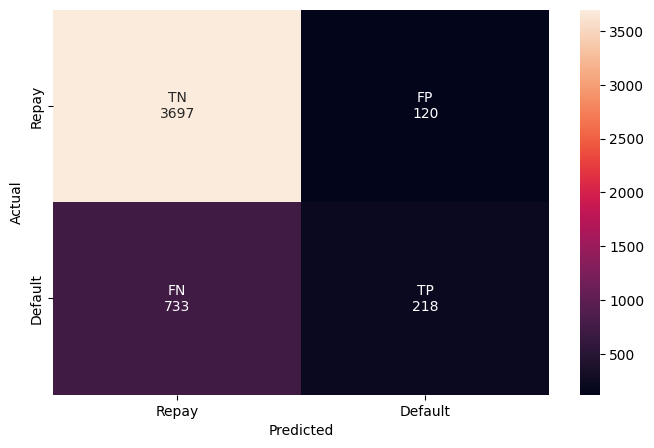

In [85]:
# Checking performance on the train data
y_train_pred_lg = lg.predict(x_train)

metrics_score(y_train, y_train_pred_lg)

**Observations:**

*   Model performance per class indicates that there is an imbalance
*   **Recall** for **Class 0** is **97%**, while for **Class 1** is **23%**, which shows clear imbalance
*   **False Negatives** are very high **733**
*   Model misses **77%** of actual defaults on train dataset

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       954
           1       0.57      0.18      0.27       238

    accuracy                           0.81      1192
   macro avg       0.70      0.57      0.58      1192
weighted avg       0.77      0.81      0.77      1192



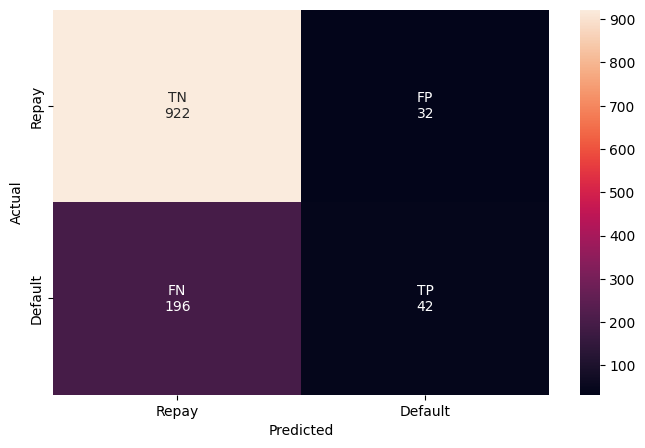

In [86]:
# Checking performance on the test data
y_test_pred_lg = lg.predict(x_test)

metrics_score(y_test, y_test_pred_lg)

In [87]:
lg_test = model_performance_classification(lg, x_test, y_test)
lg_test

,Precision,Recall,Accuracy
0,0.696127,0.571464,0.808725


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **82%**
    *   **Class 1**: **Precision** = **57%**
*   **Recall**:
    *   **Class 0**: **Recall** = **97%**
    *   **Class 1**: **Recall** = **18%**
*   **F1-score**:
    *   **Class 0**: **Recall** = **89%**
    *   **Class 1**: **Recall** = **27%**
*   Although overall **Accuracy** is high, this comes at the cost of failing to catch applicants who will default
*   Model misses **82%** of actual defaults of test dataset
*   Model underperforms on identifying defaulters (**Class 1**), likely due to class imbalance and model limitations

### **Checking Coefficients**

In **Logistic Regression** cofficients represent **log odds** change in probability of the positive class (**Class 1 = Loan Default**).
*   A **positive coefficient** implies that higher values of the feature increase likelihood of default
*   A **negative coefficient** implies that higher values of the feature decrease likelihood of default

In [88]:
# Checking the coefficients of Logistic Regression
cols_lg = X.columns
coefs_lg = lg.coef_

pd.DataFrame(coefs_lg, columns = cols_lg).T.sort_values(by = 0, ascending = False)

,0
DELINQ,0.705523
NINQ,0.266200
DEBTINC,0.241539
JOB_Sales,0.138765
REASON_HomeImp,0.123217
VALUE,0.116734
JOB_Self,0.100408
DEROG,0.000000
JOB_ProfExe,-0.035641
JOB_Other,-0.058066


**Observations:**

*   More deliquencies increase risk of default
*   More recent credit inquiries are associated with higher risk of default
*   Higher debt-to-income ration increases risk of default
*   Sales jobs slightly increase risk of default, probably due to income variability
*   Loans for home improvement slightly increase risk of default vs debt consolidation
*   Longer job tenure reduces risk of default
*   Longer credit history reduces risk of default
*   Office jobs may be more stable and indicate low risk of default
*   Higher mortgage due is associated with lower risk of default
*   **DEROG** is not contributing to the model and possible reason for that is its correlation with **DELINQ**

The coefficients of the **Logistic Regression** model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

**Odds Ratio (OR)** is the exponential value of **Logistic Regression** coefficients. It tells how much odds of the target class (**Class 1 = Loan Default**) change with 1-unit increase in the predictor.
*   **OR > 1:** Increases odds of default
*   **OR < 1:** Decreases odds of default
*   **OR = 1:** No effects

In [89]:
# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
DELINQ,2.024906
NINQ,1.304995
DEBTINC,1.273207
JOB_Sales,1.148854
REASON_HomeImp,1.131130
VALUE,1.123821
JOB_Self,1.105622
DEROG,1.000000
JOB_ProfExe,0.964987
JOB_Other,0.943587


**Observations:**

*   Each additional deliquency **doubles** the odds of default, which implies that **DELINQ** is the **strongest positive predictor**
*   More recent credit inquiry has **30%** increase of odds of default
*   Sales jobs are associated with **15%** higher odds
*   Loans for home improvement has **13%** higher odds than **Debt Consolidation**
*   Each unit increase in credit age reduces odds of default by **36%**, which implies that this is **strongest protective factor**
*   Higher mortgage due lowers risk by **19%**, which could probably be due to better credit backing
*   Office jobs are reducing odds of default
*   Larger loans slightly reduce odds of default
*   Longer job tenure is protective
*   **DEROG** shows no effect, due to multicollinearity

### **The Precision-Recall Curve for Logistic Regression**

We will get predicted probabilities for each class from the **Logistic Regression** model.

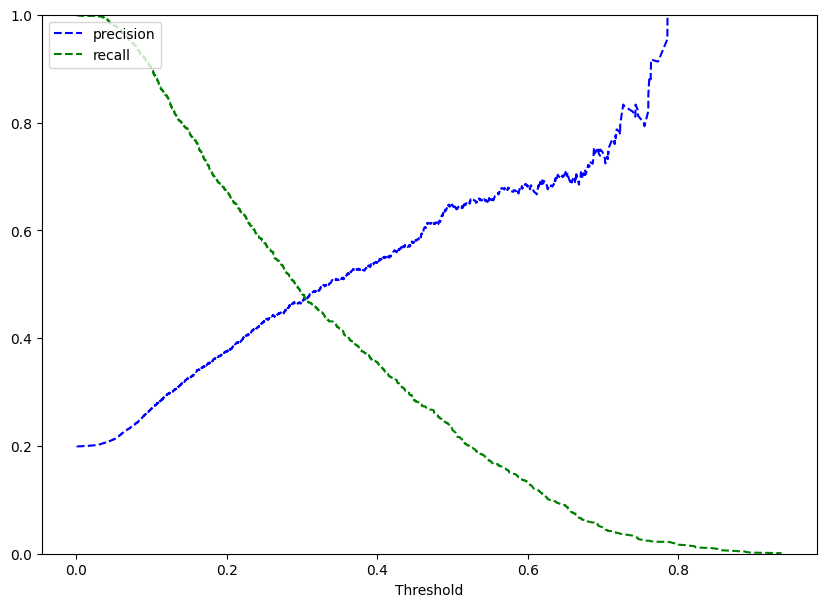

In [90]:
# predict_proba returns probabilities for [class 0, class 1]
y_scores_lg = lg.predict_proba(x_train)

# Computing Precision, Recall and thresholds for different probability cut-offs
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Setting size of a plot
plt.figure(figsize = (10, 7))

# Plotting Precision values against threshold
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

# Plotting Recall values against threshold
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

# Setting x-axis label
plt.xlabel('Threshold')

# Adding legend to the upper-left corner
plt.legend(loc = 'upper left')

# Setting y-axis limits
plt.ylim([0, 1])

plt.show()

In [91]:
# Computing absolute difference between Precision and Recall
diff = np.abs(precisions_lg[:-1] - recalls_lg[:-1])

# Finding index where difference is smallest
best_idx = np.argmin(diff)

# Getting the threshold for that index
best_threshold = thresholds_lg[best_idx]

# Prinitng best threshold
print(f'Best threshold is: {best_threshold}')

Best threshold is: 0.3047150765090751


**Observations:**

*   **Precision** and **Recall** are balanced for a threshold of **~0.31**
*   This indicates that both **Precision** and **Recall** are relatively high and balanced

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3817
           1       0.48      0.47      0.47       951

    accuracy                           0.79      4768
   macro avg       0.67      0.67      0.67      4768
weighted avg       0.79      0.79      0.79      4768



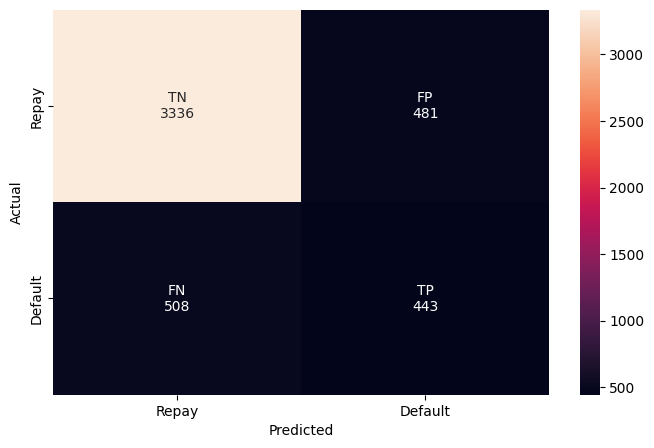

In [92]:
# Checking performance on the train data
optimal_threshold = .31

y_train_pred_lg = lg.predict_proba(x_train)

metrics_score(y_train, y_train_pred_lg[:, 1] > optimal_threshold)

**Observations:**

*   Adjusting the threshold to **0.31** significantly improved model performance for detecting defaulters (**Class 1**)
*   **False Negatives** dropped from **733** to **508**, which means that more actual defaulters are correctly identified
*   **Tradeoff** for increasing **Recall**: There is slight increase in **False Positives**
*   There is much better balance between both classes, making the model more reliable for default prediction

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       954
           1       0.50      0.45      0.48       238

    accuracy                           0.80      1192
   macro avg       0.69      0.67      0.68      1192
weighted avg       0.79      0.80      0.80      1192



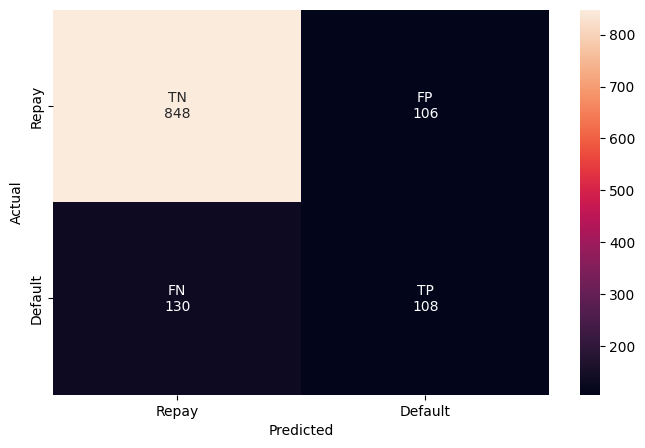

In [93]:
# Checking performance on the test data
optimal_threshold1 = .31

y_test_pred_lg = lg.predict_proba(x_test)

metrics_score(y_test, y_test_pred_lg[:, 1] > optimal_threshold1)

In [94]:
lg_test = model_performance_classification(lg, x_test, y_test)
lg_test

,Precision,Recall,Accuracy
0,0.696127,0.571464,0.808725


**Observations:**

*   **Balanced Performance:** Model is giving similar performance on both, train and test dataset
*   There is an improved performance of **Recall** for **Class 1**, from **18%** to **45%**
*  **Model Generalization:** Model generalizes similarly on test as on train data, which is good sign of robustness
*   **Tradeoff:** Improved **Recall** comes at cost of lower **Precision** for **Class 1** and higher **False Positives** for **Class 0**

## **Decision Tree Classifier**

**Key Facts:**
*   **Decision Tree** splits data based on feature threshold and not based on distance, and this is why scaling does not affect order of the data
*   Trees do not assume normality, homoscedasticity, or linear relationships, which makes them ideal for skewed distributions and extreme values
*   We will use **hmeq_no_missing_values.csv** dataset

In [95]:
# Reading the data
# Reading hmeq_no_missing_values.csv from Google drive
data_dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values.csv')

# Viewing first 5 rows of the dataset
data_dt.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.000000,39025.0,HomeImp,Other,10.50000,0.00000,0.000000,94.366667,1.000000,9.0,32.959440
1,1,1300.0,70053.000000,68400.0,HomeImp,Other,7.00000,0.00000,2.000000,121.833333,0.000000,14.0,40.695851
2,1,1500.0,13500.000000,16700.0,HomeImp,Other,4.00000,0.00000,0.000000,149.466667,1.000000,10.0,37.286161
3,1,1500.0,67066.513937,89235.5,DebtCon,Other,7.62084,0.23877,0.481524,169.496444,1.031784,20.0,39.582997
4,0,1700.0,97800.000000,112000.0,HomeImp,Office,3.00000,0.00000,0.000000,93.333333,0.000000,14.0,34.370509


### **Encoding Categorical Features**

In [96]:
# One-Hot Encoding for features: REASON, JOB
# Creating list of features
nominal_cols = ['REASON', 'JOB']

# Applying One-Hot Encoding
# drop_first = True prevents multicollinearity by dropping 1 dummy column per feature; prevents dummy variable trap
data_dt_encoded = pd.get_dummies(data = data_dt, columns = nominal_cols, drop_first = True, dtype = int)

In [97]:
# Viewing first 5 rows of the dataset
data_dt_encoded.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.000000,39025.0,10.50000,0.00000,0.000000,94.366667,1.000000,9.0,32.959440,1,0,1,0,0,0
1,1,1300.0,70053.000000,68400.0,7.00000,0.00000,2.000000,121.833333,0.000000,14.0,40.695851,1,0,1,0,0,0
2,1,1500.0,13500.000000,16700.0,4.00000,0.00000,0.000000,149.466667,1.000000,10.0,37.286161,1,0,1,0,0,0
3,1,1500.0,67066.513937,89235.5,7.62084,0.23877,0.481524,169.496444,1.031784,20.0,39.582997,0,0,1,0,0,0
4,0,1700.0,97800.000000,112000.0,3.00000,0.00000,0.000000,93.333333,0.000000,14.0,34.370509,1,1,0,0,0,0


In [98]:
# Exporting data from data DataFrame to a CSV file
data_dt_encoded.to_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values_encoded.csv', index = False)

### **Separating Y from X**

In [99]:
# Separating dependent variable BAD from independent variables
X = data_dt_encoded.drop('BAD', axis = 1)
Y = data_dt_encoded['BAD']

### **Splitting the data into train and test data subsets**

*   We will split the data in **80%** train and **20%** test data subsets

In [100]:
# Splitting the data
# random_state = 1 ensures reproducibility of data split
# stratify = Y maintains target class distribution
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

### **Building Decision Tree Classifier**

*   We will build our model using the **DecisionTreeClassifier function**
*   **max_depth** and **min_samples_leaf** are hyperparameters of the decision tree classifier that will be used for tuning the model

In [101]:
# Building Decision Tree classifier
# random_state = 1 is locking the randomness, so the tree structure is consistent every time code is executed; This will result in training data always producing same decision tree
dt = DecisionTreeClassifier(random_state = 1)

In [102]:
# Fitting decision tree classifier
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



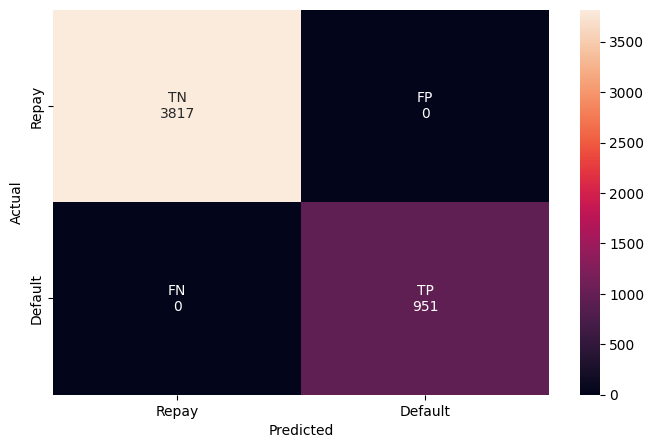

In [103]:
# Checking performance on the train data
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:**

*   There is **100% score** for all metrics on train dataset, which indicates that model performs very good on train data
*   **100% score** for all metrics on train data is usually an indicator of **overfitting** and for this reason we need to check the performance of a model on test data

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       954
           1       0.71      0.70      0.70       238

    accuracy                           0.88      1192
   macro avg       0.82      0.81      0.81      1192
weighted avg       0.88      0.88      0.88      1192



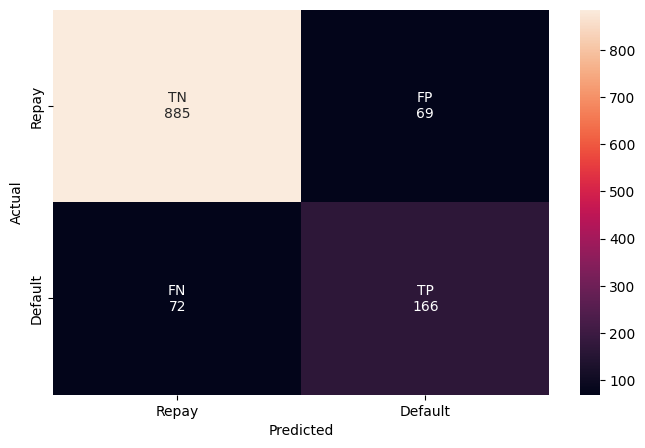

In [104]:
# Checking performance on the test data
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [105]:
dt_test = model_performance_classification(dt, x_test, y_test)
dt_test

,Precision,Recall,Accuracy
0,0.815574,0.812576,0.881711


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **92%**
    *   **Class 1**: **Precision** = **71%**
*   **Recall**:
    *   **Class 0**: **Recall** = **93%**
    *   **Class 1**: **Recall** = **70%**
*   **F1-score**:
    *   **Class 0**: **F1-score** = **93%**
    *   **Class 1**: **F1-score** = **70%**
*   The **Decission Tree Classifier** works well on train data, but not so well on test data, meaning that model is **overfitting the train data**
*   **False Negatives:** There is **30%** chance that actual defaulters are missed, which increases the risk for financial institutions to lose money
*   As we aim to minimize **False Negatives**, we will be focusing on maximizing **Recall**

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### **Using GridSearch for Hyperparameter Tuning**
*   Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use GridSearch to perform hyperparameter tuning
*   **GridSearch is a tuning technique that attempts to compute the optimum values of hyperparameters**
*   **It is an exhaustive search** that is performed on the specific parameter values of a model
*   The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid

**Decision Tree Hyperparameters**

*   **Criterion**
    *   **gini** or **entropy**
    *   The function is to measure the quality of a split. Supported criteria are **gini** for the Gini impurity and **entropy** for the information gain
*   **max_depth**
    *   The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than **min_samples_split** samples
*   **min_samples_leaf**
    *   The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least **min_samples_leaf** training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

#### **Model Tuning with GridSearch**

To tell the model that **1 is an important class** we will use **class_weight** hyperparameter with values **{0: 0.2, 1: 0.8}** which is the oppposite of the imbalance in original data

In [106]:
# Choosing the classifier type
# To tell the model that 1 is an important class, we will use class_weight hyperparameter with values {0: 0.2, 1: 0.8}, which is the oppposite of the imbalance in original data
dt_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
dt_parameters = {'max_depth': np.arange(2, 7),
                 'criterion': ['gini', 'entropy'],
                 'min_samples_leaf': [5, 10, 20, 25]
                }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the GridSearch
gridCV = GridSearchCV(dt_estimator, dt_parameters, scoring = scorer, cv = 10)

# Fitting the GridSearch on the train data
gridCV = gridCV.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
dt_estimator = gridCV.best_estimator_

# Fitting the best estimator to the train data
dt_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=np.int64(5), min_samples_leaf=25,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      3817
           1       0.36      0.84      0.50       951

    accuracy                           0.66      4768
   macro avg       0.65      0.73      0.62      4768
weighted avg       0.82      0.66      0.70      4768



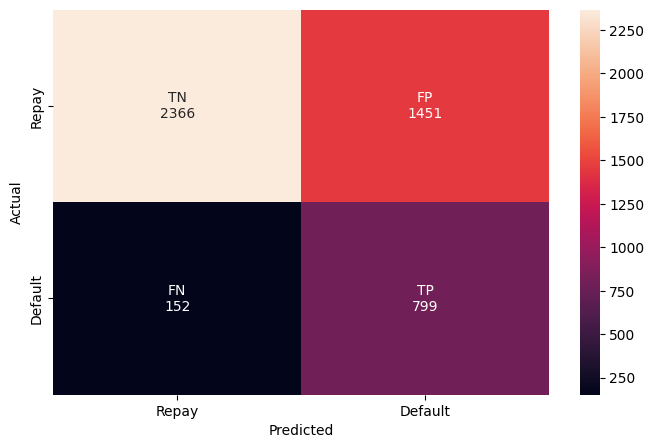

In [107]:
# Checking performance on the train data
y_train_pred_dt = dt_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **62%**
    *   **Class 1**: **Recall** = **84%**
*   If we compare the performance of this model and a model with default hyperparameters values, we can see that model performance dropped
*   **Recall** dropped from **100%** to **84%** for **Class 1**, which makes sense since we are trying to reduce overfitting
*   Model has higher **Recall** for **Class 1**, which means that model is effective in identyfing defaulters, however **Precision** is very low **36%** and **F1-Score** is **50%**
*   A large number of applicants who will repay the loan are incorrectly predicted as defaulters
*   **Tradeoff:** Optimizing for high **Recall** in **Class 1** leads to lower **Precision**

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       954
           1       0.33      0.76      0.46       238

    accuracy                           0.65      1192
   macro avg       0.62      0.69      0.60      1192
weighted avg       0.80      0.65      0.68      1192



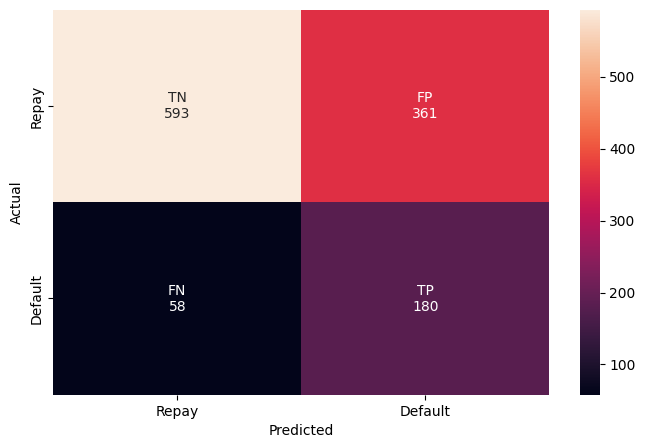

In [108]:
# Checking performance on the test data
y_test_pred_dt = dt_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [109]:
dt_tuned_test = model_performance_classification(dt_estimator, x_test, y_test)
dt_tuned_test

,Precision,Recall,Accuracy
0,0.621812,0.688948,0.64849


**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **62%**
    *   **Class 1**: **Recall** = **76%**
*   Model is biased towards capturing defaulters, but struggles to be precise in those predictions
*   Very low **Precision (33%)** for **Class 1**, which indicates that model still makes many false default predictions
*   **Precision** for **Class 0** is **91%**, with **Recall** being **62%**
*   Model captures training data patterns well, but generalizes poorly on unseen test data
*   **Tradeoff:** Optimizing for high **Recall** in **Class 1** leads to lower **Precision**

### **Decision Tree Visualization**

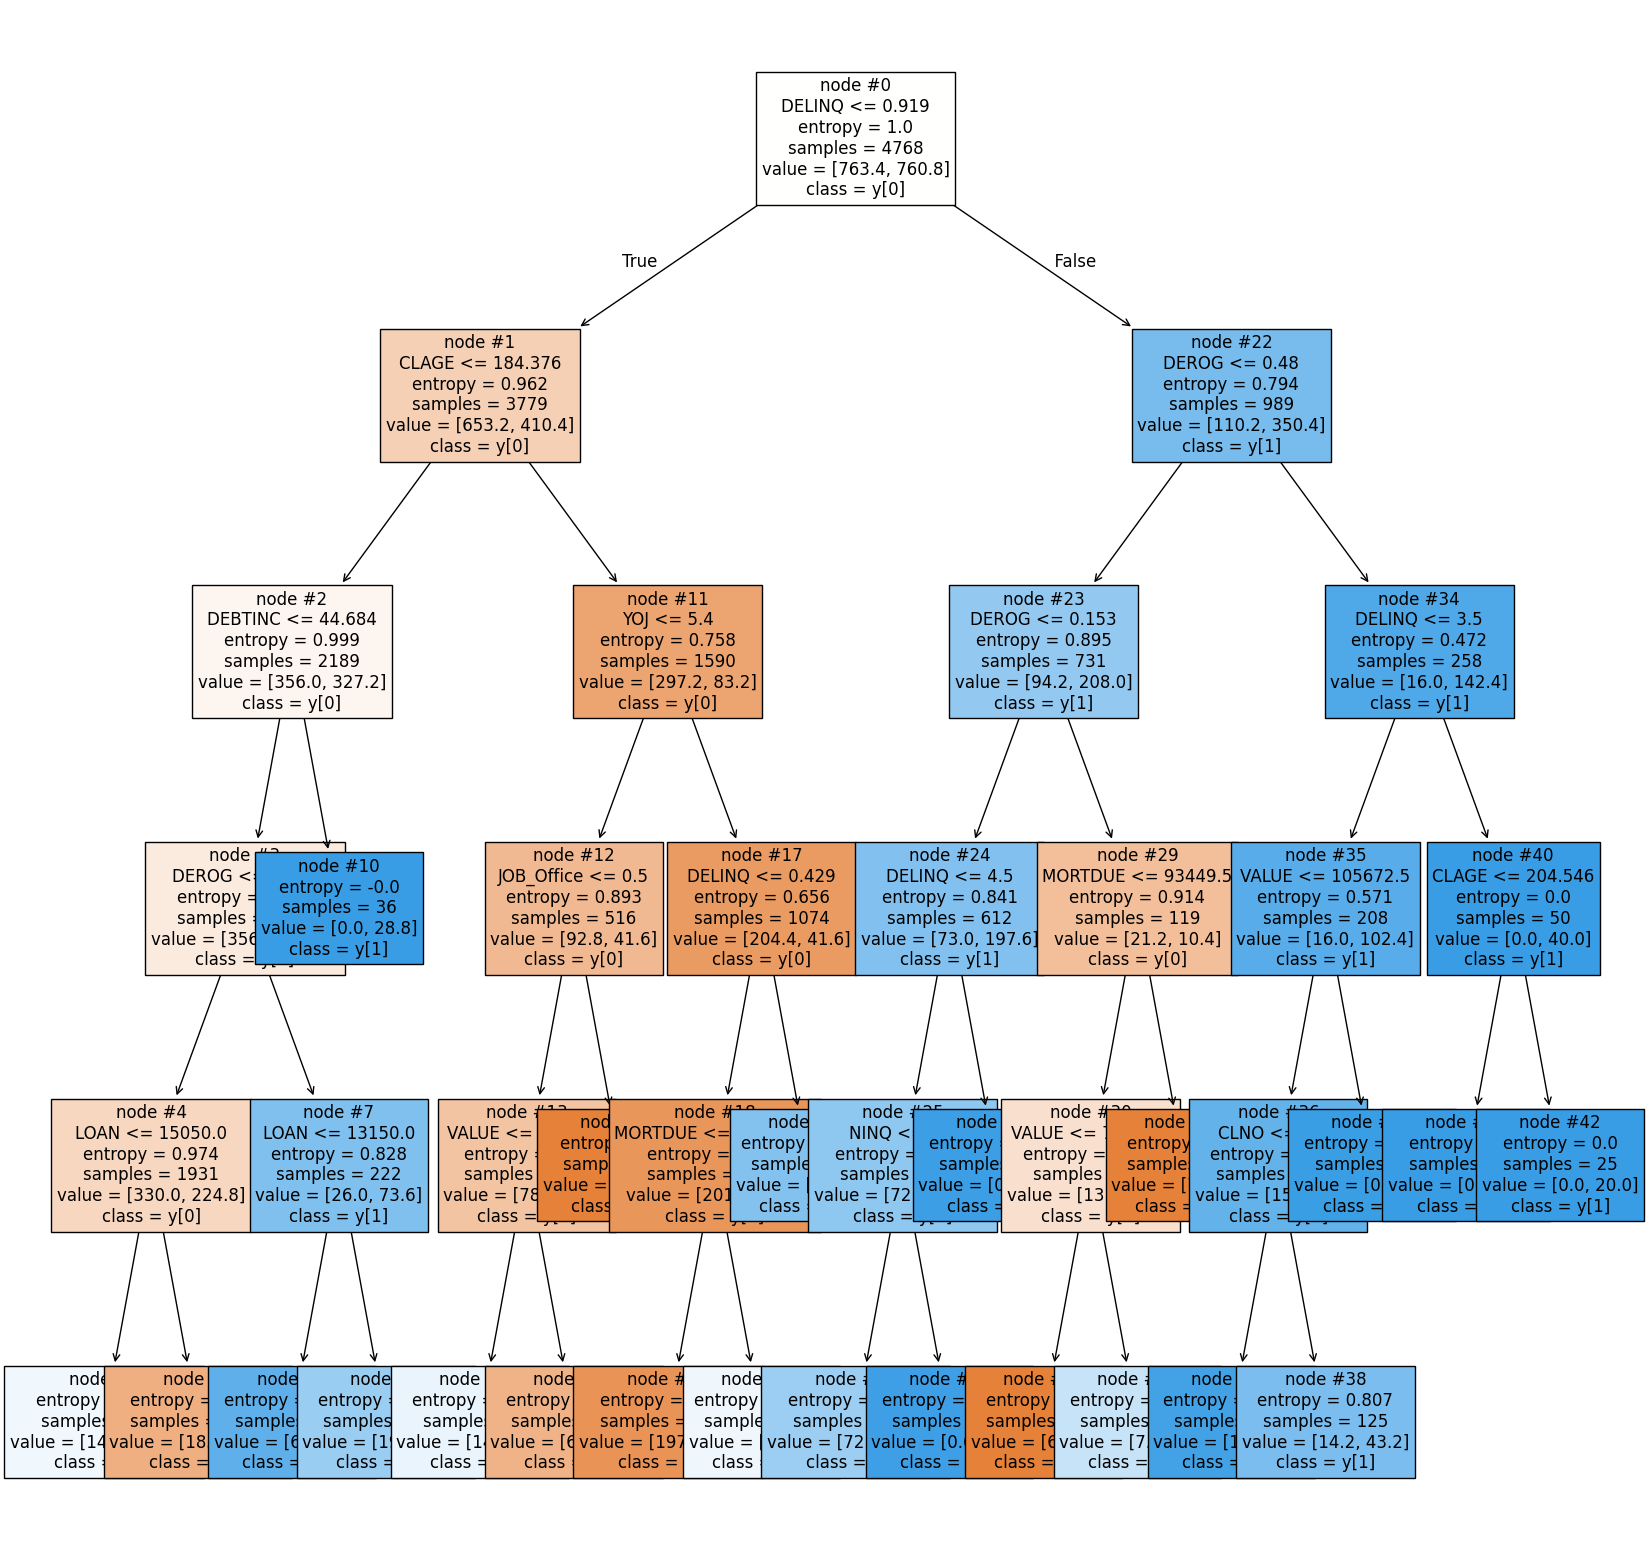

In [110]:
# Visualizing the decision tree
features = list(X.columns)

# Setting size of a plot
plt.figure(figsize = (20, 20))

# Plotting the decision tree
tree.plot_tree(dt_estimator, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations:**

*   The root node splits on **DELINQ** feature, which indicates that **DELINQ** is the most significant variable for loan default prediction
*   Splits are based on **entropy**, which aims to reduce impurity at each step
*   Nodes, such as **#10, #40, #42** show **entropy = 0.0**, which means that they are **pure leaf nodes**
*   The tree revelas meaningful rule-based logic
    * **if DELINQ <= 0.919 abd CLAGE > 184 and YOJ <= 5.4**
      
      **then applicant = repayer**

**Note:**

*   Blue leaves represent default, **class = y[1]**, while orange leaves represent repaid, **class = y[0]**
*   The more the number of observations in a leaf, the darker its color gets
*   Decision trees try to minimize entropy at each split, for predictions to be more precise
  *   **Entropy = 0** -> pure, perfect classification
  *   **Entropy = 1** -> impure, bad split(50/50), max uncertainty

### **Plotting Feature Importance**

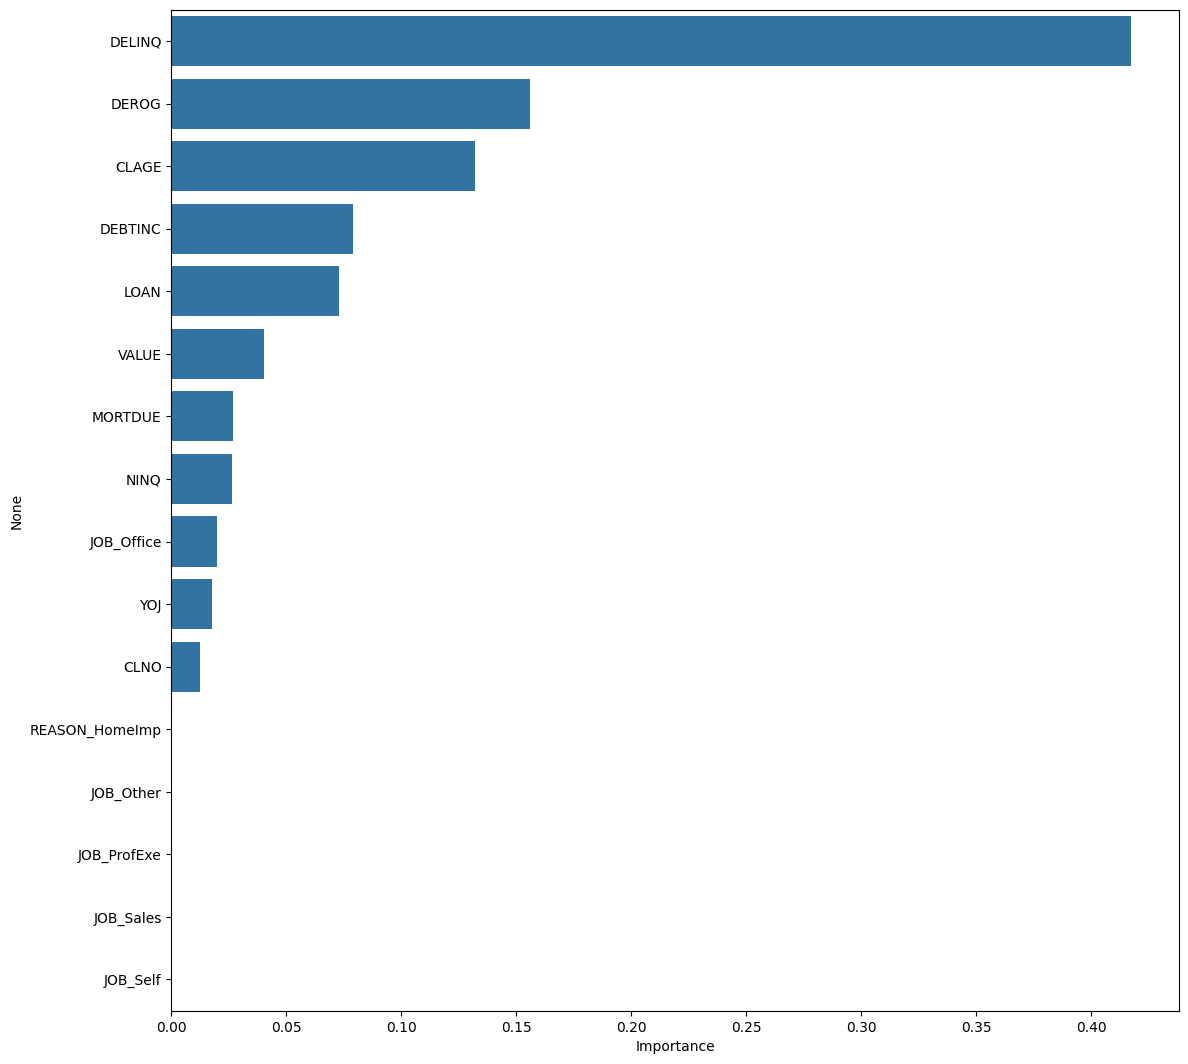

In [111]:
# Plotting the feature importance
importances = dt_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

plt.show()

**Observations:**

*   According to the Decission Tree Classifier **DELINQ** and **DEROG** are the most important features, followed by **CLAGE** and **DEBTINC**
*   This suggests that prediction relies heavily on past credit behavior of the applicant, **DELINQ** and **DEROG**
*   **LOAN, VALUE, MORTDUE, NINQ, JOB_Office, YOJ, CLNO** show moderate to minor predictive power

###**Decision Tree Pruning [Final Submission]**

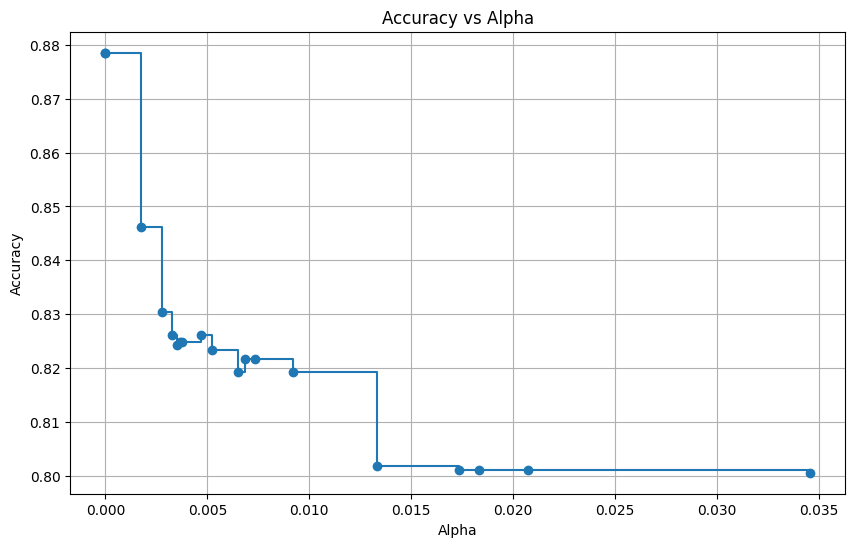

Best alpha is: 0.0


DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)

In [112]:
# Getting effective alphas and impurities via cost-complexity pruning path
path = dt_estimator.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Removing maximum alpha (prunes everything)
ccp_alphas = ccp_alphas[:-1]

# Training models for each alpha
models = []
for alpha in ccp_alphas:
  dt_clf = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha)
  dt_clf.fit(x_train, y_train)
  models.append(dt_clf)

# Cross-validating each model to evaluate performance
train_scores = [np.mean(cross_val_score(model, x_train, y_train, cv = 5)) for model in models]

# Plotting alpha vs accuracy
plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas, train_scores, marker = 'o', drawstyle = 'steps-post')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha')
plt.grid(True)
plt.show()

# Choosing best alpha = highest cross-validation accuracy
best_alpha = ccp_alphas[np.argmax(train_scores)]
print(f'Best alpha is: {best_alpha}')

# Fitting final pruned model
pruned_tree = DecisionTreeClassifier(random_state = 1, ccp_alpha = best_alpha)
pruned_tree.fit(x_train, y_train)

**Observations:**

*   The best performing **alpha**, based on cross-validation, is **0.0**, which suggests that pruning did not help improve performance on training folds
*   Tree performs best with **no pruning (alpha = 0.0)**
*   **Recommendation:** Since the highest accuracy is achieved at **alpha = 0.0**, pruning does not improve generalization and it can lead to **underfitting**.



## **Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

*   We will build our model using the **RandomForestClassifier function**
*   **Random Forest** is a bagging algorithm where the base models are **Decision Trees.** Samples are taken from the train data and on each sample, a decision tree makes a prediction
*   The results from all the decision trees are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems)
*   **n_estimators**, **min_samples_leaf** and **max_features** are hyperparameters of the random forest classifier that will be used for tuning the model

In [113]:
# Reading the data
# Reading hmeq_no_missing_values.csv from Google drive
data_rf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values_encoded.csv')

# Viewing first 5 rows of the dataset
data_rf.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.000000,39025.0,10.50000,0.00000,0.000000,94.366667,1.000000,9.0,32.959440,1,0,1,0,0,0
1,1,1300.0,70053.000000,68400.0,7.00000,0.00000,2.000000,121.833333,0.000000,14.0,40.695851,1,0,1,0,0,0
2,1,1500.0,13500.000000,16700.0,4.00000,0.00000,0.000000,149.466667,1.000000,10.0,37.286161,1,0,1,0,0,0
3,1,1500.0,67066.513937,89235.5,7.62084,0.23877,0.481524,169.496444,1.031784,20.0,39.582997,0,0,1,0,0,0
4,0,1700.0,97800.000000,112000.0,3.00000,0.00000,0.000000,93.333333,0.000000,14.0,34.370509,1,1,0,0,0,0


### **Separating Y from X**

In [114]:
# Separating dependent variable BAD from independent variables
X = data_rf.drop('BAD', axis = 1)
Y = data_rf['BAD']

### **Splitting the data into train and test data subsets**

*   We will split the data in **80%** train and **20%** test data subsets

In [115]:
# Splitting the data
# random_state = 1 ensures reproducibility of data split
# stratify = Y maintains target class distribution
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

### **Building Random Forest Classifier**

In [116]:
# Building Random Forest
# We will use entropy, since after tuning Decision Tree hyperparameters, we know that entropy was chosen as better one over gini
rf = RandomForestClassifier(criterion = 'entropy', random_state = 1)

In [117]:
# Fitting Random Forest classifier
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



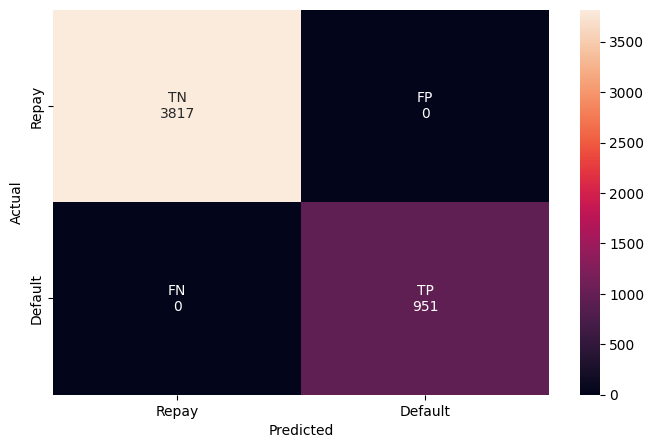

In [118]:
# Checking performance on the train data
y_train_pred_rf = rf.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

**Observations:**

*   There is **100% score** for all metrics on train dataset, which indicates that model performs very good on train data
*   **100% score** for all metrics on train data may be an indicator of **overfitting** and for this reason we need to check the performance of a model on test data

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       954
           1       0.96      0.60      0.74       238

    accuracy                           0.92      1192
   macro avg       0.93      0.80      0.84      1192
weighted avg       0.92      0.92      0.91      1192



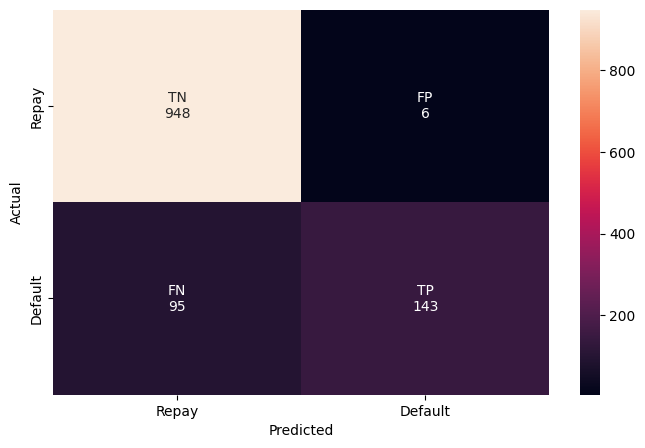

In [119]:
# Checking performance on the test data
y_test_pred_rf = rf.predict(x_test)

metrics_score(y_test, y_test_pred_rf)

In [120]:
rf_test = model_performance_classification(rf, x_test, y_test)
rf_test

,Precision,Recall,Accuracy
0,0.934324,0.797276,0.915268


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **91%**
    *   **Class 1**: **Precision** = **96%**
*   **Recall**:
    *   **Class 0**: **Recall** = **99%**
    *   **Class 1**: **Recall** = **60%**
*   **F1-score**:
    *   **Class 0**: **F1-score** = **95%**
    *   **Class 1**: **F1-score** = **74%**
*   The **Random Forest Classifier** works well on train data, and has very good performance on test data, apart from **Recall**, which can be an indicator of **overfitting** the train data
*   As our goal is to minimize **False Negatives**, which means to maximize **Recall**, we will proceed with hyperparameter tuning
*   Model is slightly biased towards predicting **Repaid (Class 0)**, as **95 False Negatives** were classified as **Repay**

### **Random Forest Classifier Hyperparameter Tuning**

**Random Forest Hyperparameters:**

*   **n_estimators**: The number of trees in the forest
*   **min_samples_split**: The minimum number of samples required to split an internal node
*   **min_samples_leaf**: The minimum number of samples required to be at a leaf node
*   **max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split
  *   If “auto”, then max_features=sqrt(n_features)
  *   If “sqrt”, then max_features=sqrt(n_features) (same as “auto”)
  *   If “log2”, then max_features=log2(n_features)
  *   If None, then max_features=n_features

#### **Model Tuning with GridSearch**

*   To tell the model that **1 is an important class** we will use **class_weight** hyperparameter with values **{0: 0.2, 1: 0.8}** which is the oppposite of the imbalance in original data
*   **Note:** We will not tune hyperparameter **criterion**, since after tuning **Decision Tree** hyperparameters, we know that **entropy** was chosen as better one over **gini**

In [121]:
# Choosing the classifier type
# To tell the model that 1 is an important class, we will use class_weight hyperparameter with values {0: 0.2, 1: 0.8}, which is the oppposite of the imbalance in original data
rf_estimator = RandomForestClassifier(criterion = 'entropy', class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
rf_parameters = {
                 "n_estimators": [100, 250, 500],
                 "min_samples_leaf": np.arange(1, 4, 1),
                 "max_features": [0.7, 0.9, 'auto']
                 }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the GridSearch
gridCV = GridSearchCV(rf_estimator, rf_parameters, scoring = scorer, cv = 5)

# Fitting the GridSearch on the train data
gridCV = gridCV.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
rf_estimator = gridCV.best_estimator_

# Fitting the best estimator to the train data
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_features=0.7, min_samples_leaf=np.int64(3),
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       0.99      0.99      0.99       951

    accuracy                           1.00      4768
   macro avg       0.99      0.99      0.99      4768
weighted avg       1.00      1.00      1.00      4768



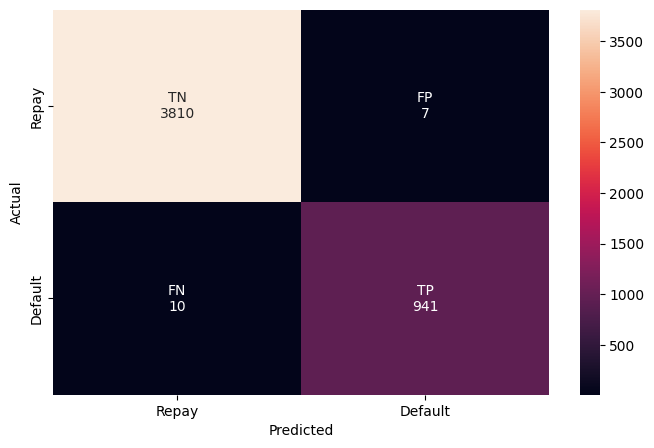

In [122]:
# Checking performance on the train data
y_train_pred_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **100%**
    *   **Class 1**: **Recall** = **99%**
*   If we compare performance of this model with a model with default hyperparameters values, we can see that model performance is still very high on test dataset
*   Model fits training data perfectly, which is a potential indicator of possible **overfitting**

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       954
           1       0.89      0.66      0.76       238

    accuracy                           0.92      1192
   macro avg       0.91      0.82      0.85      1192
weighted avg       0.91      0.92      0.91      1192



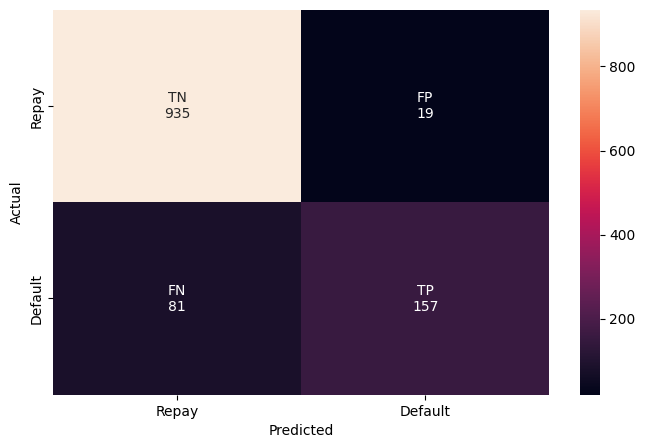

In [123]:
# Checking performance on the test data
y_test_pred_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_rf)

In [124]:
rf_tuned_test = model_performance_classification(rf_estimator, x_test, y_test)
rf_tuned_test

,Precision,Recall,Accuracy
0,0.906161,0.819874,0.916107


**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **98%**
    *   **Class 1**: **Recall** = **66%**
*   Overall performance of a model on test data is very good, especially for repayment prediction **Class 0**
*   **Recall** for **Default class (Class 1)** is **66%**, which indicates that model misses to predict **1 in 3** defaulters
*   Model still has signs of **overfitting**, even the training performance is flawless, but generalization suffers slightly on defaults

### **Plotting Feature Importance**

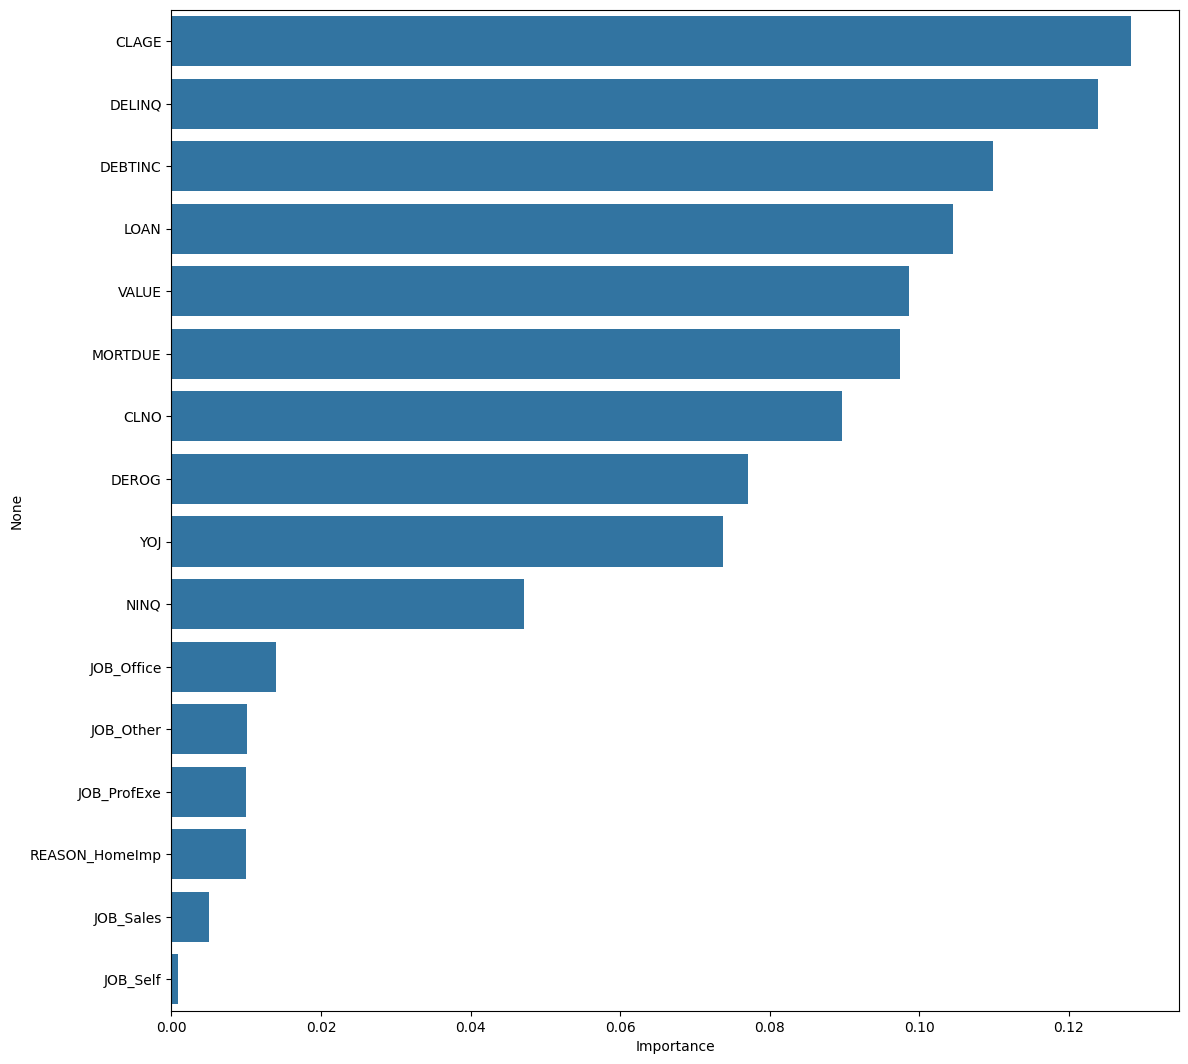

In [125]:
# Plotting the feature importance
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df1 = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df1.Importance, y = importance_df1.index)

plt.show()

**Observations:**

*   According to the **Random Forest** Classifier **DELINQ** and **CLAGE** are the most important features, followed by **DEBTINC** and **LOAN**
*   **MORTDUE, CLNO, VALUE, NINQ, YOJ** show significant predictive power

## **XGBoost Classifier**

**XGBoost** stands for **Extreme Gradient Boosting**.
**XGBoost** is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [126]:
# Reading the data
# Reading hmeq_no_missing_values.csv from Google drive
data_xgb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/3 Capstone Project/hmeq_no_missing_values_encoded.csv')

# Viewing first 5 rows of the dataset
data_xgb.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.000000,39025.0,10.50000,0.00000,0.000000,94.366667,1.000000,9.0,32.959440,1,0,1,0,0,0
1,1,1300.0,70053.000000,68400.0,7.00000,0.00000,2.000000,121.833333,0.000000,14.0,40.695851,1,0,1,0,0,0
2,1,1500.0,13500.000000,16700.0,4.00000,0.00000,0.000000,149.466667,1.000000,10.0,37.286161,1,0,1,0,0,0
3,1,1500.0,67066.513937,89235.5,7.62084,0.23877,0.481524,169.496444,1.031784,20.0,39.582997,0,0,1,0,0,0
4,0,1700.0,97800.000000,112000.0,3.00000,0.00000,0.000000,93.333333,0.000000,14.0,34.370509,1,1,0,0,0,0


### **Separating Y from X**

In [127]:
# Separating dependent variable 'BAD' from independent variables
X = data_xgb.drop('BAD', axis = 1)
Y = data_xgb['BAD']

### **Splitting the data into train and test data subsets**

*   We will split the data in **80%** train and **20%** test data subsets

In [128]:
# Splitting the data
# random_state = 1 ensures reproducibility of data split
# stratify = Y maintains target class distribution
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

### **Building XGBoost Classifier**

In [129]:
# Building XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

In [130]:
# Fitting XGBoost Classifier
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      0.99      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



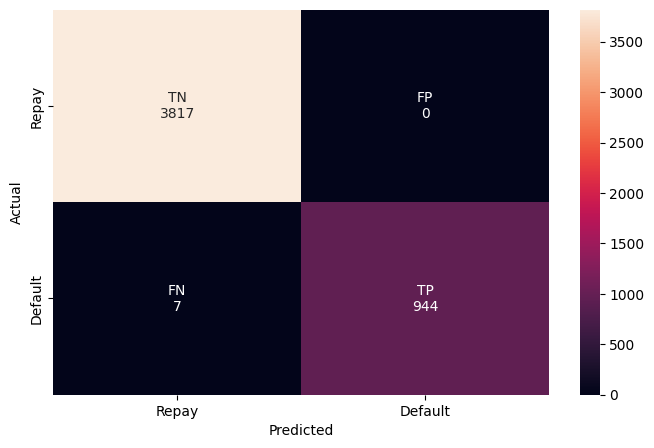

In [131]:
# Checking performance on the train data
y_train_pred_xgb = xgb.predict(x_train)

metrics_score(y_train, y_train_pred_xgb)

**Observations:**

*   There is **100% score** for all metrics on train dataset, with **Recall** for **Class 1** being **99%**, which indicates that model performs very good on train data
*   **100% score** for all metrics on train data may be an indicator of **overfitting** and for this reason we need to check the performance of a model on test data

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       954
           1       0.97      0.64      0.77       238

    accuracy                           0.92      1192
   macro avg       0.94      0.82      0.86      1192
weighted avg       0.93      0.92      0.92      1192



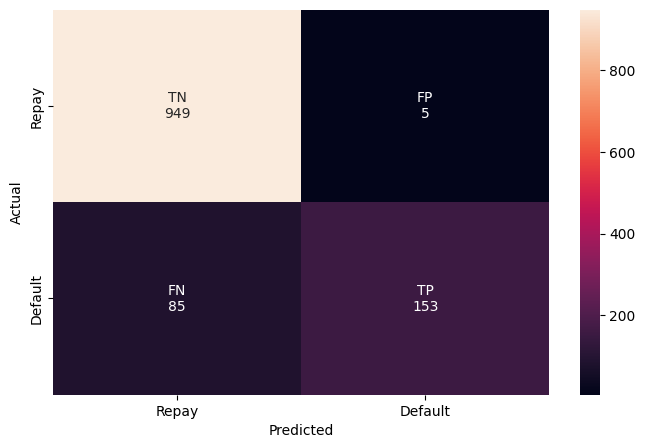

In [132]:
# Checking performance on the test data
y_test_pred_xgb = xgb.predict(x_test)

metrics_score(y_test, y_test_pred_xgb)

In [133]:
xgb_test = model_performance_classification(xgb, x_test, y_test)
xgb_test

,Precision,Recall,Accuracy
0,0.943075,0.818808,0.924497


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **92%**
    *   **Class 1**: **Precision** = **97%**
*   **Recall**:
    *   **Class 0**: **Recall** = **99%**
    *   **Class 1**: **Recall** = **64%**
*   **F1-score**:
    *   **Class 0**: **F1-score** = **95%**
    *   **Class 1**: **F1-score** = **77%**
*   **XGBoost Classifier** achieves nearly perfect **Accuracy** on train data, which suggest high model complexity and memorization of training patterns
*   **XGBoost Classifier** has higher overall performance than other trained models
*   **Recall** for **Class 1** is **64%** meaning that model is still missing **36%** of true defaulters
*  **Class 1** has fair balance between **Precision** and **Recall**, as **F1-Score** is **77%**

## **Model Interpretability**

The **SHAP Summary Plot** displays how each instance's (row of data) features contribute to the final prediction.

*   Here, the Y-axis indicates the variable name, in order of importance from top to bottom and the X-axis is the SHAP value, which indicates the impact on the model output
*   Each dot represents a row from the original dataset
*   The color of the data shows the features values. This allows us to see the how the SHAP values changes as the feature value changes. The color map on the right helps to understand which value is low and which value is high. If a feature has boolean values, it will take two colors, and for continuous features, it can contain the whole spectrum.

In [134]:
# Initializing JavaScript visualization
shap.initjs()

In [135]:
# Creating TreeExplainer for the trained model
explainer = shap.TreeExplainer(xgb)

# Calculating SHAP values
shap_values = explainer.shap_values(x_train)

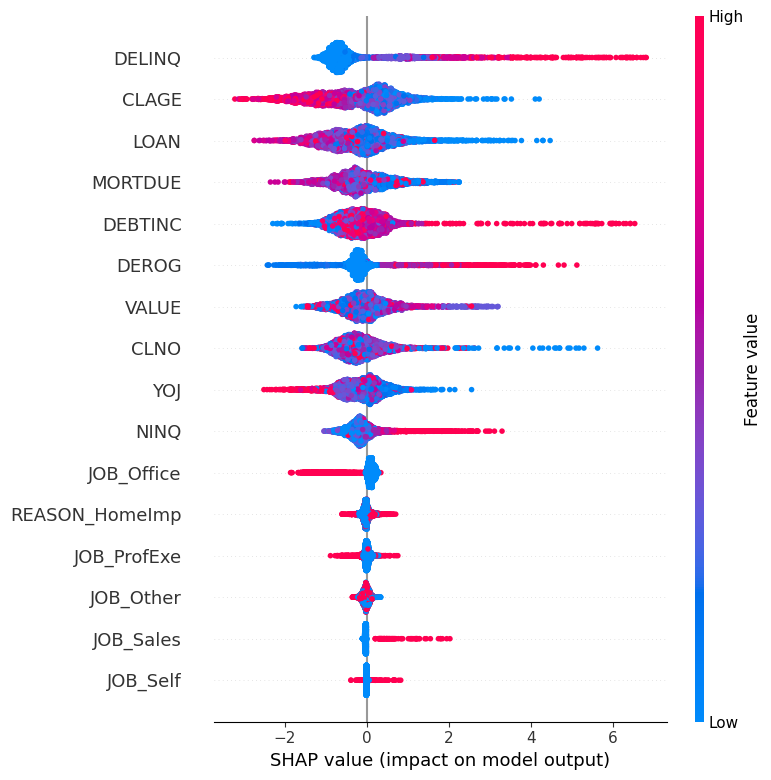

In [136]:
# Plotting summary for Class 1
shap.summary_plot(shap_values, features = x_train, feature_names = x_train.columns)

**Observations:**

*   Based on **SHAH Summary Plot** the strongest predictors of default are **DELINQ, CLAGE, LOAN** and **DEBTINC**
*   Features **JOB_Office, REASON_HomeImp** and other job types are less impactfull, as their **SHAP** distribution is centered around zero
*   Higher debt-to-income ration (DEBTINC = red) is strong indicator of default
*   The model correctly learns that high deliquency, large loans and recent credit activity are risky
*   **SHAP** confirms that interpretability aligns with financial logic, which builds trust in model's prediction

## **Model Comparison**

In [137]:
# Checking performance of each model on test data
models_test_comp_df = pd.concat([lg_test.T, dt_test.T, dt_tuned_test.T, rf_test.T, rf_tuned_test.T, xgb_test.T], axis = 1)

models_test_comp_df.columns = ['Logistic Regression', 'Decision Tree Classifier', 'Tuned Decision Tree Classifier', 'Random Forest Classifier', 'Tuned Random Forest Classifier', 'XGBoost Classifier']

print('Test Performance Comparison:')
print('=====' *25)

models_test_comp_df.T.sort_values(by = 'Recall', ascending = False).mul(100).round(2)

Test Performance Comparison:


,Precision,Recall,Accuracy
Tuned Random Forest Classifier,90.62,81.99,91.61
XGBoost Classifier,94.31,81.88,92.45
Decision Tree Classifier,81.56,81.26,88.17
Random Forest Classifier,93.43,79.73,91.53
Tuned Decision Tree Classifier,62.18,68.89,64.85
Logistic Regression,69.61,57.15,80.87


**Observations:**

*   Model Ranking (based on **Recall**)
    1. Tuned Random Forest **81.99%**
    2. XGBoost **81.88%**
    3. Decision Tree **81.26%**
    4. Random Forest **79.73%**
    5. Tuned Decision Tree **68.89%**
    6. Logistic Regression **57.15%**
*   If we take into consideration **Precision**, together with **Recall**, best performance has **XGBoost** model, with **94.31% Precision** and **81.88% Recall**
*   Model that is definitely not recommended is **Linear Regression**

## **Summary**

### **1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

**How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**

1.   To evaluate the effectivness of each model, we have chosen **Recall** as primary evaluation metric, as we want to minimize **False Negatives**, since failing to identify actual defaulters is more critical for financial institutions
2.   **XGBoost Classifier** has best overall performance with **Precision = 94.31%, Recall = 81.88%, Accuracy = 92.45%**
3.   **Tuned Random Forest Classifier** achieves the highest **Recall = 81.99%**, making it the most effective at identifying defaulters
4.   **Logistic Regression** has the lowest **Recall = 57.15%**, indicating many actual defaults missed
5.   **Tuned Decision Tree Classifier** also underperforms, suggesting limited generalization despite tuning

**Scope for Improvements**
1.   **Logistic Regression:** Threshold tuning improved **Logistic Regression's Recall** but at the cost of **Precision**; further refinement could help
2.   **Feature Engineering** (e.g. binning, interactions) may boost model discrimination power
3.   **Ensemble blending or stacking** e.g. (combining RF and XGBoost) could leverage strengths of multiple models
4.   **Cost-sensitive Learning** or further **Hyperparameter Tuning** with techniques like **RandomizedSearchCV** or **Bayesian Optimizator** can enhance model performance
5. **Overfitting:** Feature selection or dimensionality reduction can help to avoid overfitting

### **2. Refined insights:**

**What are the most meaningful insights relevant to the problem?**

In [138]:
# Creating DataFrame for insights summary
insights_summary = pd.DataFrame({
    'Feature': ['DELINQ', 'CLAGE', 'DEBTINC', 'LOAN', 'MORTDUE', 'DEROG', 'NINQ/YOJ/CLNO'],
    'Logistic Regression': ['✅Highest positive coeff', '❌Strong negative coeff', '✅Moderate positive effect', '❌Negative coeff', '❌Negative coeff', 'Neutral impact', '✅Minor impact'],
    'Decision Tree': ['✅Most important', '✅Top 3 feature', '✅Top 4 feature', '✅Top 5 feature', '✅Moderate impact', '✅High impact', '✅Minor impact'],
    'Random Forest': ['✅Most important', '✅Top 2 feature', '✅Top 3 feature', '✅Top 4 feature', '✅Moderate impact', '❌Low impact', '✅Moderate impact'],
    'XGBoost': ['✅Most important', '✅Top 3 feature', '✅Top 4 feature', '✅Top 5 feature', '✅Moderate impact', '✅Moderate impact', '✅Minor impact']
})

# Displaying table
display(insights_summary)

,Feature,Logistic Regression,Decision Tree,Random Forest,XGBoost
0,DELINQ,✅Highest positive coeff,✅Most important,✅Most important,✅Most important
1,CLAGE,❌Strong negative coeff,✅Top 3 feature,✅Top 2 feature,✅Top 3 feature
2,DEBTINC,✅Moderate positive effect,✅Top 4 feature,✅Top 3 feature,✅Top 4 feature
3,LOAN,❌Negative coeff,✅Top 5 feature,✅Top 4 feature,✅Top 5 feature
4,MORTDUE,❌Negative coeff,✅Moderate impact,✅Moderate impact,✅Moderate impact
5,DEROG,Neutral impact,✅High impact,❌Low impact,✅Moderate impact
6,NINQ/YOJ/CLNO,✅Minor impact,✅Minor impact,✅Moderate impact,✅Minor impact


1.   **DELINQ**
    *   Number of deliquent credit lines is **strong predictor** of default
    *   High **DELINQ** increases probability of default
2.   **CLAGE**
    *   Age of oldest credit line shows **strong negative** effect in **Logistic Regression**, but has **high importance** in **Decision Tree, Random Forest, XGBoost**, which suggests deeper patterns in credit maturity
3.   **DEBTINC**
    *   Debt-to-income ratio has **positive influence** on default likelihood in **Logistic Regression**
    *   It is ranked in top 3-4 in all tree-based models
4.   **LOAN**
    *   Loan amount is **negatively associated with default in **LOgistic Regression**, but apperas moderately important in tree-based models
5.   **DEROG**
    *   Number of major derogatory reports is more significant in **Decision Tree** and **XGBoost**
    *   It is less impactful in **Random Forest** and **Logistic Regression**

**Business Recommendations**
1.   Focus should be on applicants with multiple number of deliquent credit lines, as these individuals are the highest-risk profiles
    *   **Action:** Prioritize stricter approval checks or lower credit limits for applicants with multiple number of deliquent credit lines
2.   Younger credit age flags a risk of default
    *   **Action:** Flag recent credit applicants for requests on additional documentation
3.   Longer credit history reduces risk of default
    *   **Action:** Reward customers with long.clean credit history with pre-approved offers
4.   High debt burden also flags a risk of default
    *   **Action:** Offer debt consolidation products to reduce financial burdens
5.   Job type has some effect
    *   **Action:** Adjust loan terms and/or interest rates for volatile-income professions
6.   Loan amoun itself does not define a risk
    *   **Action:** Customize approval decisions by weighthing multiple variables, not just loan amount
7.   Number of recent credit inquiries has moderate risk
    *   **Action:** Implement **cooling-off periods** between new applications

###**3. Proposal for the final solution design:**

**What model do you propose to be adopted? Why is this the best solution to adopt?**

**Model Choice Impacts Strategy**

1.   **Insights**
    *   **Logistic Regression** offers clarity and explainability
    *   **Random Forest** and **XGBoost** deliver better predictive power (higher **Recall, Precision**)
2.   **Action**
    *   Use **XGBoost** or **Random Forest** for real-time scoring
    *   Use **Logistic Regression** for compliance reporting and stakeholder explanations

Based on analysis and evaluation accross the models **XGBoost Classifier** delivers best overall performance on test data with **highest Accuracy 92.45%, highest Precision 94.31%** and **strong Recall 81.88%**

In [139]:
# Creating DataFrame for business justification summary
bussiness_justification_summary = pd.DataFrame({
    'Criterion': ['High Recall', 'High Precision', 'Balanced Accuracy', 'Speed & Scalability', 'Customizability', 'Feature Importance'],
    'Reason Why XGBoost': ['Reduces false negatives (missed defaulters)', 'Reduces false positives - avoids waisting resources', 'Robust even on imbalanced data', 'Efficient for large datasets, supports parallel processing', 'Allows fine-tuning (learning rate, depth, regularization)', 'Provides clear indicators for credit policy decisions']
})

# Displaying table
display(bussiness_justification_summary)

,Criterion,Reason Why XGBoost
0,High Recall,Reduces false negatives (missed defaulters)
1,High Precision,Reduces false positives - avoids waisting reso...
2,Balanced Accuracy,Robust even on imbalanced data
3,Speed & Scalability,"Efficient for large datasets, supports paralle..."
4,Customizability,"Allows fine-tuning (learning rate, depth, regu..."
5,Feature Importance,Provides clear indicators for credit policy de...


##**Executive Summary [Final Submission]**

**Project Objective**
*   Project objective is to develop data-driven **Loan Default Prediction model** to improve bank's loan approval process by precisely identifying high-risk loan applicants before approval. The project uses **Home Equity Loan (HMEQ) dataset - **5960 records, ~20% default rate** - to train machine learning models that predict whether a new loan applicant is likely to default. Key applicant attributes are analyzed and used as inputs.

**Methodology**
*   **Exploratory Data Analysis (EDA)** is performed on dataset in order to identify influential factors that are strongly associated with default, like **deliquent credit lines, derogatory records, debt-to-income ration**, as well as data pre-processing, that includes missing values and outliers handling.
*   **4 modeling techniques** are applied and compared:
    *   **Logistic Regression:** a baseline linear model for interpretability
    *   **Decision Tree:** a single tree for rule-based insights
    *   **Random Forest:** an ensemble of trees to improve generalization
    *   **XGBoost:** an advanced boosting ensemble for maximum accuracy
*   Performance of each model is evaluated with emphasis on **Recall** (sensitivity to defaults), since the cost of missing an applicant who will default is high. **Presicion** and overall **Accuracy** are also measured.

**Key Findings**
*   The ensemble tree models outperformed the simpler models. **XGBoost** delivers the best results with **92% overall Accuracy**. It could identify **64% of defaulting loans (Recall)** while maintaining a very high **Precision** of **97%** for flagging a default. In comparison, baseline **Logistic Regression** model (as default threshold) was able to catch only **~18%** of defaulters and even after threshold adjustment, it achieves **45% Recall** with **50% Precision**. **Random Forest** is similarly powerful: **92% Accuracy, 66% Recall, 89% Precision**.
*   These results show that data-driven machine learning models can dramatically improve default prediction. The best model more than tripled the **Recall** of defaulters compared to manual or simpler methods, without much loss in **Precision**.

**Conclusion**
*   The analysis confirms that machine learning can enhance loan risk assessment, reducing both kinds of missclassifications: It flags far more risky loans (**high Recall**) and avoids loan rejections to applicants who would repay (**high Precision**), compared to traditional screening
*   The most predictive features are: **past deliquencies (DELINQ)** and **derogatpry records (DEROG)** followed by **debt-to-income ratio (DEBTINC)** and **age of credit history (CLAGE)**. Applicants with any deliquent credit lines were significantly more likely to default.
*   Those insights reinforce credit risk intuition that **poor credit history and high leverage are key risk drivers** and the model quantifies their impact. By adopting **XGBoost model** as final proposed solution (with appropriate threshold tuning **~30%** default probability to balance **Recall ~80%** and **Precision ~87%**), the bank can expect to improve its ability to screen out risky loans before origination.
*   Using the machine learning model can make the process faster and more consistent, minimizing human error and bias in loan application decisions.

**Final Proposed Model Specification**
*   **Model Selected: XGBoostClassifier**
*   **Justification:** **XGBoost** delivers the best trade-off between **Recall, Precision** and **overall Accuracy**. It wwas able to capture **~82%** of defaulters while maintaining high **Precision of ~94%** and excellent generalization **~92,4% Accuracy** on test data. Model also offers feature importance insights via **SHAP**, enhancing interpretability.

**Key Next Steps**
1.   **Model Refinement**
      *   **Threshold Optimization:** Fine-tuning classification threshold beyond default **0.5** to balance **Precision-Recall** trade-off based on business impact.
      *   **Hyperparameter Tuning:** Performing full tuning of **n_estimators, max_depth, learning_rate, scale_pos_weight** using cross-validation.
      *   **Calibration:** Consideration for using **Platt scaling** or **isotonic regression** to calibrate probabilities if model outputs are to be interpreted probabilistically.
2.   **Business Alignment**
      *   **Cost-Sensitive Evaluation:** Incorporating misclassification costs (**False Negatives vs False Positives**) to align model performance with financial risk.
      *   **Rejecting Inference:** In case it is deployed in credit scenario, methods to deal with rejected loan applicants who have unknown outcomes need to be considered.
3.   **Deployment Readiness**
      *   **API Integration:** Wrapping the model into an **API** using **Flask** or **Fast-API** for real-time predictions.
      *   **Monitoring:** Setting-up model monitoring for data drift, performance degradation and fairness, once model is rolled-out in production environment.
4.   **Interpretability and Reporting**
      *   **SHAP Analysis:** Continue using **SHAP** for deeper mode; explanations and stakeholder reporting.
      *   **Feature Sensitivity:** Investigating partial dependence plots or/and ICE curves for top features.



##**Problem and Solution Summary [Final Submission]**

###**Problem Overview**

Home loan defaults pose a serious problem for financial institutions. When customer defaults the bank incurs large financial losses in unpaid debt. In Home Equity dataset roughly **1 in 5** home equity loans defaulted, which is **20% default rate**. Treditionally, loan approval relies on human judgment, where bank employees manually assess creditworthiness by reviewing credit reports, income, etc. This manual process is time-consuming and error-prone and can suffer from inconsistencies or biases between different bank employees. This trade-off between loan losses and credit access is core problem: being too tolerant increases number of defaults, while being too strict results in rejecting loan for applicants who will repay. This is why bank needs more reliable way to distinquish between high-risk and low-risk applicants. Bank encounters following challenges:
1.   **Inconsistency and Subjectivness:** Human assessment can vary, what 1 bank employee flags another might overlooked it. Manual reviews are prone to human error and personal bias., which can result in misclassifying applicants. For example, bank employee might place too much weight on 1 factor like income, and not enough on another like past deliquencies, leading to approving application for high-risk applicant or rejecting application for low-risk applicant.
2.   **Inefficiency:** Reviewing thousands of applicants can be time-cosuming. Slow process can frustrate low-risk applicants and doesn't scale well as application volume grows.
3.   **Statis Criteria:** Traditional credit often uses fixed cut-offs like credit score threshold or debt-ratio limits. Such rigit rules don't caprure complex interactions between factors. They may also become outdated as economic conditions change.
4.   **Missed Opportunity and Risk:** Strict rules to minimize defaults can turn away many low-risk applicants (**False Negatives** for approvals), which will affect revenue. Conversely, loose rules to boost loans can admit too many high-risk applicants (**False Positives** for approvals), which will increase defaults. The bank needs a better balance: **reduce high-risk loans without overly restricting credit**.

In summary, the problem is to more accurately distinguish between applicants and determine which applicant is more likely to default, so that bank can reject or adjust those loans, and which applicant is more likely to repay, so that bank can confidently approve those loans. Solving this problem means **fewer defaults = saving money and more approval for safe loans = earning interest**, while maintaining fairness in process.


###**Solution Design: Machine Learning Default Prediction Model**

**Approach:** To create an automated prediction model that assesses default risk for each applicant, we will leverage historical loan data and machine learning. The **Home Equity Loan** dataset used includes each applicant's outcome (default or not) and **12** features describing their financial situation and loan request.

**Key Steps:**
1.   **Exploratory Data Analysis (EDA):** Examining distributions and correlations.
      *   Applicants who defaulted have much higher instances of past deliquencies and derogatory records. For example, defaulters averaged **1.23 past deliquent credit lines** vs **0.25** for non-defaulters and **0.71 major derogatories** vs **0.13**. This is the indication of **critical risk factors**.
      *   Defaulters also have higher **debt-to-income ration** with **mean 39% vs 33%**, which suggests that financial overextension contributes to default.
      *   Interesting observation is that **loan size** and **property value** do not have big difference between the groups. For example big loans did not default more simply due to their size. It is applicant's capacity and history, not the loan amount, that predominantly drove defaults.
      *   There is an imbalance in target variable **80% repaid vs 20% default**, which means that simple baseline model could achieve **80% Accuracy** by always predicting **no default**. This is why success is not measured by model's accuracy alone, but by model's ability to catch the minority class (**BAD = 1**) without too many **False Negatives**.
2.   **Data Preparation:** Cleaning and pre-processing of data for modeling.
      *   **Handling Missing Data:** Several features have missing values. For example **DEBTINC** is missing **21.26%** of records. Rather then dropping these records, we have used statistically appropriate methods (**median or predictive imputation**) to preserve information.
      *   **Outlier Treatment:** Extremely high values, like for example and outlier with **97-year old credit line** or a dbt ration of **203%**, were adjusted to resonable limits to prevent distortion of scale-sensitive models. This was done carefully to not remove legitimate high-risk signals entirely.
      *   **Feature Engineering:** Categorical variables **REASON** and **JOB** were **One-Hot encoded**, so that models are able to use them. No significant new variables were created, but analysis suggests possibly converting some numerical variable to categorical, like for example **DELINQ**, which could be **0 vs >=1** as **70%** of applicants have none.
3.   **Model Development and Selection:** Building and testing different models.
      *   **Logistic Regerssion:** Before model tuning, overall **Accuracy** was very high with **81%**, but **Recall** for defaults was very low with **18%**, which means that model is too conservative with labeling almost each applicant as low-risk. By lowering the prediction threshold to **~0.3** model's **Recall** improved to **45%**, but then it flagged more low-risk loans as high-risk, because **Precision** dropped to **50%**. This points to the inherited limitation: a linear model with default threshold wasn't separating the classes well.
      *   **Decision Tree:** The initial tree grown deep and clearly **overfit** the training data, which resulted in **100% Accuracy** on training dataset. However, it shown signs of overfitting, with performance on test data dropping to **88% Accuracy** and **70% Recall** on minority class (defaults). Attempt to prune the tree using cost-complexity pruning via **ccp_alpha** did not improve cross-validation accuracy, but best alpha was **0.0**, indicating that pruning degraded model performance. Hyperparameter tuning with **max_depth = 7** and **min_sample_leaf = 25** with class weighting **reduced overfitting** but led to a significant grop in overall **test Accuracy** of **65%** and **Precision 62%** despite improving **Recall**. This suggest overly aggressive trade-off bewteen class balance and model performance. The decision tree's learned rules remained interpretable and insignhtful. For example, it identified patterns like **if DELINQ > 0.919 and DEROG > 0.48, then higher default risk**. While valuable for explainability, this model is less powerfull than ensemble models and requires careful balance between **depth, leaf size and class weighting** to avoid degraded generalization.
      *   **Random Forest:** The Random Forest model, that is an ensemble of decision trees, significantly improved performance over a single tree. Initial Random Forest achieved, on test data, **92% Accuracy** with **Recall** of **60%** and **Precision** of **96%** for defaulters. The model clearly reduced **overfitting** in comparisonn to a Decision Tree model, while performance on training data was almost perfect, it maintained strong generalization on unseen data. AFter hyperparameter tuning model achieved balanced overall performance on test data: **Accuracy 91.61%, Precision 90.62%, Recall 81.99%**. Random Forest also provided valuable insights via feature importance, where features like **DELINQ, DEBTINC, CLAGE** have the highest ranking in predictive power. This reinforces the strength of Random Forest in capturing non-linear patterns and highlighting key features.
      *   **XGBoost:** The Gradient Boosting model gave the best results. on test data it achieved **92.45% Accuracy** with **Recall** of **81.88%** and **Precision** of **94.31%**, which indicates hiigh level of sensitivity and precision. Model avoided **overfitting**, as seen by its consistent performance accross training and test data. For example, only **7 misclassifications** on defaulters in training dataset. The model addressed class imbalance by focusing more on difficult to classify examples through its boosting mechanism. Without requiring heavy customization, it effectively balanced learning both majority and minority classes. in terms of explainability, **SHAP analysis** shown that **DELINQ, CLAGE, LOAN, MORTDUE, DEBTINC** are the most impactful predictors of default. These features are used ib influential splits accross trees, providing clear and interpretable decision basis. Overall, **XGBoost** combined robust predictive power with interpretability and balanced classification, making it the most effectove model for loan default prediction.
      *   **Conclusion:** Given these results, **XGBoost was selected as final model** for the solution, due to its high predictive power and balaced performance. This means that bank would be able to catch roughly **2 out of 3** truly risky loans with minila false alerts, which represents big improvement in a process.
4.   **Addressing Class Imbalance:** Treating imbalance through evaluation strategy and model tuning.
      *   Rather than oversampling or **SMOTE**, which are not used in solution, we adjusted decision thresholds and used ensemble models that are robust to imbalance. For example, in **Logistic Regression** model we have used threshold that favors catching defaults, where **Recall** was increased from **18% to 45%** at cost for **Precision**.
      *   Chosen **XGBoost** model can incorporate **scale_pos_weight** or similar, but even without that, the model can boost prioritization of harder to predict defaults. **Precision-Recall curves** are used to to identify operating points that align with business goals, with threshold of **~0.3** for **Logistic Regression** and **~0.5** for **XGBoost** reflecting our risk tolerance.
      *   Cross-validation scoring in model tuning was done with **Recall**-focused metric to ensure the model is not optimizing only **Accuracy**, which would ignore the minority class.
5.   **Fairness Consideration:** The data features are primarily financial , there is no direct race/ethnicity or gender data. However, it was observed that automating decisions could propagate bias if present in data. We have done couple of steps to ensure fairness.
      *   Job type could correlate with income stability and indirectly with demographic attributes. The solution includes plan to monitor model outcomes for bias (Recommendations for Implementation section), for example testing whether the approval rates for minority groups remain similar with others given similar financies.
      *   Improved consistency of algorithm is seen as **positive** for fairness, as long as inputs are relevant and free of prejudice.
6.   **Effectivness:** Overall, the solution = **ML model integrated into the loan workflow**, solves the problem by significantly improving risk classification. In testing, **XGBoost** model could have prevented a large number of defaults that occured, which means substantial financial savings. At the same time, model would have likely approved some applicants that manual methods might have rejected, for example applicants with slightly higher debt-to-income ratio but with clean credit history, which means increasing loan portfolio growth safely. The chosen model has **Recall 81.88%** and **Precision 87%**, which means that out of all high-risk loans, **~4-5** are caught in advance, while only **1 in 8** flagged loans would be false alarms, which can be managed with further human review. This is **huge improvement in efficiency** for bank's credit decision process.

In [140]:
# Checking performance of each model on test data
models_test_comp_df = pd.concat([lg_test.T, dt_test.T, dt_tuned_test.T, rf_test.T, rf_tuned_test.T, xgb_test.T], axis = 1)

models_test_comp_df.columns = ['Logistic Regression', 'Decision Tree Classifier', 'Tuned Decision Tree Classifier', 'Random Forest Classifier', 'Tuned Random Forest Classifier', 'XGBoost Classifier']

print('Test Performance Comparison:')
print('=====' *25)

models_test_comp_df.T.sort_values(by = 'Recall', ascending = False).mul(100).round(2)

Test Performance Comparison:


,Precision,Recall,Accuracy
Tuned Random Forest Classifier,90.62,81.99,91.61
XGBoost Classifier,94.31,81.88,92.45
Decision Tree Classifier,81.56,81.26,88.17
Random Forest Classifier,93.43,79.73,91.53
Tuned Decision Tree Classifier,62.18,68.89,64.85
Logistic Regression,69.61,57.15,80.87


In [141]:
# Creating DataFrame for insights summary
insights_summary = pd.DataFrame({
    'Feature': ['DELINQ', 'CLAGE', 'DEBTINC', 'LOAN', 'MORTDUE', 'DEROG', 'NINQ/YOJ/CLNO'],
    'Logistic Regression': ['✅Highest positive coeff', '❌Strong negative coeff', '✅Moderate positive effect', '❌Negative coeff', '❌Negative coeff', 'Neutral impact', '✅Minor impact'],
    'Decision Tree': ['✅Most important', '✅Top 3 feature', '✅Top 4 feature', '✅Top 5 feature', '✅Moderate impact', '✅High impact', '✅Minor impact'],
    'Random Forest': ['✅Most important', '✅Top 2 feature', '✅Top 3 feature', '✅Top 4 feature', '✅Moderate impact', '❌Low impact', '✅Moderate impact'],
    'XGBoost': ['✅Most important', '✅Top 3 feature', '✅Top 4 feature', '✅Top 5 feature', '✅Moderate impact', '✅Moderate impact', '✅Minor impact']
})

# Displaying table
display(insights_summary)

,Feature,Logistic Regression,Decision Tree,Random Forest,XGBoost
0,DELINQ,✅Highest positive coeff,✅Most important,✅Most important,✅Most important
1,CLAGE,❌Strong negative coeff,✅Top 3 feature,✅Top 2 feature,✅Top 3 feature
2,DEBTINC,✅Moderate positive effect,✅Top 4 feature,✅Top 3 feature,✅Top 4 feature
3,LOAN,❌Negative coeff,✅Top 5 feature,✅Top 4 feature,✅Top 5 feature
4,MORTDUE,❌Negative coeff,✅Moderate impact,✅Moderate impact,✅Moderate impact
5,DEROG,Neutral impact,✅High impact,❌Low impact,✅Moderate impact
6,NINQ/YOJ/CLNO,✅Minor impact,✅Minor impact,✅Moderate impact,✅Minor impact


##**Recommendations for Implementation [Final Submission]**

Implementing LLM solution in a real time banking environment requires careful planning to realize benefits and address challenges. Following recommendations are proposed for implementing the loan default prediction model in real-world banking environment:
1.   **Deploy XGBoost Model in the Loan Approval Workflow**
    *   **Integrate XGBoost into Decision Systems:** Adopt trained **XGBoost Classifier** as a core component of the loan evaluation process, as it shows best **Precision-Recall** trade-off in predicting defaults. For each new applicant model will give a default risk score = probability. Recommendation is to use a threshold of e.g. **30% = default probability** to classify applicants as high-risk vs low-risk, based on the financial institution's risk tolerance and **Precision/Recall** trade-off.
    *   **AUTOMATE Initial Screening:** Use the model to automatically approve low-risk loans, which will speed up processing for non-defaulters and automatically decline high-risk loans and re-direct them to **manual screening**. With this approach model would automatically clear **~50%** of applications, flagged **~10-15%** high-risk applications and leave the remaining middle segment for normal review.
    *   **Human-in-the-Loop Review:** For applications that are flagged as high-risk, make sure that senior customer representatives review the application details together with explanation provided by the model. Over time, as confidence in the model grows, the threshold for manual intervention can be adjusted.
2.   **Ensure Transparency and Explainability**
    *   **Provide Codes for Rejection Reason:** To facilitate acceptance, accompany the model's score with explanations of contributing factors. For example: **"High-risk due to multiple past deliquencies and high debt-to-income ratio"**. Tree-based models allow extraction of feature importance as well SHAP values for individual predictions, which then can be translated into understandable and human-readable rejection reasons.
    *   **Model Documentation:** Prepare documentation for regulators and management explaining how model was developted, what is the input and performance. Important is to highlight that sensitive attributes (like gender, race, etc.) are **not used** and show validation results segmented by demographics. Clear documentation will also help for staff training on how to use new system.
    *    **User Training:** Educate bank employees on new process. Emphasize that model is an **aid, not a replacement** and that helps to prioritize and catch risks that moght be missed, but final decision needs to involve human interaction, especially for exceptions. Provide examples of how the model would have handled past loan applications to demonstrate its value.
3.   **Address Stakeholder Challenges & Change Management**
    *   **Regulatory Compliance:** For financial institutions, models used for loan application decisions must comply with regulations. **Fair lending tests** shall be conducted on model's outcomes and compliance officers shall review the model. The explainability measures will satisfy the requirements to provide specific reason for application rejection, like for example **insuficient credit history.**
    *   **Trust and Adoption:** To build trust and avoid scepticism involve bank employees in pilot testing, demonstarting model predictions on recent loan application requests and ask for their feedback. Highlight success stories, as it is important to show that model is there to **enhance their effectivness**, not to replace their expertise.
    *   **Stakeholder Communication:** Communicate benefits to all stakeholders clearly.
          *   For management, emphasize expected financial benefits and competitive advantage.
          *   For credit team, emphasize how it reduces their workloadon low-risk casesand provides data-backend confidence for tough decisions.
          *   Gor IT highlight that the chosen model (XGBoost) can be efficiently deployed and scaled, by showing that it's supported by many platforms and can score thousands of applications per second.
4.   **Benefits, Costs & ROI**
    *   **Benefits:**
          *   **Reduced Default & Losses:** By identifying high-risk applicants upfront, number of defaults can be reduced.
          *   **Improved Portfolio Quality:** Fewer non-performing loans mean better profit margins and lowe capital reserves for bad debt. This also improves bank's reputation and credit ratings.
          *   **Increased Approvals of Low-Risk Loans:** The model can more confidently approve borderline low-risk applicants that may be rejected under conservative rules. This expands customer base and interest income.
          *   **Efficiency and Scalability:** Automating risk assessment speeds up loan application processing, because low-risk application can be evaluated in couple of seconds by the model. This results in bank employees being able to handle more loan applications in the same time and focus on more complex cases and customer services.
          *   **Consistency and Fairness:** Decisions will be based on data-driven rules that are applied uniformly, which will reduce inconsistent treatment. This consistency will ensure **equality among applicants**, which isn't guaranteed with manual process. It also helps remove **personal biases** that sometimes might be present with manual process. Any identified bias in outcomes can be corrested through model retraining.
    *   **Cost and Liabilities:**
          *   **Development and Maintenance Cost:** Building and deploying the model incurs one-time costs for software integration and data engineering + ongoing costs for maintaining the model and system. These costs are relatively modest in comparison to amount saved for detecting defaulters.
          *   **Data Infrastructure:** Invest in data pipelines to feed the model and cloud VMs to host model for real-time scoring. It is important to make sure security, encyption, privacy are part of the cost analysis, having in mind that sensitive financial data is used.
          *   **False Positives:** While the model has high precision, it will be inevitably flag some loan applications as **risky** that would actually repay the loan (false positives). With **97% Precision** in our best model, **False Positive** rate is very low. By having human review of flagged cases, some of those low-risk applications can still be rescued.
          *   **Model Risk:** Model is an assumption based on historical data patterns. In case future conditions change, like for example shift in customer behavior, model's predictions may become less accurate. Tf not monitored, this is a liability, and thus the need for regular reviews and updates is needed. Additionaly, any model can have **blind spots**. For example, if applicant type was rare in training data, model might not generalize well. This is mitigated by re-training on more data as it comes.
5.   **Risk Mitigation and Futire Proofing**
      *   **Ongoing Model Monitoring and Refresh:** Continuously monitor model's performance in production. Track metrics like the model's predicted default rate vs actual default rate of loans over time, and the approval rate. In case the default catpire rate starts to drop or drift, plan for re-training the model with newer dataset (suggestion: **every 6-12 months**)As more loan outcomes are observed, incorporate them into training subset to keep the model current. This will ensure that model adapts to any changes in applicant's profile or economic conditions, like for example economic recession.
      *   **Address Potential Risks of Other Approaches:** Simpler solutions, like just raising credit score cutt-offs or using logistic regression alone, were considered, but these approaches either don't personalize decisions or leave too many defaulters undetected, like in case of **Logistic Regression**. The chose model, **XGBoost** is complex but yields superior results.One risk of complex model is less interpretability. This is mitigated with explainability techniques discussed. Another risk in tempetationto use model outside its domain, for example using it on a different loan type, like auto loans, without validation. Therefore, it is crucial to use model **ONLY** for scenarios it was designed and tested for, until further analysis is done.
      *   **Backup Plans:** Maintain fallback strategy in case the model system faces an outage or an issue, for example revert to traditional scoring or have human review all cases temorarily. This ensures business continuity.
6.   **Next Steps and Further Analysis:**
      *   **Expand to Other Loan Products:** Once the rollout of home equity loan is successfull, consider applying similar models to other credit products, like **personal loans, credit cards, car loans.** Each product has its nuances, meaning that new models would need to be trained per product, but general approach remains the same.
      *   **Incorporate Alternative Data:** Explore adding more features to improve model's **Precision** and **Recall**. **Additional features:** credit score, utillity payment history, bank account cash flow, etc. Any new data should be tested first for incremental value vs complexity.
      *   **Economic Scenario Testing:** Perform stress-testing of model under different economic scenarios. For example, simulate how model's prediction would change in situations like unemployment spikes or housing values drop. This helps ensure that model is robust.
      *   **Feedback Loop and Model Improvement:** Create feedback mechanism where actual loan default performance is tracked and fed back to model development.
      *   **Continuous Learning Culture:** Train risk analyst(s) in basic data science, who can understand model outputs and contribute to model updates/upgrades. The organization should treat model as **living tool**, one that will be refined over time. Recommendation is to set up **quarterly review** of the **Credit Risk Model** where stakeholders will discuss performance and improvements. This keeps the model from becoming a black box and ensures it evolves with business'needs.

In [142]:
# Creating DataFrame for business justification summary
bussiness_justification_summary = pd.DataFrame({
    'Criterion': ['High Recall', 'High Precision', 'Balanced Accuracy', 'Speed & Scalability', 'Customizability', 'Feature Importance'],
    'Reason Why XGBoost': ['Reduces false negatives (missed defaulters)', 'Reduces false positives - avoids waisting resources', 'Robust even on imbalanced data', 'Efficient for large datasets, supports parallel processing', 'Allows fine-tuning (learning rate, depth, regularization)', 'Provides clear indicators for credit policy decisions']
})

# Displaying table
display(bussiness_justification_summary)

,Criterion,Reason Why XGBoost
0,High Recall,Reduces false negatives (missed defaulters)
1,High Precision,Reduces false positives - avoids waisting reso...
2,Balanced Accuracy,Robust even on imbalanced data
3,Speed & Scalability,"Efficient for large datasets, supports paralle..."
4,Customizability,"Allows fine-tuning (learning rate, depth, regu..."
5,Feature Importance,Provides clear indicators for credit policy de...


##**Change Log**

Following chances were made to **Final Submission** vs **Milestone Submission:**
1.   Decision Tree Pruning check is added
2.   Following labels are added to a Confusion Matrix
    *   True Negatives (TN)
    *   True Positives (TP)
    *   False Negatives (FN)
    *   False Positives (FP)
3.   Exec Summary, Problem and Solution Summary, Recommendations for Implementation sections are added